In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as BS
import numpy as np

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### Macbeth - Full Text

#### Import using Folger Shakespeare Library's API

In [4]:
url = 'https://www.folgerdigitaltexts.org/Mac/text'

In [5]:
response = requests.get(url)

In [6]:
response.text

'<br/>\nWhen shall we three meet again?<br/>\nIn thunder, lightning, or in rain?<br/>\nWhen the hurly-burly’s done,<br/>\nWhen the battle’s lost and won.<br/>\nThat will be ere the set of sun.<br/>\nWhere the place?<br/>\nUpon the heath.<br/>\nThere to meet with Macbeth.<br/>\nI come, Graymalkin.<br/>\nPaddock calls.<br/>\nAnon.<br/>\nFair is foul, and foul is fair;<br/>\nHover through the fog and filthy air.<br/>\nWhat bloody man is that? He can report,<br/>\nAs seemeth by his plight, of the revolt<br/>\nThe newest state.<br/>\nThis is the sergeant<br/>\nWho, like a good and hardy soldier, fought<br/>\n’Gainst my captivity.—Hail, brave friend!<br/>\nSay to the King the knowledge of the broil<br/>\nAs thou didst leave it.<br/>\nDoubtful it stood,<br/>\nAs two spent swimmers that do cling together<br/>\nAnd choke their art. The merciless Macdonwald<br/>\n(Worthy to be a rebel, for to that<br/>\nThe multiplying villainies of nature<br/>\nDo swarm upon him) from the Western Isles<br/>\nOf

In [7]:
macbeth_soup = BS(response.text, "html.parser")

In [8]:
macbeth_soup

<br/>
When shall we three meet again?<br/>
In thunder, lightning, or in rain?<br/>
When the hurly-burly’s done,<br/>
When the battle’s lost and won.<br/>
That will be ere the set of sun.<br/>
Where the place?<br/>
Upon the heath.<br/>
There to meet with Macbeth.<br/>
I come, Graymalkin.<br/>
Paddock calls.<br/>
Anon.<br/>
Fair is foul, and foul is fair;<br/>
Hover through the fog and filthy air.<br/>
What bloody man is that? He can report,<br/>
As seemeth by his plight, of the revolt<br/>
The newest state.<br/>
This is the sergeant<br/>
Who, like a good and hardy soldier, fought<br/>
’Gainst my captivity.—Hail, brave friend!<br/>
Say to the King the knowledge of the broil<br/>
As thou didst leave it.<br/>
Doubtful it stood,<br/>
As two spent swimmers that do cling together<br/>
And choke their art. The merciless Macdonwald<br/>
(Worthy to be a rebel, for to that<br/>
The multiplying villainies of nature<br/>
Do swarm upon him) from the Western Isles<br/>
Of kerns and gallowglasses is s

In [9]:
macbeth_full_text = macbeth_soup.get_text()

In [10]:
macbeth_full_text = macbeth_full_text.splitlines()

In [11]:
macbeth_full_text = [line.strip() for line in macbeth_full_text if line.strip()]

In [12]:
macbeth_full_text

['When shall we three meet again?',
 'In thunder, lightning, or in rain?',
 'When the hurly-burly’s done,',
 'When the battle’s lost and won.',
 'That will be ere the set of sun.',
 'Where the place?',
 'Upon the heath.',
 'There to meet with Macbeth.',
 'I come, Graymalkin.',
 'Paddock calls.',
 'Anon.',
 'Fair is foul, and foul is fair;',
 'Hover through the fog and filthy air.',
 'What bloody man is that? He can report,',
 'As seemeth by his plight, of the revolt',
 'The newest state.',
 'This is the sergeant',
 'Who, like a good and hardy soldier, fought',
 '’Gainst my captivity.—Hail, brave friend!',
 'Say to the King the knowledge of the broil',
 'As thou didst leave it.',
 'Doubtful it stood,',
 'As two spent swimmers that do cling together',
 'And choke their art. The merciless Macdonwald',
 '(Worthy to be a rebel, for to that',
 'The multiplying villainies of nature',
 'Do swarm upon him) from the Western Isles',
 'Of kerns and gallowglasses is supplied;',
 'And Fortune, on hi

In [13]:
len(macbeth_full_text)

2453

In [14]:
macbeth_full_text[-10]

'As calling home our exiled friends abroad'

In [15]:
macbeth_full_text_df = pd.DataFrame({
    'line_number': np.arange(1, len(macbeth_full_text)+1, dtype=int),
    'text': macbeth_full_text
})

In [16]:
macbeth_full_text_df

line_number                                            text
0               1                 When shall we three meet again?
1               2              In thunder, lightning, or in rain?
2               3                    When the hurly-burly’s done,
3               4                 When the battle’s lost and won.
4               5                That will be ere the set of sun.
...           ...                                             ...
2448         2449  Took off her life)—this, and what needful else
2449         2450      That calls upon us, by the grace of grace,
2450         2451    We will perform in measure, time, and place.
2451         2452       So thanks to all at once and to each one,
2452         2453      Whom we invite to see us crowned at Scone.

[2453 rows x 2 columns]

#### Create a list of tuples to provide Act, Scene, Start and End. This maps the play in its entirety to let me know which lines belong to whcih act and scene.

In [17]:
scene_data = [
    ("1", "1", 1, 13),
    ("1", "2", 14, 91),
    ("1", "3", 92, 266),
    ("1", "4", 267, 331),
    ("1", "5", 332, 417),
    ("1", "6", 418, 456),
    ("1", "7", 457, 552),
    ("2", "1", 553, 629),
    ("2", "2", 630, 724),
    ("2", "3", 725, 896),
    ("2", "4", 897, 952),
    ("3", "1", 953, 1114),
    ("3", "2", 1115, 1177),
    ("3", "3", 1178, 1210),
    ("3", "4", 1211, 1386),
    ("3", "5", 1387, 1422),
    ("3", "6", 1423, 1478),
    ("4", "1", 1479, 1655),
    ("4", "2", 1656, 1753),
    ("4", "3", 1754, 2035),
    ("5", "1", 2036, 2119),
    ("5", "2", 2120, 2156),
    ("5", "3", 2157, 2232),
    ("5", "4", 2233, 2259),
    ("5", "5", 2260, 2318),
    ("5", "6", 2319, 2329),
    ("5", "7", 2330, 2365),
    ("5", "8", 2366, 2453)
]

In [18]:
scene_df = pd.DataFrame(scene_data, columns=['act', 'scene', 'start', 'end']).astype(int)

In [19]:
scene_df.head()

act  scene  start  end
0    1      1      1   13
1    1      2     14   91
2    1      3     92  266
3    1      4    267  331
4    1      5    332  417

##### Create a special index made of intervals for every row in the Scene Dataframe. (28 labeled 'bins' - one per scene.)
##### iv.get_indexer looks at each value in the macbeth_df 'line_number' column and returns the position of the interval in the above code that contains that line. So you end up with a NumPy array of integers with length = number of lines.

In [20]:
iv = pd.IntervalIndex.from_arrays(scene_df['start'], scene_df['end'], closed='both')

In [21]:
idx = iv.get_indexer(macbeth_full_text_df['line_number'])

##### Use idx to vector-map scene metadata onto every line (without having to use loops). .to_numpy() strips labels and gives a Numpy array so that the indexing is faster and positional. And will allow me to index without realignment.

In [22]:
macbeth_full_text_df['act'] = scene_df['act'].to_numpy()[idx]

In [23]:
macbeth_full_text_df['scene'] = scene_df['scene'].to_numpy()[idx]

In [24]:
macbeth_full_text_df['scene_id'] = (idx + 1).astype(int)

In [25]:
macbeth_full_text_df['act_scene'] = (
    'Act ' + macbeth_full_text_df['act'].astype(str) + ', Scene ' + macbeth_full_text_df['scene'].astype(str)
)

In [26]:
macbeth_full_text_df.head()

line_number                                text  act  scene  scene_id  \
0            1     When shall we three meet again?    1      1         1   
1            2  In thunder, lightning, or in rain?    1      1         1   
2            3        When the hurly-burly’s done,    1      1         1   
3            4     When the battle’s lost and won.    1      1         1   
4            5    That will be ere the set of sun.    1      1         1   

        act_scene  
0  Act 1, Scene 1  
1  Act 1, Scene 1  
2  Act 1, Scene 1  
3  Act 1, Scene 1  
4  Act 1, Scene 1

##### Note about VADER is "tuned" for modern English. Shakespearean diction can misfire. We're using this tool as a proxy, not as absolute truth.

##### Create one VADER analyzer to reuse for every line. (VADER runs on every line and then returns a dictionary w/ neg, neu, pos, compound.)
##### The dictionary per row is then turned into four columns. Then we rename the columns for clarity.

In [27]:
analyzer = SentimentIntensityAnalyzer()

In [28]:
vader_cols_full_play = (
    macbeth_full_text_df["text"]
    .apply(lambda t: analyzer.polarity_scores(t))
    .apply(pd.Series)
    .rename(columns={"neg": "play_neg", "neu": "play_neu", "pos": "play_pos", "compound": "play_compound"})
)

In [29]:
macbeth_full_text_df = pd.concat([macbeth_full_text_df, vader_cols_full_play], axis=1)

##### Create a function that classifies each line as positve/negative/neutral using VADER's recommended thresholds on the compound score.
##### Then create a new column that maps the labels onto the VADER compound number.

In [30]:
def _vader_label(c):
    if c > 0.05: return "pos"
    if c < -0.05: return "neg"
    return "neu"

In [31]:
macbeth_full_text_df['play_vader_label'] = macbeth_full_text_df['play_compound'].map(_vader_label)

In [32]:
macbeth_full_text_df["rolling_compound"] = (
    macbeth_full_text_df["play_compound"]
    .rolling(window=21, center=True, min_periods=1)
    .mean()
)

In [33]:
macbeth_full_text_df

line_number                                            text  act  scene  \
0               1                 When shall we three meet again?    1      1   
1               2              In thunder, lightning, or in rain?    1      1   
2               3                    When the hurly-burly’s done,    1      1   
3               4                 When the battle’s lost and won.    1      1   
4               5                That will be ere the set of sun.    1      1   
...           ...                                             ...  ...    ...   
2448         2449  Took off her life)—this, and what needful else    5      8   
2449         2450      That calls upon us, by the grace of grace,    5      8   
2450         2451    We will perform in measure, time, and place.    5      8   
2451         2452       So thanks to all at once and to each one,    5      8   
2452         2453      Whom we invite to see us crowned at Scone.    5      8   

      scene_id       act_scene  play_neg  play_neu  play_pos  play_compound  \
0            1  Act 1, Scene 1      0.00     1.000     0.000         0.0000   
1            1  Act 1, Scene 1      0.00     1.000     0.000         0.0000   
2            1  Act 1, Scene 1      0.00     1.000     0.000         0.0000   
3            1  Act 1, Scene 1      0.23     0.400     0.370         0.3400   
4            1  Act 1, Scene 1      0.00     1.000     0.000         0.0000   
...        ...             ...       ...       ...       ...            ...   
2448        28  Act 5, Scene 8      0.00     1.000     0.000         0.0000   
2449        28  Act 5, Scene 8      0.00     0.556     0.444         0.6808   
2450        28  Act 5, Scene 8      0.00     1.000     0.000         0.0000   
2451        28  Act 5, Scene 8      0.00     0.738     0.262         0.4927   
2452        28  Act 5, Scene 8      0.00     0.833     0.167         0.1531   

     play_vader_label  rolling_compound  
0                 neu          0.030909  
1                 neu          0.074783  
2                 neu          0.069031  
3                 pos          0.032643  
4                 neu          0.030467  
...               ...               ...  
2448              neu          0.030887  
2449              pos          0.033093  
2450              neu          0.035638  
2451              pos          0.038608  
2452              pos         -0.002782  

[2453 rows x 12 columns]

In [34]:
macbeth_full_text_df = macbeth_full_text_df.rename(columns={'rolling_compound': 'play_rolling_compound_wide'})

In [35]:
macbeth_full_text_df["play_rolling_compound_narrow"] = (
    macbeth_full_text_df["play_compound"]
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [36]:
macbeth_full_text_df['play_vader_label'].value_counts()

play_vader_label
neu    1271
pos     648
neg     534
Name: count, dtype: int64

In [37]:
macbeth_full_text_df['play_compound'].min()

-0.9468

In [38]:
macbeth_full_text_df.loc[(macbeth_full_text_df.play_compound == -0.9468)]

line_number                                         text  act  scene  \
1820         1821  Of horrid hell can come a devil more damned    4      3   

      scene_id       act_scene  play_neg  play_neu  play_pos  play_compound  \
1820        20  Act 4, Scene 3     0.755     0.245       0.0        -0.9468   

     play_vader_label  play_rolling_compound_wide  \
1820              neg                   -0.148976   

      play_rolling_compound_narrow  
1820                     -0.352709

In [39]:
macbeth_full_text_df['play_compound'].max()

0.9274

In [40]:
macbeth_full_text_df.loc[(macbeth_full_text_df.play_compound == 0.9274)]

line_number                                         text  act  scene  \
859          860  That had a heart to love, and in that heart    2      3   

     scene_id       act_scene  play_neg  play_neu  play_pos  play_compound  \
859        10  Act 2, Scene 3       0.0     0.357     0.643         0.9274   

    play_vader_label  play_rolling_compound_wide  play_rolling_compound_narrow  
859              pos                     0.06599                      0.131464

##### Create a dictionary to hold when scenes start for vertical lines on charts.

In [41]:
act_starts = {}
for act, scene, start, _ in scene_data:
    if act not in act_starts:
        act_starts[act] = start

In [42]:
roman = {1:"I",2:"II",3:"III",4:"IV",5:"V"}

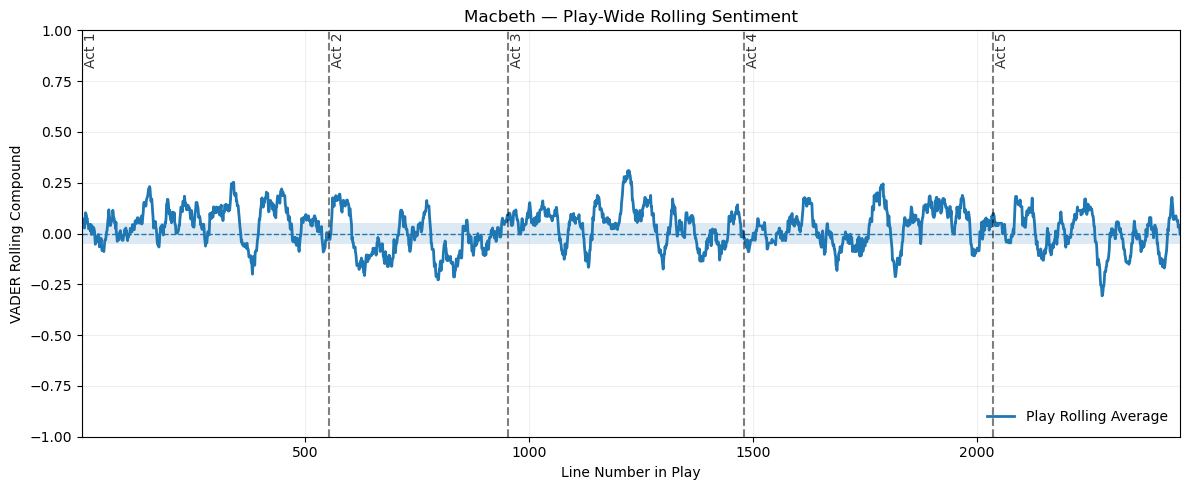

In [43]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(macbeth_full_text_df['line_number'], macbeth_full_text_df['play_rolling_compound_wide'], linewidth=2, label='Play Rolling Average')

ax.axhspan(-0.05, 0.05, alpha=0.15, zorder=0)
ax.axhline(0, linestyle='--', linewidth=1)

ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(), macbeth_full_text_df['line_number'].max())
ax.set_xlabel('Line Number in Play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title('Macbeth — Play-Wide Rolling Sentiment')

for act, start_line in act_starts.items():
    plt.axvline(start_line, color='black', linestyle='--', alpha=0.5)
    plt.text(start_line + 5, 0.9, f"Act {act}", rotation=90, verticalalignment='center', fontsize=10, alpha=0.8)
    
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

### Macbeth's Lines & VADER Analysis

In [44]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Macbeth.html"

In [45]:
response = requests.get(url)

In [46]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nSo foul and fair a day I have not seen.<br/>\r\nSpeak if you can. What are you?<br/>\r\nStay, you imperfect speakers. Tell me more.<br/>\r\nBy Sinel’s death I know I am Thane of Glamis.<br/>\r\nBut how of Cawdor? The Thane of Cawdor lives<br/>\r\nA prosperous gentleman, and to be king<br/>\r\nStands not within the prospect of belief,<br/>\r\nNo more than to be Cawdor. Say from whence<br/>\r\nYou owe this strange intelligence or why<br/>\r\nUpon this blasted heath you stop our way<br/>\r\nWith such prophetic greeting. Speak, I charge you.<br/>\r\nInto the air, and what seemed corporal melted,<br/>\r\nAs breath into the wind. Would they had stayed!<br/>\r\nYour children shall be kings.<br/>\r\nAnd Thane of Cawdor too. Went it not so?<br/>\r\nThe Thane of Cawdor lives. Why do you dress me<br/>\r\nIn borrowed robes?<br/>\r\nGlamis and Thane of Cawdor!<br/>\r\nThe greatest is behind. Thanks for your pains.<br/>\r\n

In [47]:
macbeth_soup = BS(response.text, "html.parser")

In [48]:
macbeth_soup

<html>
<head>
<meta charset="utf-8"/>
</head>
<body>
<br/>
So foul and fair a day I have not seen.<br/>
Speak if you can. What are you?<br/>
Stay, you imperfect speakers. Tell me more.<br/>
By Sinel’s death I know I am Thane of Glamis.<br/>
But how of Cawdor? The Thane of Cawdor lives<br/>
A prosperous gentleman, and to be king<br/>
Stands not within the prospect of belief,<br/>
No more than to be Cawdor. Say from whence<br/>
You owe this strange intelligence or why<br/>
Upon this blasted heath you stop our way<br/>
With such prophetic greeting. Speak, I charge you.<br/>
Into the air, and what seemed corporal melted,<br/>
As breath into the wind. Would they had stayed!<br/>
Your children shall be kings.<br/>
And Thane of Cawdor too. Went it not so?<br/>
The Thane of Cawdor lives. Why do you dress me<br/>
In borrowed robes?<br/>
Glamis and Thane of Cawdor!<br/>
The greatest is behind. Thanks for your pains.<br/>
Do you not hope your children shall be kings,<br/>
When those that gave the

In [49]:
macbeth_lines = macbeth_soup.get_text()

In [50]:
macbeth_lines = macbeth_lines.splitlines()

In [51]:
macbeth_lines = [ln.strip() for ln in macbeth_lines if ln.strip()]

In [52]:
macbeth_lines

['So foul and fair a day I have not seen.',
 'Speak if you can. What are you?',
 'Stay, you imperfect speakers. Tell me more.',
 'By Sinel’s death I know I am Thane of Glamis.',
 'But how of Cawdor? The Thane of Cawdor lives',
 'A prosperous gentleman, and to be king',
 'Stands not within the prospect of belief,',
 'No more than to be Cawdor. Say from whence',
 'You owe this strange intelligence or why',
 'Upon this blasted heath you stop our way',
 'With such prophetic greeting. Speak, I charge you.',
 'Into the air, and what seemed corporal melted,',
 'As breath into the wind. Would they had stayed!',
 'Your children shall be kings.',
 'And Thane of Cawdor too. Went it not so?',
 'The Thane of Cawdor lives. Why do you dress me',
 'In borrowed robes?',
 'Glamis and Thane of Cawdor!',
 'The greatest is behind. Thanks for your pains.',
 'Do you not hope your children shall be kings,',
 'When those that gave the Thane of Cawdor to me',
 'Promised no less to them?',
 'Two truths are told'

#### Semi-join to keep only the lines from macbeth_df whose text appears in macbeth_lines.

In [53]:
macbeth_only_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(macbeth_lines)].copy()

In [54]:
macbeth_only_df

line_number                                           text  act  scene  \
129           130        So foul and fair a day I have not seen.    1      3   
140           141                Speak if you can. What are you?    1      3   
163           164    Stay, you imperfect speakers. Tell me more.    1      3   
164           165  By Sinel’s death I know I am Thane of Glamis.    1      3   
165           166   But how of Cawdor? The Thane of Cawdor lives    1      3   
...           ...                                            ...  ...    ...   
2398         2399      And to be baited with the rabble’s curse.    5      8   
2399         2400        Though Birnam Wood be come to Dunsinane    5      8   
2400         2401      And thou opposed, being of no woman born,    5      8   
2401         2402        Yet I will try the last. Before my body    5      8   
2402         2403    I throw my warlike shield. Lay on, Macduff,    5      8   

      scene_id       act_scene  play_neg  play_neu  play_pos  play_compound  \
129          3  Act 1, Scene 3     0.000     0.778     0.222         0.3744   
140          3  Act 1, Scene 3     0.000     1.000     0.000         0.0000   
163          3  Act 1, Scene 3     0.277     0.723     0.000        -0.3182   
164          3  Act 1, Scene 3     0.302     0.698     0.000        -0.5994   
165          3  Act 1, Scene 3     0.000     1.000     0.000         0.0000   
...        ...             ...       ...       ...       ...            ...   
2398        28  Act 5, Scene 8     0.333     0.667     0.000        -0.5423   
2399        28  Act 5, Scene 8     0.000     1.000     0.000         0.0000   
2400        28  Act 5, Scene 8     0.239     0.761     0.000        -0.2960   
2401        28  Act 5, Scene 8     0.000     1.000     0.000         0.0000   
2402        28  Act 5, Scene 8     0.000     1.000     0.000         0.0000   

     play_vader_label  play_rolling_compound_wide  \
129               pos                    0.051124   
140               neu                    0.136119   
163               neg                    0.045067   
164               neg                    0.059210   
165               neu                    0.030062   
...               ...                         ...   
2398              neg                    0.024629   
2399              neu                    0.024629   
2400              neg                   -0.004619   
2401              neu                   -0.049433   
2402              neu                   -0.046248   

      play_rolling_compound_narrow  
129                       0.058291  
140                       0.059882  
163                      -0.016455  
164                      -0.024455  
165                      -0.055709  
...                            ...  
2398                     -0.102264  
2399                     -0.042291  
2400                     -0.042291  
2401                      0.017618  
2402                      0.036009  

[645 rows x 13 columns]

In [55]:
macbeth_only_df = macbeth_only_df.reset_index(drop=True)

In [56]:
macbeth_only_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [57]:
macbeth_only_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [58]:
macbeth_only_df = macbeth_only_df.rename(columns={'play_neg': 'mac_neg', 'play_neu': 'mac_neu', 'play_pos': 'mac_pos', 'play_vader_label': 'mac_vader_label', 'play_compound': 'mac_compound'})

In [59]:
macbeth_only_df

line_number                                           text  act  scene  \
0            130        So foul and fair a day I have not seen.    1      3   
1            141                Speak if you can. What are you?    1      3   
2            164    Stay, you imperfect speakers. Tell me more.    1      3   
3            165  By Sinel’s death I know I am Thane of Glamis.    1      3   
4            166   But how of Cawdor? The Thane of Cawdor lives    1      3   
..           ...                                            ...  ...    ...   
640         2399      And to be baited with the rabble’s curse.    5      8   
641         2400        Though Birnam Wood be come to Dunsinane    5      8   
642         2401      And thou opposed, being of no woman born,    5      8   
643         2402        Yet I will try the last. Before my body    5      8   
644         2403    I throw my warlike shield. Lay on, Macduff,    5      8   

     scene_id       act_scene  mac_neg  mac_neu  mac_pos  mac_compound  \
0           3  Act 1, Scene 3    0.000    0.778    0.222        0.3744   
1           3  Act 1, Scene 3    0.000    1.000    0.000        0.0000   
2           3  Act 1, Scene 3    0.277    0.723    0.000       -0.3182   
3           3  Act 1, Scene 3    0.302    0.698    0.000       -0.5994   
4           3  Act 1, Scene 3    0.000    1.000    0.000        0.0000   
..        ...             ...      ...      ...      ...           ...   
640        28  Act 5, Scene 8    0.333    0.667    0.000       -0.5423   
641        28  Act 5, Scene 8    0.000    1.000    0.000        0.0000   
642        28  Act 5, Scene 8    0.239    0.761    0.000       -0.2960   
643        28  Act 5, Scene 8    0.000    1.000    0.000        0.0000   
644        28  Act 5, Scene 8    0.000    1.000    0.000        0.0000   

    mac_vader_label  
0               pos  
1               neu  
2               neg  
3               neg  
4               neu  
..              ...  
640             neg  
641             neu  
642             neg  
643             neu  
644             neu  

[645 rows x 11 columns]

In [60]:
macbeth_only_df = macbeth_only_df.rename(columns={'mac_neg': 'neg', 'mac_neu': 'neu', 'mac_pos': 'pos', 'mac_vader_label': 'vader_label', 'mac_compound': 'compound'})

In [61]:
macbeth_only_df["vader_label"].value_counts()

vader_label
neu    323
pos    174
neg    148
Name: count, dtype: int64

In [62]:
macbeth_only_df["compound"].min()

-0.8807

In [63]:
macbeth_only_df.loc[(macbeth_only_df.compound == -0.8807)]

line_number                                        text  act  scene  \
141          614  Nature seems dead, and wicked dreams abuse    2      1   

     scene_id       act_scene    neg   neu    pos  compound vader_label  
141         8  Act 2, Scene 1  0.676  0.17  0.153   -0.8807         neg

In [64]:
macbeth_only_df["compound"].max()

0.9274

In [65]:
macbeth_only_df.loc[(macbeth_only_df.compound == 0.9274)]

line_number                                         text  act  scene  \
208          860  That had a heart to love, and in that heart    2      3   

     scene_id       act_scene  neg    neu    pos  compound vader_label  
208        10  Act 2, Scene 3  0.0  0.357  0.643    0.9274         pos

In [66]:
high_threshold = 0.75
low_threshold = -0.75

In [67]:
emotional_highs_macbeth = macbeth_only_df[macbeth_only_df["compound"] >= high_threshold]

In [68]:
emotional_lows_macbeth = macbeth_only_df[macbeth_only_df["compound"] <= low_threshold]

In [69]:
print("Emotional Highs:")
display(emotional_highs_macbeth[["line_number", "act", "scene", "compound", "text"]].head())

print("Emotional Lows:")
display(emotional_lows_macbeth[["line_number", "act", "scene", "compound", "text"]].head())

Emotional Highs:


line_number  act  scene  compound  \
25          236    1      3    0.7906   
44          264    1      3    0.8225   
51          296    1      4    0.8834   
62          398    1      5    0.8316   
83          474    1      7    0.8588   

                                              text  
25         Why hath it given me earnest of success  
44                  Our free hearts each to other.  
51                Safe toward your love and honor.  
62                                My dearest love,  
83  So clear in his great office, that his virtues

Emotional Lows:


line_number  act  scene  compound  \
90           481    1      7   -0.7783   
141          614    2      1   -0.8807   
166          679    2      2   -0.7506   
329         1141    3      2   -0.8544   
395         1282    3      4   -0.8316   

                                                  text  
90     That tears shall drown the wind. I have no spur  
141         Nature seems dead, and wicked dreams abuse  
166   The death of each day’s life, sore labor’s bath,  
329  Treason has done his worst; nor steel nor poison,  
395                      Which might appall the devil.

In [70]:
macbeth_only_df['rolling_compound'] = (
    macbeth_only_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

##### This shows how strong Macbeth's emotion is a local window, regardless of positive or negative. To do this, I took the absolute value of each line's VADER score so that highs and lows both count as "intense", then average the last 5 + current + 5 Macbeth lines so that I can show the "peaks" and "valley" of Macbeth's emotion.

In [71]:
macbeth_only_df['rolling_intensity']=(
    macbeth_only_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

##### This shows how unstable Macbeth's tone is from line to line. It looks at the standard deviation of the mac_compound column. Bigger spread = more whiplash between positive and negative lines. Spikes show mood swings, while flat sections suggest a steady tone.)

In [72]:
macbeth_only_df['rolling_volatility'] = (
    macbeth_only_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

##### This groups consecutive Macbeth lines into speeches. Whenever there is a gap between line_numbers greater than 1, it starts a "new speech." It cumulatively numbers the speeches from 0 upward. This will let me aggregate by Macbeth's turns of speaking, which might be useful for speech-level summaries and charts.

In [73]:
macbeth_only_df['speech_id'] = (macbeth_only_df['line_number'].diff().gt(1)).cumsum()

##### This up-weights lines with strong emotion so that they count more in later averages. To get this, I multiplied each line's sentiment by its magnitude. It will show a per-line score where dramatic lines have extra influence and mild lines contribute less.

In [74]:
macbeth_only_df['weighted_compound'] = (
    macbeth_only_df['compound'] * macbeth_only_df['compound'].abs()
)

##### This smooths the weighted sentiment by averaging the weighted compound values across the window established above. This will let big emotional moments pull the curve more than the regular rolling average.

In [75]:
macbeth_only_df['rolling_weighted'] = (
    macbeth_only_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

##### This turns the VADER label into simple 0/1 flags for positive and negative lines so that I can possibly create a "share of positive" or "share of negative" calculation.

In [76]:
macbeth_only_df['is_pos'] = (macbeth_only_df['vader_label']=='pos').astype(int)

In [77]:
macbeth_only_df['is_neg'] = (macbeth_only_df['vader_label']=='neg').astype(int)

##### This shows the balance of positive vs. negative lines in each window. It takes the average of "is_pos" minus the average of "is_neg).

In [78]:
macbeth_only_df['roll_pos_minus_neg'] = (
    macbeth_only_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - macbeth_only_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

##### This adds two columns that compares Macbeth's smooth sentiment to the play's smoothed baseline at the same spot in the script. I subtracted Macbeth's rolling score from the play's at the same line number. If it is positive, then Macbeth is "brighter" than the surrounding tone at that moment in the play. If it is negative, then Macbeth is "darker" than the surrounding tone.

In [79]:
sentiment_difference = macbeth_only_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [80]:
macbeth_only_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [81]:
macbeth_only_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [82]:
macbeth_only_df['rolling_within_speech'] = (
    macbeth_only_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [83]:
macbeth_only_df.insert(1, 'speaker', 'Macbeth')

In [84]:
macbeth_only_df.head()

line_number  speaker                                           text  act  \
0          130  Macbeth        So foul and fair a day I have not seen.    1   
1          141  Macbeth                Speak if you can. What are you?    1   
2          164  Macbeth    Stay, you imperfect speakers. Tell me more.    1   
3          165  Macbeth  By Sinel’s death I know I am Thane of Glamis.    1   
4          166  Macbeth   But how of Cawdor? The Thane of Cawdor lives    1   

   scene  scene_id       act_scene    neg    neu    pos  ...  \
0      3         3  Act 1, Scene 3  0.000  0.778  0.222  ...   
1      3         3  Act 1, Scene 3  0.000  1.000  0.000  ...   
2      3         3  Act 1, Scene 3  0.277  0.723  0.000  ...   
3      3         3  Act 1, Scene 3  0.302  0.698  0.000  ...   
4      3         3  Act 1, Scene 3  0.000  1.000  0.000  ...   

   rolling_volatility speech_id  weighted_compound  rolling_weighted  is_pos  \
0            0.346680         0           0.140175         -0.015519       1   
1            0.419102         1           0.000000         -0.020438       0   
2            0.367999         2          -0.101251         -0.028835       0   
3            0.402770         2          -0.359280         -0.017338       0   
4            0.402940         2           0.000000         -0.024366       0   

   is_neg  roll_pos_minus_neg  diff_vs_play_w21  diff_vs_play_w11  \
0       0            0.000000         -0.062207         -0.069374   
1       0           -0.142857         -0.177548         -0.101310   
2       1           -0.250000         -0.118317         -0.056795   
3       1           -0.111111         -0.093965         -0.010301   
4       0           -0.200000         -0.090942         -0.005171   

   rolling_within_speech  
0               0.374400  
1               0.000000  
2              -0.318200  
3              -0.458800  
4              -0.305867  

[5 rows x 24 columns]

In [85]:
macbeth_only_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   line_number            645 non-null    int64  
 1   speaker                645 non-null    object 
 2   text                   645 non-null    object 
 3   act                    645 non-null    int64  
 4   scene                  645 non-null    int64  
 5   scene_id               645 non-null    int64  
 6   act_scene              645 non-null    object 
 7   neg                    645 non-null    float64
 8   neu                    645 non-null    float64
 9   pos                    645 non-null    float64
 10  compound               645 non-null    float64
 11  vader_label            645 non-null    object 
 12  rolling_compound       645 non-null    float64
 13  rolling_intensity      645 non-null    float64
 14  rolling_volatility     645 non-null    float64
 15  speech

#### Macbeth's Emotional Arc (Raw VADER Score)

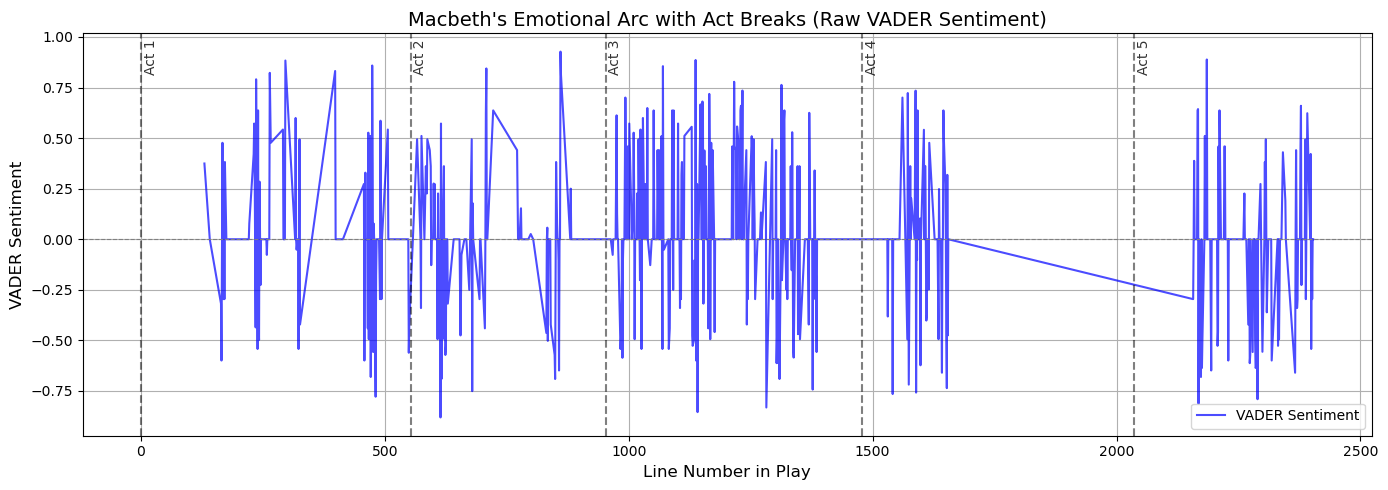

In [86]:
plt.figure(figsize=(14, 5))

plt.plot(macbeth_only_df["line_number"], macbeth_only_df["compound"], label="VADER Sentiment", color="blue", alpha=0.7)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

for act, start_line in act_starts.items():
    plt.axvline(start_line, color='black', linestyle='--', alpha=0.5)
    plt.text(start_line + 5, 0.9, f"Act {act}", rotation=90, verticalalignment='center', fontsize=10, alpha=0.8)

plt.title("Macbeth's Emotional Arc with Act Breaks (Raw VADER Sentiment)", fontsize=14)
plt.xlabel("Line Number in Play", fontsize=12)
plt.ylabel("VADER Sentiment", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

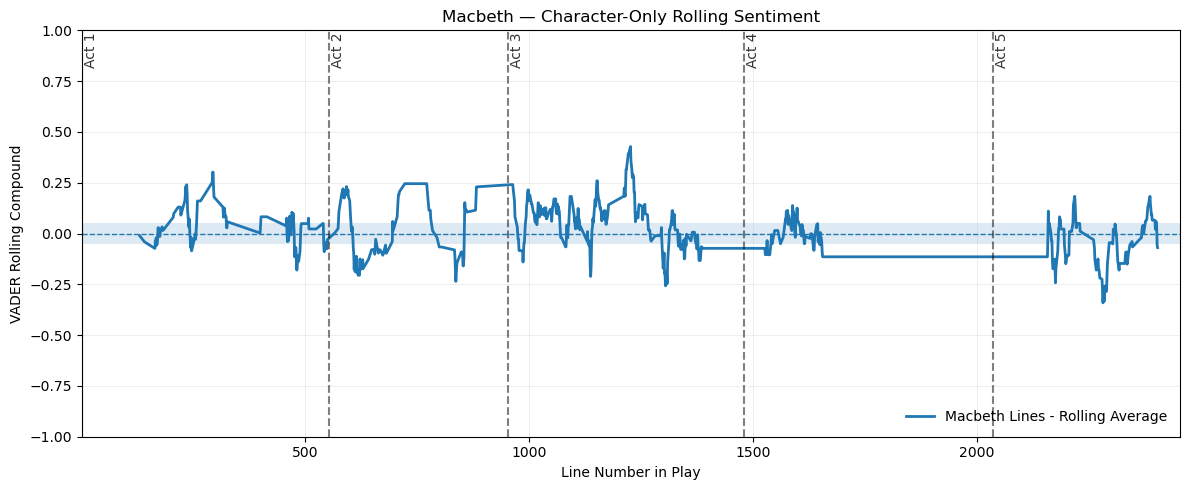

In [87]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(macbeth_only_df['line_number'], macbeth_only_df['rolling_compound'], linewidth=2, label='Macbeth Lines - Rolling Average')

ax.axhspan(-0.05, 0.05, alpha=0.15, zorder=0)
ax.axhline(0, linestyle='--', linewidth=1)

ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())
ax.set_xlabel('Line Number in Play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title('Macbeth — Character-Only Rolling Sentiment')

for act, start_line in act_starts.items():
    plt.axvline(start_line, color='black', linestyle='--', alpha=0.5)
    plt.text(start_line + 5, 0.9, f"Act {act}", rotation=90, verticalalignment='center', fontsize=10, alpha=0.8)
    
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

#### Macbeth's Character Arc vs. The Play

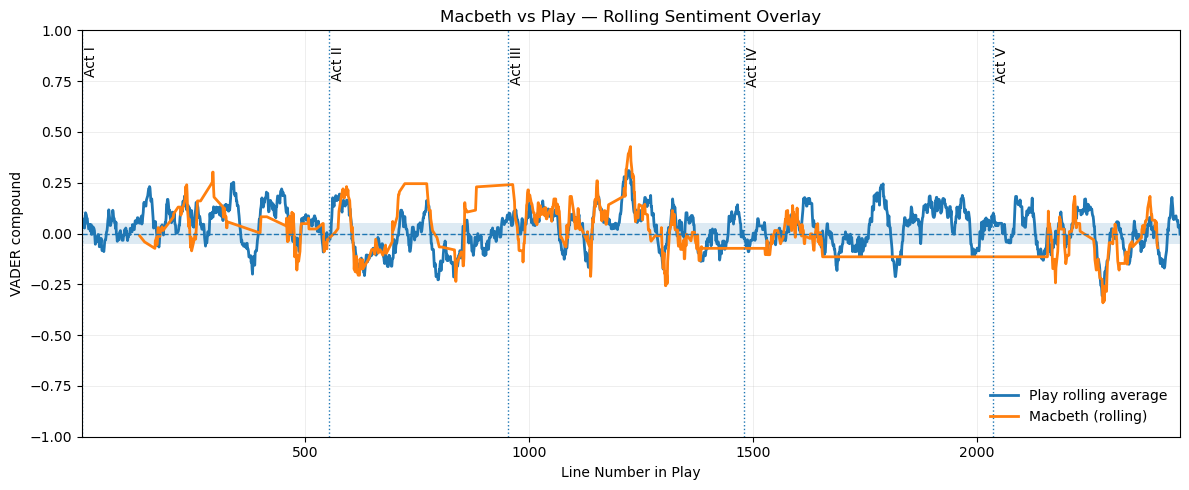

In [88]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(macbeth_full_text_df['line_number'], macbeth_full_text_df['play_rolling_compound_wide'], linewidth=2, label='Play rolling average')
ax.plot(macbeth_only_df['line_number'], macbeth_only_df['rolling_compound'], linewidth=2, label="Macbeth (rolling)")

ax.axhspan(-0.05, 0.05, alpha=0.15, zorder=0)
ax.axhline(0, linestyle='--', linewidth=1)

ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())
ax.set_xlabel('Line Number in Play')
ax.set_ylabel('VADER compound')
ax.set_title("Macbeth vs Play — Rolling Sentiment Overlay")

act_starts = macbeth_full_text_df.groupby('act')['line_number'].min()
roman = {1:'I',2:'II',3:'III',4:'IV',5:'V'}
for a, ln in act_starts.items():
    ax.axvline(ln, linestyle=':', linewidth=1)
    ax.text(ln + 5, 0.92*ax.get_ylim()[1], f'Act {roman.get(int(a), a)}',
            rotation=90, va='top', ha='left')

ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

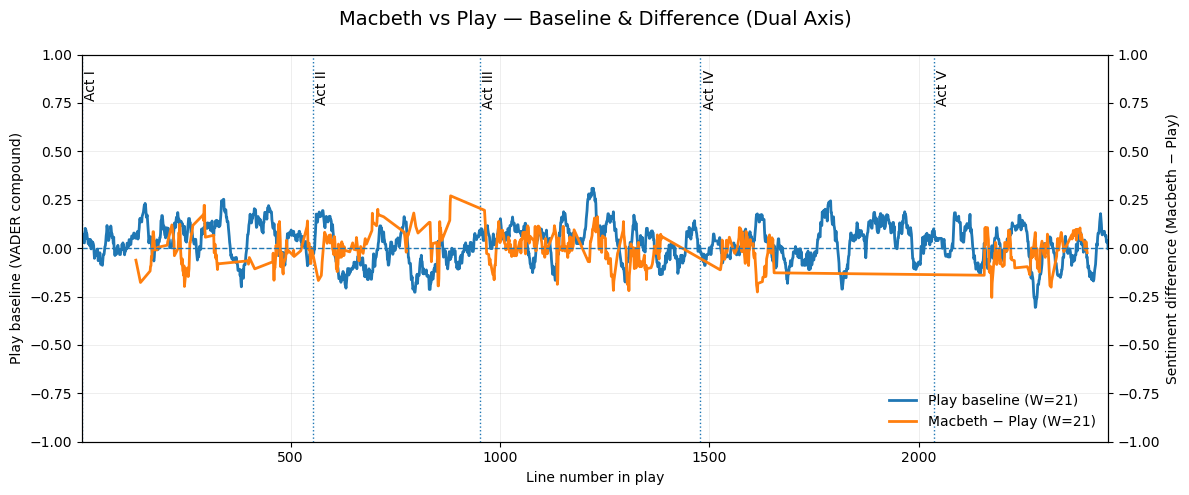

In [89]:
fig, ax1 = plt.subplots(figsize=(12,5))

ln1, = ax1.plot(
    macbeth_full_text_df['line_number'], macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, label='Play baseline (W=21)'
)
ax1.set_xlabel('Line number in play')
ax1.set_ylabel('Play baseline (VADER compound)')
ax1.set_xlim(macbeth_full_text_df['line_number'].min(), macbeth_full_text_df['line_number'].max())
ax1.set_ylim(-1, 1)
ax1.grid(True, linewidth=0.5, alpha=0.3)

ax2 = ax1.twinx()
ln2, = ax2.plot(
    macbeth_only_df['line_number'], macbeth_only_df['diff_vs_play_w21'],
    color='tab:orange', linewidth=2, label='Macbeth − Play (W=21)'
)
ax2.axhline(0, linestyle='--', linewidth=1)
ax2.set_ylabel('Sentiment difference (Macbeth − Play)')
ax2.set_ylim(-1, 1)

for act, start in act_starts.items():
    ax1.axvline(start, linestyle=':', linewidth=1)
    ax1.text(
        start + 5, 0.92 * ax1.get_ylim()[1],
        f'Act {roman[act]}', rotation=90, va='top', ha='left'
    )

lines = [ln1, ln2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right', frameon=False)

fig.suptitle("Macbeth vs Play — Baseline & Difference (Dual Axis)", fontsize=14)
fig.tight_layout()
plt.show()

### Lady MacBeth's Lines & Emotional Arc Via VADER

In [90]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_LadyMacbeth.html"

In [91]:
response = requests.get(url)

In [92]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nThey met me in the<br/>\r\nday of success, and I have learned by the perfect’st<br/>\r\nreport they have more in them than mortal knowledge.<br/>\r\nWhen I burned in desire to question them further, they<br/>\r\nmade themselves air, into which they vanished.<br/>\r\nWhiles I stood rapt in the wonder of it came missives<br/>\r\nfrom the King, who all-hailed me “Thane of Cawdor,”<br/>\r\nby which title, before, these Weïrd Sisters saluted me<br/>\r\nand referred me to the coming on of time with “Hail,<br/>\r\nking that shalt be.” This have I thought good to deliver<br/>\r\nthee, my dearest partner of greatness, that thou<br/>\r\nmight’st not lose the dues of rejoicing by being ignorant<br/>\r\nof what greatness is promised thee. Lay it to thy<br/>\r\nheart, and farewell.<br/>\r\nGlamis thou art, and Cawdor, and shalt be<br/>\r\nWhat thou art promised. Yet do I fear thy nature;<br/>\r\nIt is too full o’ th’ milk 

In [93]:
lady_macbeth_soup = BS(response.text, "html.parser")

In [94]:
lady_macbeth_soup

<html>
<head>
<meta charset="utf-8"/>
</head>
<body>
<br/>
They met me in the<br/>
day of success, and I have learned by the perfect’st<br/>
report they have more in them than mortal knowledge.<br/>
When I burned in desire to question them further, they<br/>
made themselves air, into which they vanished.<br/>
Whiles I stood rapt in the wonder of it came missives<br/>
from the King, who all-hailed me “Thane of Cawdor,”<br/>
by which title, before, these Weïrd Sisters saluted me<br/>
and referred me to the coming on of time with “Hail,<br/>
king that shalt be.” This have I thought good to deliver<br/>
thee, my dearest partner of greatness, that thou<br/>
might’st not lose the dues of rejoicing by being ignorant<br/>
of what greatness is promised thee. Lay it to thy<br/>
heart, and farewell.<br/>
Glamis thou art, and Cawdor, and shalt be<br/>
What thou art promised. Yet do I fear thy nature;<br/>
It is too full o’ th’ milk of human kindness<br/>
To catch the nearest way. Thou wouldst be g

In [95]:
lady_macbeth_lines = lady_macbeth_soup.get_text()

In [96]:
lady_macbeth_lines = lady_macbeth_lines.splitlines()

In [97]:
lady_macbeth_lines = [ln.strip() for ln in lady_macbeth_lines if ln.strip()]

In [98]:
lady_macbeth_lines

['They met me in the',
 'day of success, and I have learned by the perfect’st',
 'report they have more in them than mortal knowledge.',
 'When I burned in desire to question them further, they',
 'made themselves air, into which they vanished.',
 'Whiles I stood rapt in the wonder of it came missives',
 'from the King, who all-hailed me “Thane of Cawdor,”',
 'by which title, before, these Weïrd Sisters saluted me',
 'and referred me to the coming on of time with “Hail,',
 'king that shalt be.” This have I thought good to deliver',
 'thee, my dearest partner of greatness, that thou',
 'might’st not lose the dues of rejoicing by being ignorant',
 'of what greatness is promised thee. Lay it to thy',
 'heart, and farewell.',
 'Glamis thou art, and Cawdor, and shalt be',
 'What thou art promised. Yet do I fear thy nature;',
 'It is too full o’ th’ milk of human kindness',
 'To catch the nearest way. Thou wouldst be great,',
 'Art not without ambition, but without',
 'The illness should att

In [99]:
lady_macbeth_only_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(lady_macbeth_lines)].copy()

In [100]:
lady_macbeth_only_df.head()

line_number                                               text  act  \
331          332                                 They met me in the    1   
332          333  day of success, and I have learned by the perf...    1   
333          334  report they have more in them than mortal know...    1   
334          335  When I burned in desire to question them furth...    1   
335          336     made themselves air, into which they vanished.    1   

     scene  scene_id       act_scene  play_neg  play_neu  play_pos  \
331      5         5  Act 1, Scene 5       0.0     1.000     0.000   
332      5         5  Act 1, Scene 5       0.0     0.709     0.291   
333      5         5  Act 1, Scene 5       0.0     1.000     0.000   
334      5         5  Act 1, Scene 5       0.0     0.769     0.231   
335      5         5  Act 1, Scene 5       0.0     1.000     0.000   

     play_compound play_vader_label  play_rolling_compound_wide  \
331         0.0000              neu                    0.143086   
332         0.5719              pos                    0.171990   
333         0.0000              neu                    0.215014   
334         0.4019              pos                    0.245343   
335         0.0000              neu                    0.221824   

     play_rolling_compound_narrow  
331                      0.218155  
332                      0.155355  
333                      0.155355  
334                      0.162373  
335                      0.135582

In [101]:
lady_macbeth_only_df = lady_macbeth_only_df.reset_index(drop=True)

In [102]:
lady_macbeth_only_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [103]:
lady_macbeth_only_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [104]:
lady_macbeth_only_df = lady_macbeth_only_df.rename(columns={'play_neg': 'ladym_neg', 'play_neu': 'ladym_neu', 'play_pos': 'ladym_pos', 'play_vader_label': 'ladym_vader_label', 'play_compound': 'ladym_compound'})

In [105]:
lady_macbeth_only_df.head()

line_number                                               text  act  scene  \
0          332                                 They met me in the    1      5   
1          333  day of success, and I have learned by the perf...    1      5   
2          334  report they have more in them than mortal know...    1      5   
3          335  When I burned in desire to question them furth...    1      5   
4          336     made themselves air, into which they vanished.    1      5   

   scene_id       act_scene  ladym_neg  ladym_neu  ladym_pos  ladym_compound  \
0         5  Act 1, Scene 5        0.0      1.000      0.000          0.0000   
1         5  Act 1, Scene 5        0.0      0.709      0.291          0.5719   
2         5  Act 1, Scene 5        0.0      1.000      0.000          0.0000   
3         5  Act 1, Scene 5        0.0      0.769      0.231          0.4019   
4         5  Act 1, Scene 5        0.0      1.000      0.000          0.0000   

  ladym_vader_label  
0               neu  
1               pos  
2               neu  
3               pos  
4               neu

In [106]:
lady_macbeth_only_df = lady_macbeth_only_df.rename(columns={'ladym_neg': 'neg', 'ladym_neu': 'neu', 'ladym_pos': 'pos', 'ladym_vader_label': 'vader_label', 'ladym_compound': 'compound'})

In [107]:
lady_macbeth_only_df["vader_label"].value_counts()

vader_label
neu    122
neg     59
pos     56
Name: count, dtype: int64

In [108]:
lady_macbeth_only_df["compound"].min()

-0.802

In [109]:
lady_macbeth_only_df.loc[(lady_macbeth_only_df.compound == -0.802)]

line_number                                         text  act  scene  \
142          700  That fears a painted devil. If he do bleed,    2      2   

     scene_id       act_scene    neg    neu  pos  compound vader_label  
142         9  Act 2, Scene 2  0.507  0.493  0.0    -0.802         neg

In [110]:
lady_macbeth_only_df["compound"].max()

0.802

In [111]:
lady_macbeth_only_df.loc[(lady_macbeth_only_df.compound == 0.802)]

line_number                                               text  act  \
180         1219              For my heart speaks they are welcome.    3   
184         1249  ’Tis given with welcome. To feed were best at ...    3   

     scene  scene_id       act_scene  neg    neu    pos  compound vader_label  
180      4        15  Act 3, Scene 4  0.0  0.410  0.590     0.802         pos  
184      4        15  Act 3, Scene 4  0.0  0.526  0.474     0.802         pos

In [112]:
emotional_highs_lady_macbeth = lady_macbeth_only_df[lady_macbeth_only_df["compound"] >= high_threshold]

In [113]:
emotional_lows_lady_macbeth = lady_macbeth_only_df[lady_macbeth_only_df["compound"] <= low_threshold]

In [114]:
print("Emotional Highs:")
display(emotional_highs_lady_macbeth[["line_number", "act", "scene", "compound", "text"]].head())

print("Emotional Lows:")
display(emotional_lows_lady_macbeth[["line_number", "act", "scene", "compound", "text"]].head())

Emotional Highs:


line_number  act  scene  compound  \
180         1219    3      4     0.802   
184         1249    3      4     0.802   

                                                  text  
180              For my heart speaks they are welcome.  
184  ’Tis given with welcome. To feed were best at ...

Emotional Lows:


line_number  act  scene  compound  \
102          534    1      7   -0.7717   
142          700    2      2   -0.8020   

                                            text  
102   Their drenchèd natures lies as in a death,  
142  That fears a painted devil. If he do bleed,

In [115]:
lady_macbeth_only_df['rolling_compound'] = (
    lady_macbeth_only_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [116]:
lady_macbeth_only_df['rolling_intensity']=(
    lady_macbeth_only_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [117]:
lady_macbeth_only_df['rolling_volatility'] = (
    lady_macbeth_only_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [118]:
lady_macbeth_only_df['speech_id'] = (lady_macbeth_only_df['line_number'].diff().gt(1)).cumsum()

In [119]:
lady_macbeth_only_df['weighted_compound'] = (
    lady_macbeth_only_df['compound'] * lady_macbeth_only_df['compound'].abs()
)

In [120]:
lady_macbeth_only_df['rolling_weighted'] = (
    lady_macbeth_only_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [121]:
lady_macbeth_only_df['is_pos'] = (lady_macbeth_only_df['vader_label']=='pos').astype(int)

In [122]:
lady_macbeth_only_df['is_neg'] = (lady_macbeth_only_df['vader_label']=='neg').astype(int)

In [123]:
lady_macbeth_only_df['roll_pos_minus_neg'] = (
    lady_macbeth_only_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - lady_macbeth_only_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [124]:
sentiment_difference = lady_macbeth_only_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [125]:
lady_macbeth_only_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [126]:
lady_macbeth_only_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [127]:
lady_macbeth_only_df['rolling_within_speech'] = (
    lady_macbeth_only_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [128]:
lady_macbeth_only_df.insert(1, 'speaker', 'Lady Macbeth')

In [129]:
lady_macbeth_only_df.head()

line_number       speaker  \
0          332  Lady Macbeth   
1          333  Lady Macbeth   
2          334  Lady Macbeth   
3          335  Lady Macbeth   
4          336  Lady Macbeth   

                                                text  act  scene  scene_id  \
0                                 They met me in the    1      5         5   
1  day of success, and I have learned by the perf...    1      5         5   
2  report they have more in them than mortal know...    1      5         5   
3  When I burned in desire to question them furth...    1      5         5   
4     made themselves air, into which they vanished.    1      5         5   

        act_scene  neg    neu    pos  ...  rolling_volatility speech_id  \
0  Act 1, Scene 5  0.0  1.000  0.000  ...            0.330187         0   
1  Act 1, Scene 5  0.0  0.709  0.291  ...            0.289552         0   
2  Act 1, Scene 5  0.0  1.000  0.000  ...            0.273375         0   
3  Act 1, Scene 5  0.0  0.769  0.231  ...            0.273375         0   
4  Act 1, Scene 5  0.0  1.000  0.000  ...            0.179735         0   

   weighted_compound  rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  \
0           0.000000          0.081432       0       0            0.333333   
1           0.327070          0.069799       1       0            0.285714   
2           0.000000          0.099911       0       0            0.375000   
3           0.161524          0.129749       1       0            0.444444   
4           0.000000          0.129820       0       0            0.500000   

   diff_vs_play_w21  diff_vs_play_w11  rolling_within_speech  
0          0.019214         -0.055855               0.000000  
1         -0.032876         -0.016240               0.285950  
2         -0.023614          0.036045               0.190633  
3         -0.007765          0.075205               0.324600  
4          0.028116          0.114358               0.133967  

[5 rows x 24 columns]

#### Lady Macbeth's Emotional Arc Charts

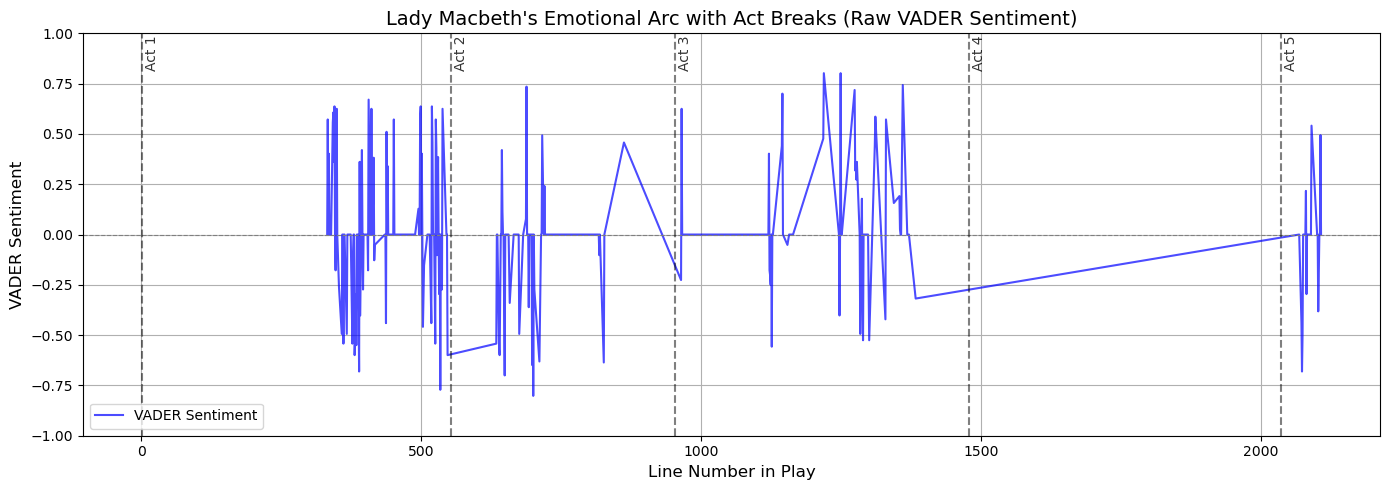

In [130]:
plt.figure(figsize=(14, 5))

plt.plot(lady_macbeth_only_df["line_number"], lady_macbeth_only_df["compound"], label="VADER Sentiment", color="blue", alpha=0.7)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

for act, start_line in act_starts.items():
    plt.axvline(start_line, color='black', linestyle='--', alpha=0.5)
    plt.text(start_line + 5, .9, f"Act {act}", rotation=90, verticalalignment='center', fontsize=10, alpha=0.8)

plt.title("Lady Macbeth's Emotional Arc with Act Breaks (Raw VADER Sentiment)", fontsize=14)
plt.xlabel("Line Number in Play", fontsize=12)
plt.ylabel("VADER Sentiment", fontsize=12)
plt.ylim(-1, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

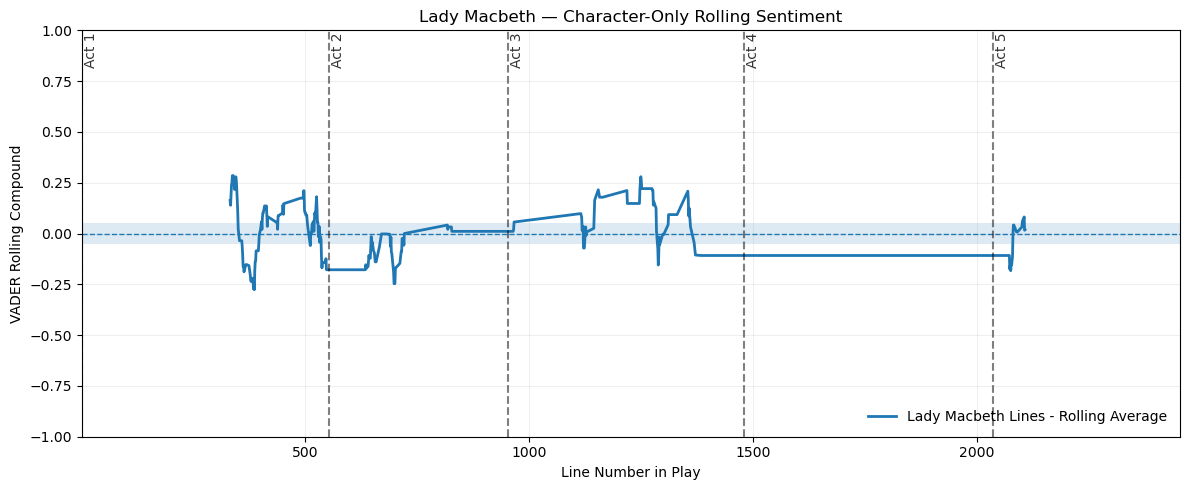

In [131]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(lady_macbeth_only_df['line_number'], lady_macbeth_only_df['rolling_compound'], linewidth=2, label='Lady Macbeth Lines - Rolling Average')

ax.axhspan(-0.05, 0.05, alpha=0.15, zorder=0)
ax.axhline(0, linestyle='--', linewidth=1)

ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())
ax.set_xlabel('Line Number in Play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title('Lady Macbeth — Character-Only Rolling Sentiment')

for act, start_line in act_starts.items():
    plt.axvline(start_line, color='black', linestyle='--', alpha=0.5)
    plt.text(start_line + 5, 0.9, f"Act {act}", rotation=90, verticalalignment='center', fontsize=10, alpha=0.8)
    
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

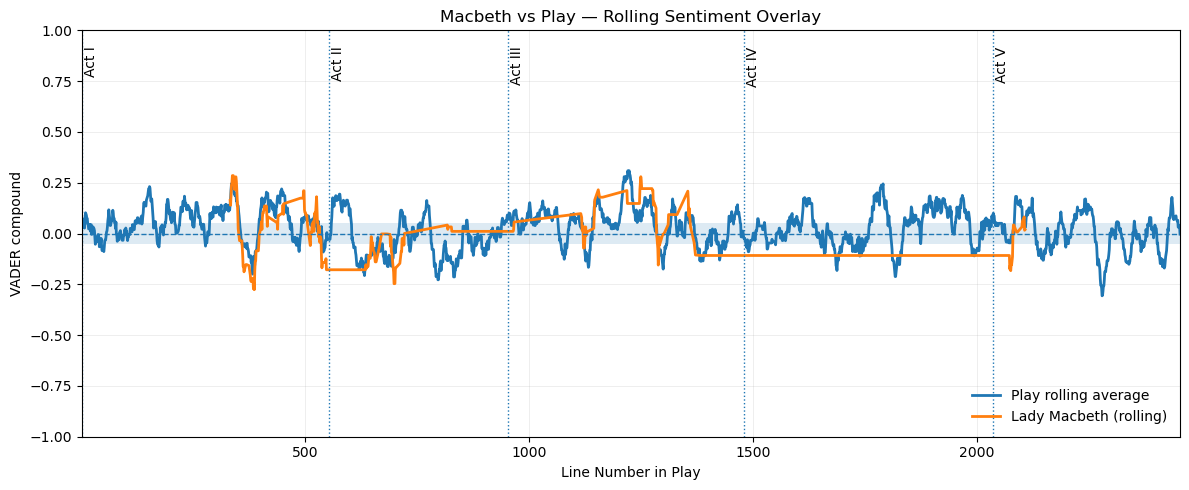

In [132]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(macbeth_full_text_df['line_number'], macbeth_full_text_df['play_rolling_compound_wide'], linewidth=2, label='Play rolling average')
ax.plot(lady_macbeth_only_df['line_number'], lady_macbeth_only_df['rolling_compound'], linewidth=2, label="Lady Macbeth (rolling)")

ax.axhspan(-0.05, 0.05, alpha=0.15, zorder=0)
ax.axhline(0, linestyle='--', linewidth=1)

ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(), macbeth_full_text_df['line_number'].max())
ax.set_xlabel('Line Number in Play')
ax.set_ylabel('VADER compound')
ax.set_title("Macbeth vs Play — Rolling Sentiment Overlay")

act_starts = macbeth_full_text_df.groupby('act')['line_number'].min()
roman = {1:'I',2:'II',3:'III',4:'IV',5:'V'}
for a, ln in act_starts.items():
    ax.axvline(ln, linestyle=':', linewidth=1)
    ax.text(ln + 5, 0.92*ax.get_ylim()[1], f'Act {roman.get(int(a), a)}',
            rotation=90, va='top', ha='left')

ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

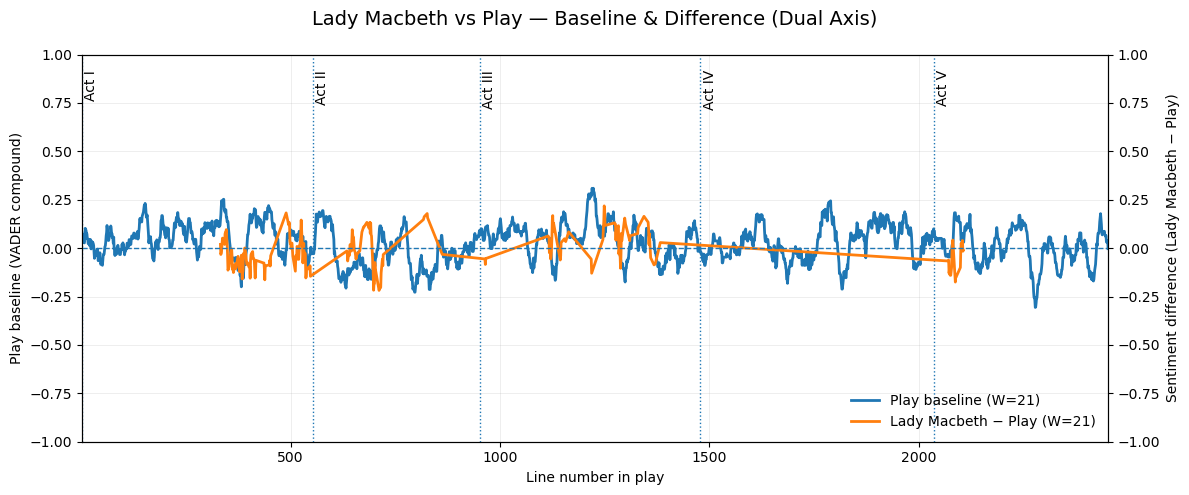

In [133]:
fig, ax1 = plt.subplots(figsize=(12,5))

ln1, = ax1.plot(
    macbeth_full_text_df['line_number'], macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, label='Play baseline (W=21)'
)
ax1.set_xlabel('Line number in play')
ax1.set_ylabel('Play baseline (VADER compound)')
ax1.set_xlim(macbeth_full_text_df['line_number'].min(), macbeth_full_text_df['line_number'].max())
ax1.set_ylim(-1, 1)
ax1.grid(True, linewidth=0.5, alpha=0.3)

ax2 = ax1.twinx()
ln2, = ax2.plot(
    lady_macbeth_only_df['line_number'], lady_macbeth_only_df['diff_vs_play_w21'],
    color='tab:orange', linewidth=2, label='Lady Macbeth − Play (W=21)'
)
ax2.axhline(0, linestyle='--', linewidth=1)
ax2.set_ylabel('Sentiment difference (Lady Macbeth − Play)')
ax2.set_ylim(-1, 1)

for act, start in act_starts.items():
    ax1.axvline(start, linestyle=':', linewidth=1)
    ax1.text(
        start + 5, 0.92 * ax1.get_ylim()[1],
        f'Act {roman[act]}', rotation=90, va='top', ha='left'
    )

lines = [ln1, ln2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right', frameon=False)

fig.suptitle("Lady Macbeth vs Play — Baseline & Difference (Dual Axis)", fontsize=14)
fig.tight_layout()
plt.show()

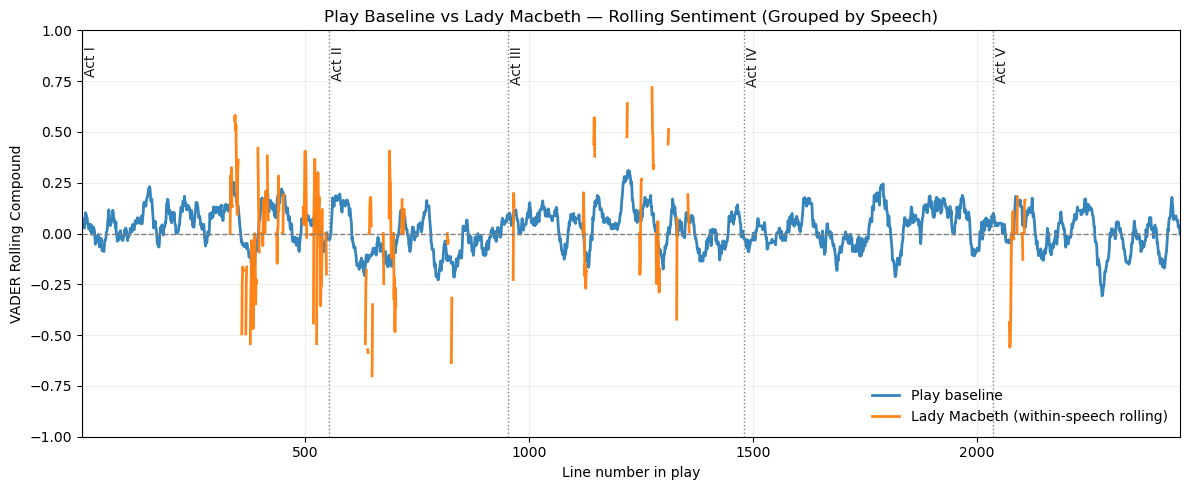

In [134]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in lady_macbeth_only_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Lady Macbeth (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Lady Macbeth — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

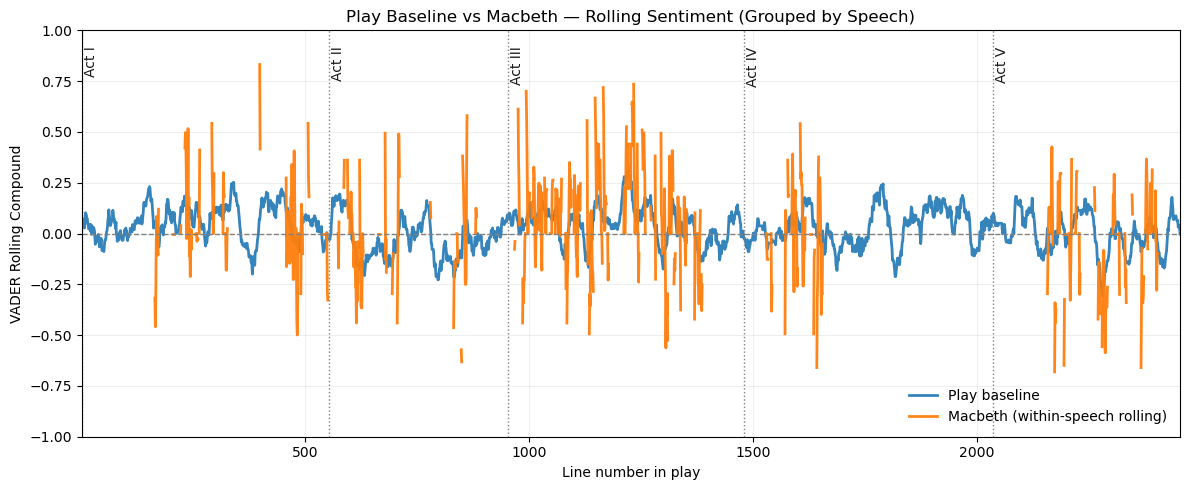

In [135]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in macbeth_only_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Macbeth (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Macbeth — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

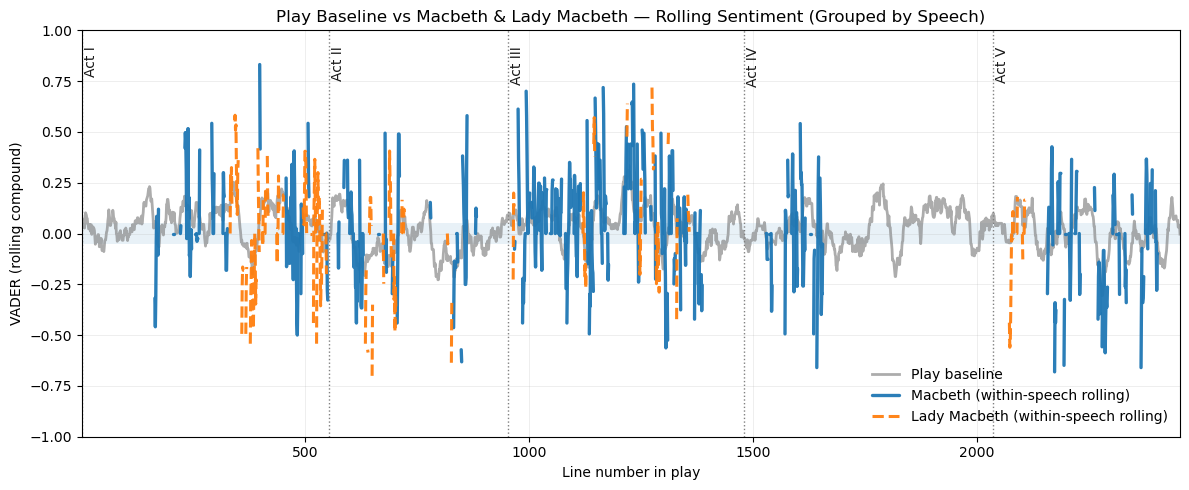

In [136]:
fig, ax = plt.subplots(figsize=(12,5))

baseline_c = 'gray'
macbeth_c = 'tab:blue'
lady_c = 'tab:orange'

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color=baseline_c, linestyle='-', linewidth=2, alpha=0.65,
    label='Play baseline', zorder=1
)

def plot_segments(df, value_col, label, *, ax, color, linestyle='-', lw=2.2, alpha=0.95):
    first = True
    for _, g in df.sort_values('line_number').groupby('speech_id', sort=False):
        ax.plot(
            g['line_number'], g[value_col],
            color=color, linestyle=linestyle, linewidth=lw, alpha=alpha,
            solid_capstyle='round',
            label=label if first else "", zorder=2
        )
        first = False

val_col = 'rolling_within_speech'  # adjust if you named it differently

plot_segments(macbeth_only_df,      val_col, 'Macbeth (within-speech rolling)',
              ax=ax, color=macbeth_c, linestyle='-',  lw=2.4, alpha=0.95)
plot_segments(lady_macbeth_only_df, val_col, 'Lady Macbeth (within-speech rolling)',
              ax=ax, color=lady_c, linestyle='--', lw=2.2, alpha=0.95)

ax.axhspan(-0.05, 0.05, alpha=0.10, zorder=0)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start+5, 0.92*ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER (rolling compound)')
ax.set_title('Play Baseline vs Macbeth & Lady Macbeth — Rolling Sentiment (Grouped by Speech)')
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Malcolm's Lines and Emotional Arc Via VADER

In [137]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Malcolm.html"

In [138]:
response = requests.get(url)

In [139]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\nThis is the sergeant<br/>\r\nWho, like a good and hardy soldier, fought<br/>\r\n’Gainst my captivity.—Hail, brave friend!<br/>\r\nSay to the King the knowledge of the broil<br/>\r\nAs thou didst leave it.<br/>\r\nThe worthy Thane of Ross.<br/>\r\nMy liege,<br/>\r\nThey are not yet come back. But I have spoke<br/>\r\nWith one that saw him die, who did report<br/>\r\nThat very frankly he confessed his treasons,<br/>\r\nImplored your Highness’ pardon, and set forth<br/>\r\nA deep repentance. Nothing in his life<br/>\r\nBecame him like the leaving it. He died<br/>\r\nAs one that had been studied in his death<br/>\r\nTo throw away the dearest thing he owed<br/>\r\nAs ’twere a careless trifle.<br/>\r\nO, by whom?<br/>\r\nWhy do we hold our tongues,<br/>\r\nThat most may claim this argument for ours?<br/>\r\nNor our strong sorrow upon the foot of motion.<br/>\r\nSo all.<br/>\r\nWell contented.<br/>\r\nWhat will you do? Let’s 

In [140]:
malcolm_soup = BS(response.text, "html.parser")

In [141]:
malcolm_soup

<html>
<head>
<meta charset="utf-8"/>
</head>
<body>
This is the sergeant<br/>
Who, like a good and hardy soldier, fought<br/>
’Gainst my captivity.—Hail, brave friend!<br/>
Say to the King the knowledge of the broil<br/>
As thou didst leave it.<br/>
The worthy Thane of Ross.<br/>
My liege,<br/>
They are not yet come back. But I have spoke<br/>
With one that saw him die, who did report<br/>
That very frankly he confessed his treasons,<br/>
Implored your Highness’ pardon, and set forth<br/>
A deep repentance. Nothing in his life<br/>
Became him like the leaving it. He died<br/>
As one that had been studied in his death<br/>
To throw away the dearest thing he owed<br/>
As ’twere a careless trifle.<br/>
O, by whom?<br/>
Why do we hold our tongues,<br/>
That most may claim this argument for ours?<br/>
Nor our strong sorrow upon the foot of motion.<br/>
So all.<br/>
Well contented.<br/>
What will you do? Let’s not consort with them.<br/>
To show an unfelt sorrow is an office<br/>
Which the 

In [142]:
malcolm_lines = malcolm_soup.get_text()

In [143]:
malcolm_lines = malcolm_lines.splitlines()

In [144]:
malcolm_lines = [ln.strip() for ln in malcolm_lines if ln.strip()]

In [145]:
malcolm_lines

['This is the sergeant',
 'Who, like a good and hardy soldier, fought',
 '’Gainst my captivity.—Hail, brave friend!',
 'Say to the King the knowledge of the broil',
 'As thou didst leave it.',
 'The worthy Thane of Ross.',
 'My liege,',
 'They are not yet come back. But I have spoke',
 'With one that saw him die, who did report',
 'That very frankly he confessed his treasons,',
 'Implored your Highness’ pardon, and set forth',
 'A deep repentance. Nothing in his life',
 'Became him like the leaving it. He died',
 'As one that had been studied in his death',
 'To throw away the dearest thing he owed',
 'As ’twere a careless trifle.',
 'O, by whom?',
 'Why do we hold our tongues,',
 'That most may claim this argument for ours?',
 'Nor our strong sorrow upon the foot of motion.',
 'So all.',
 'Well contented.',
 'What will you do? Let’s not consort with them.',
 'To show an unfelt sorrow is an office',
 'Which the false man does easy. I’ll to England.',
 'This murderous shaft that’s shot'

In [146]:
malcolm_only_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(malcolm_lines)].copy()

In [147]:
malcolm_only_df.head()

line_number                                        text  act  scene  \
16           17                        This is the sergeant    1      2   
17           18  Who, like a good and hardy soldier, fought    1      2   
18           19   ’Gainst my captivity.—Hail, brave friend!    1      2   
19           20  Say to the King the knowledge of the broil    1      2   
20           21                     As thou didst leave it.    1      2   

    scene_id       act_scene  play_neg  play_neu  play_pos  play_compound  \
16         2  Act 1, Scene 2     0.000     1.000     0.000         0.0000   
17         2  Act 1, Scene 2     0.160     0.278     0.562         0.7003   
18         2  Act 1, Scene 2     0.000     0.303     0.697         0.7840   
19         2  Act 1, Scene 2     0.000     1.000     0.000         0.0000   
20         2  Act 1, Scene 2     0.231     0.769     0.000        -0.0516   

   play_vader_label  play_rolling_compound_wide  play_rolling_compound_narrow  
16              neu                    0.022619                      0.109973  
17              pos                    0.022619                      0.059300  
18              pos                    0.044467                      0.010000  
19              neu                    0.011343                      0.078964  
20              neg                    0.043271                      0.032545

In [148]:
malcolm_only_df = malcolm_only_df.reset_index(drop=True)

In [149]:
malcolm_only_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [150]:
malcolm_only_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [151]:
malcolm_only_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   line_number       204 non-null    int64  
 1   text              204 non-null    object 
 2   act               204 non-null    int64  
 3   scene             204 non-null    int64  
 4   scene_id          204 non-null    int64  
 5   act_scene         204 non-null    object 
 6   play_neg          204 non-null    float64
 7   play_neu          204 non-null    float64
 8   play_pos          204 non-null    float64
 9   play_compound     204 non-null    float64
 10  play_vader_label  204 non-null    object 
dtypes: float64(4), int64(4), object(3)
memory usage: 17.7+ KB


In [152]:
malcolm_only_df = malcolm_only_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [153]:
malcolm_only_df.head()

line_number                                        text  act  scene  \
0           17                        This is the sergeant    1      2   
1           18  Who, like a good and hardy soldier, fought    1      2   
2           19   ’Gainst my captivity.—Hail, brave friend!    1      2   
3           20  Say to the King the knowledge of the broil    1      2   
4           21                     As thou didst leave it.    1      2   

   scene_id       act_scene    neg    neu    pos  compound vader_label  
0         2  Act 1, Scene 2  0.000  1.000  0.000    0.0000         neu  
1         2  Act 1, Scene 2  0.160  0.278  0.562    0.7003         pos  
2         2  Act 1, Scene 2  0.000  0.303  0.697    0.7840         pos  
3         2  Act 1, Scene 2  0.000  1.000  0.000    0.0000         neu  
4         2  Act 1, Scene 2  0.231  0.769  0.000   -0.0516         neg

In [154]:
malcolm_only_df['vader_label'].value_counts()

vader_label
neu    78
pos    75
neg    51
Name: count, dtype: int64

In [155]:
malcolm_only_df['compound'].min()

-0.8225

In [156]:
malcolm_only_df.loc[(malcolm_only_df.compound == -0.8225)]

line_number                        text  act  scene  scene_id  \
31         1755  Weep our sad bosoms empty.    4      3        20   

         act_scene    neg    neu  pos  compound vader_label  
31  Act 4, Scene 3  0.811  0.189  0.0   -0.8225         neg

In [157]:
malcolm_only_df["compound"].max()

0.9042

In [158]:
malcolm_only_df.loc[(malcolm_only_df.compound == 0.9042)]

line_number                                               text  act  \
48         1787  Those precious motives, those strong knots of ...    4   

    scene  scene_id       act_scene  neg    neu    pos  compound vader_label  
48      3        20  Act 4, Scene 3  0.0  0.309  0.691    0.9042         pos

In [159]:
emotional_highs_malcolm = malcolm_only_df[malcolm_only_df["compound"] >= high_threshold]

In [160]:
emotional_lows_malcolm = malcolm_only_df[malcolm_only_df["compound"]  <= low_threshold]

In [161]:
print("Emotional Highs:")
display(emotional_highs_malcolm[["line_number", "act", "scene", "compound", "text"]].head())

print("Emotional Lows:")
display(emotional_lows_malcolm[["line_number", "act", "scene", "compound", "text"]].head())

Emotional Highs:


line_number  act  scene  compound  \
2             19    1      2    0.7840   
37          1768    4      3    0.8519   
44          1780    4      3    0.7845   
48          1787    4      3    0.9042   
141         1932    4      3    0.7845   

                                                  text  
2            ’Gainst my captivity.—Hail, brave friend!  
37   Was once thought honest. You have loved him well.  
44   Angels are bright still, though the brightest ...  
48   Those precious motives, those strong knots of ...  
141               He hath a heavenly gift of prophecy,

Emotional Lows:


line_number  act  scene  compound  \
31          1755    4      3   -0.8225   
155         1999    4      3   -0.7650   

                                                 text  
31                         Weep our sad bosoms empty.  
155  Give sorrow words. The grief that does not speak

In [162]:
malcolm_only_df['rolling_compound'] = (
    malcolm_only_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [163]:
malcolm_only_df['rolling_intensity']=(
    malcolm_only_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [164]:
malcolm_only_df['rolling_volatility'] = (
    malcolm_only_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [165]:
malcolm_only_df['speech_id'] = (malcolm_only_df['line_number'].diff().gt(1)).cumsum()

In [166]:
malcolm_only_df['weighted_compound'] = (
    malcolm_only_df['compound'] * malcolm_only_df['compound'].abs()
)

In [167]:
malcolm_only_df['rolling_weighted'] = (
    malcolm_only_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [168]:
malcolm_only_df['is_pos'] = (malcolm_only_df['vader_label']=='pos').astype(int)

In [169]:
malcolm_only_df['is_neg'] = (malcolm_only_df['vader_label']=='neg').astype(int)

In [170]:
malcolm_only_df['roll_pos_minus_neg'] = (
    malcolm_only_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - malcolm_only_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [171]:
sentiment_difference = malcolm_only_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [172]:
malcolm_only_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [173]:
malcolm_only_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [174]:
malcolm_only_df['rolling_within_speech'] = (
     malcolm_only_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [175]:
malcolm_only_df.insert(1, 'speaker', 'Malcolm')

In [176]:
malcolm_only_df.head()

line_number  speaker                                        text  act  \
0           17  Malcolm                        This is the sergeant    1   
1           18  Malcolm  Who, like a good and hardy soldier, fought    1   
2           19  Malcolm   ’Gainst my captivity.—Hail, brave friend!    1   
3           20  Malcolm  Say to the King the knowledge of the broil    1   
4           21  Malcolm                     As thou didst leave it.    1   

   scene  scene_id       act_scene    neg    neu    pos  ...  \
0      2         2  Act 1, Scene 2  0.000  1.000  0.000  ...   
1      2         2  Act 1, Scene 2  0.160  0.278  0.562  ...   
2      2         2  Act 1, Scene 2  0.000  0.303  0.697  ...   
3      2         2  Act 1, Scene 2  0.000  1.000  0.000  ...   
4      2         2  Act 1, Scene 2  0.231  0.769  0.000  ...   

   rolling_volatility speech_id  weighted_compound  rolling_weighted  is_pos  \
0            0.430519         0           0.000000          0.216061       0   
1            0.429841         0           0.490420          0.185195       1   
2            0.417496         0           0.614656          0.162046       1   
3            0.387295         0           0.000000          0.104121       0   
4            0.366121         0          -0.002663          0.093709       0   

   is_neg  roll_pos_minus_neg  diff_vs_play_w21  diff_vs_play_w11  \
0       0            0.333333          0.289564          0.202211   
1       0            0.285714          0.244967          0.208286   
2       0            0.250000          0.189671          0.224137   
3       0            0.111111          0.130179          0.062559   
4       1            0.100000          0.084099          0.094825   

   rolling_within_speech  
0               0.000000  
1               0.350150  
2               0.494767  
3               0.494767  
4               0.244133  

[5 rows x 24 columns]

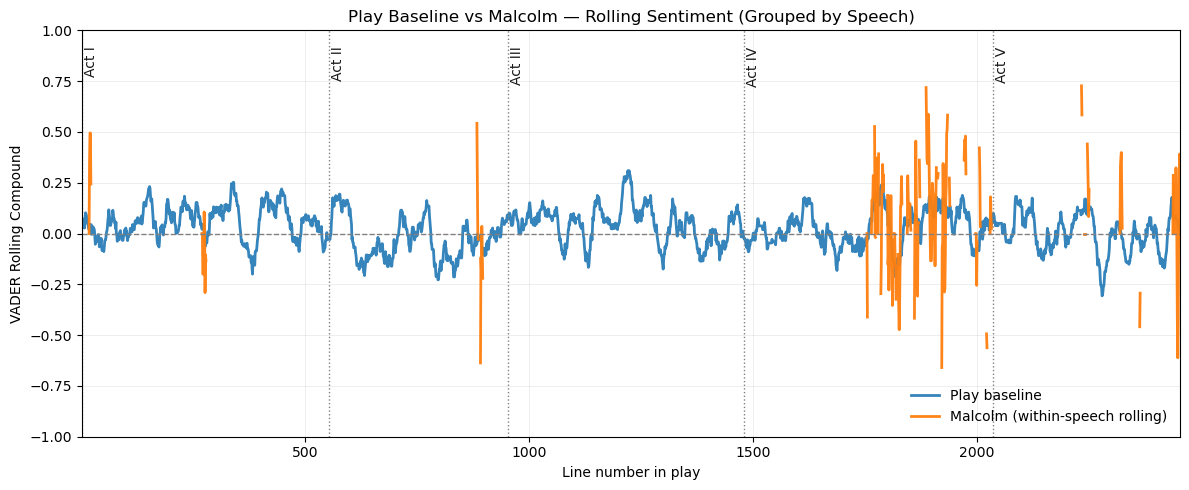

In [177]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in malcolm_only_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Malcolm (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Malcolm — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Macduff's Lines and Emotional Arc Via VADER

In [178]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Macduff.html"

In [179]:
response = requests.get(url)

In [180]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nWas it so late, friend, ere you went to bed<br/>\r\nThat you do lie so late?<br/>\r\nWhat three things does drink especially<br/>\r\nprovoke?<br/>\r\nI believe drink gave thee the lie last night.<br/>\r\nIs thy master stirring?<br/>\r\nOur knocking has awaked him. Here he comes.<br/>\r\nIs the King stirring, worthy thane?<br/>\r\nHe did command me to call timely on him.<br/>\r\nI have almost slipped the hour.<br/>\r\nI know this is a joyful trouble to you,<br/>\r\nBut yet ’tis one.<br/>\r\nI’ll make so bold to call,<br/>\r\nFor ’tis my limited service.<br/>\r\nO horror, horror, horror!<br/>\r\nTongue nor heart cannot conceive nor name thee!<br/>\r\nConfusion now hath made his masterpiece.<br/>\r\nMost sacrilegious murder hath broke ope<br/>\r\nThe Lord’s anointed temple and stole thence<br/>\r\nThe life o’ th’ building.<br/>\r\nApproach the chamber and destroy your sight<br/>\r\nWith a new Gorgon. Do not bid m

In [181]:
macduff_soup = BS(response.text, "html.parser")

In [182]:
macduff_soup

<html>
<head>
<meta charset="utf-8"/>
</head>
<body>
<br/>
Was it so late, friend, ere you went to bed<br/>
That you do lie so late?<br/>
What three things does drink especially<br/>
provoke?<br/>
I believe drink gave thee the lie last night.<br/>
Is thy master stirring?<br/>
Our knocking has awaked him. Here he comes.<br/>
Is the King stirring, worthy thane?<br/>
He did command me to call timely on him.<br/>
I have almost slipped the hour.<br/>
I know this is a joyful trouble to you,<br/>
But yet ’tis one.<br/>
I’ll make so bold to call,<br/>
For ’tis my limited service.<br/>
O horror, horror, horror!<br/>
Tongue nor heart cannot conceive nor name thee!<br/>
Confusion now hath made his masterpiece.<br/>
Most sacrilegious murder hath broke ope<br/>
The Lord’s anointed temple and stole thence<br/>
The life o’ th’ building.<br/>
Approach the chamber and destroy your sight<br/>
With a new Gorgon. Do not bid me speak.<br/>
See and then speak yourselves.  Awake, awake!<br/>
Ring the alarum 

In [183]:
macduff_lines = macduff_soup.get_text()

In [184]:
macduff_lines = macduff_lines.splitlines()

In [185]:
macduff_lines = [ln.strip() for ln in macduff_lines if ln.strip()]

In [186]:
macduff_lines

['Was it so late, friend, ere you went to bed',
 'That you do lie so late?',
 'What three things does drink especially',
 'provoke?',
 'I believe drink gave thee the lie last night.',
 'Is thy master stirring?',
 'Our knocking has awaked him. Here he comes.',
 'Is the King stirring, worthy thane?',
 'He did command me to call timely on him.',
 'I have almost slipped the hour.',
 'I know this is a joyful trouble to you,',
 'But yet ’tis one.',
 'I’ll make so bold to call,',
 'For ’tis my limited service.',
 'O horror, horror, horror!',
 'Tongue nor heart cannot conceive nor name thee!',
 'Confusion now hath made his masterpiece.',
 'Most sacrilegious murder hath broke ope',
 'The Lord’s anointed temple and stole thence',
 'The life o’ th’ building.',
 'Approach the chamber and destroy your sight',
 'With a new Gorgon. Do not bid me speak.',
 'See and then speak yourselves.  Awake, awake!',
 'Ring the alarum bell.—Murder and treason!',
 'Banquo and Donalbain, Malcolm, awake!',
 'Shake of

In [187]:
macduff_only_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(macduff_lines)].copy()

In [188]:
macduff_only_df = macduff_only_df.reset_index(drop=True)

In [189]:
macduff_only_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [190]:
macduff_only_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [191]:
macbeth_full_text_df.head(1)

line_number                             text  act  scene  scene_id  \
0            1  When shall we three meet again?    1      1         1   

        act_scene  play_neg  play_neu  play_pos  play_compound  \
0  Act 1, Scene 1       0.0       1.0       0.0            0.0   

  play_vader_label  play_rolling_compound_wide  play_rolling_compound_narrow  
0              neu                    0.030909                      0.056667

In [192]:
macduff_only_df = macduff_only_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [193]:
macduff_only_df.head(1)

line_number                                         text  act  scene  \
0          746  Was it so late, friend, ere you went to bed    2      3   

   scene_id       act_scene  neg    neu    pos  compound vader_label  
0        10  Act 2, Scene 3  0.0  0.721  0.279     0.539         pos

In [194]:
macduff_only_df['vader_label'].value_counts()

vader_label
neu    94
pos    46
neg    33
Name: count, dtype: int64

In [195]:
emotional_highs_macduff = macduff_only_df[macduff_only_df["compound"] >= high_threshold]

In [196]:
emotional_lows_macduff = macduff_only_df[macduff_only_df["compound"]  <= low_threshold]

In [197]:
print("Emotional Highs:")
display(emotional_highs_macduff[["line_number", "act", "scene", "compound", "text"]].head())

print("Emotional Lows:")
display(emotional_lows_macduff[["line_number", "act", "scene", "compound", "text"]].head())

Emotional Highs:


line_number  act  scene  compound  \
63          1793    4      3    0.7506   
128         2016    4      3    0.8070   
134         2024    4      3    0.8268   
151         2355    5      7    0.8519   

                                                  text  
63             Great tyranny, lay thou thy basis sure,  
128  That were most precious to me. Did heaven look on  
134  And braggart with my tongue! But, gentle heavens,  
151        By this great clatter, one of greatest note

Emotional Lows:


line_number  act  scene  compound  \
14          797    2      3   -0.9080   
17          801    2      3   -0.8307   
70         1821    4      3   -0.9468   

                                           text  
14                    O horror, horror, horror!  
17      Most sacrilegious murder hath broke ope  
70  Of horrid hell can come a devil more damned

In [198]:
macduff_only_df['rolling_compound'] = (
    macduff_only_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [199]:
macduff_only_df['rolling_intensity']=(
    macduff_only_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [200]:
macduff_only_df['rolling_volatility'] = (
    macduff_only_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [201]:
macduff_only_df['speech_id'] = (macduff_only_df['line_number'].diff().gt(1)).cumsum()

In [202]:
macduff_only_df['weighted_compound'] = (
    macduff_only_df['compound'] * macduff_only_df['compound'].abs()
)

In [203]:
macduff_only_df['rolling_weighted'] = (
    macduff_only_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [204]:
macduff_only_df['is_pos'] = (macduff_only_df['vader_label']=='pos').astype(int)

In [205]:
macduff_only_df['is_neg'] = (macduff_only_df['vader_label']=='neg').astype(int)

In [206]:
macduff_only_df['roll_pos_minus_neg'] = (
    macduff_only_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - macduff_only_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [207]:
sentiment_difference = macduff_only_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [208]:
macduff_only_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [209]:
macduff_only_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [210]:
macduff_only_df['rolling_within_speech'] = (
     macduff_only_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [211]:
macduff_only_df.insert(1, 'speaker', 'Macduff')

In [212]:
macduff_only_df.head(1)

line_number  speaker                                         text  act  \
0          746  Macduff  Was it so late, friend, ere you went to bed    2   

   scene  scene_id       act_scene  neg    neu    pos  ...  \
0      3        10  Act 2, Scene 3  0.0  0.721  0.279  ...   

   rolling_volatility speech_id  weighted_compound  rolling_weighted  is_pos  \
0            0.311192         0           0.290521            0.0215       1   

   is_neg  roll_pos_minus_neg  diff_vs_play_w21  diff_vs_play_w11  \
0       0                 0.0          0.015831         -0.071941   

   rolling_within_speech  
0                  0.539  

[1 rows x 24 columns]

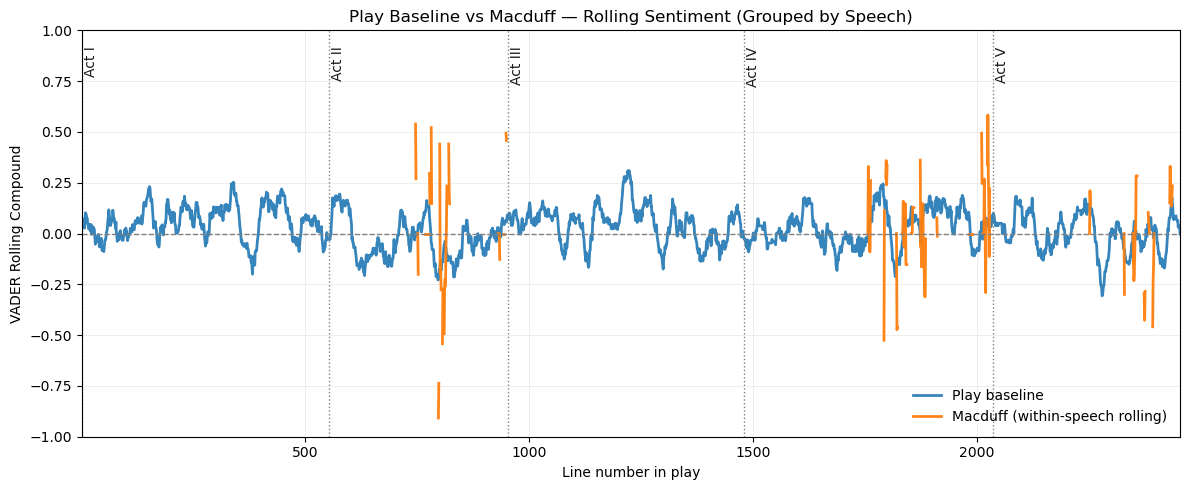

In [213]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in macduff_only_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Macduff (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Macduff — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Ross's Lines and Emotional Arc via VADER

In [214]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Ross.html"

In [215]:
response = requests.get(url)

In [216]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nGod save the King.<br/>\r\nFrom Fife, great king,<br/>\r\nWhere the Norweyan banners flout the sky<br/>\r\nAnd fan our people cold.<br/>\r\nNorway himself, with terrible numbers,<br/>\r\nAssisted by that most disloyal traitor,<br/>\r\nThe Thane of Cawdor, began a dismal conflict,<br/>\r\nTill that Bellona’s bridegroom, lapped in proof,<br/>\r\nConfronted him with self-comparisons,<br/>\r\nPoint against point, rebellious arm ’gainst arm,<br/>\r\nCurbing his lavish spirit. And to conclude,<br/>\r\nThe victory fell on us.<br/>\r\nThat now Sweno,<br/>\r\nThe Norways’ king, craves composition.<br/>\r\nNor would we deign him burial of his men<br/>\r\nTill he disbursèd at Saint Colme’s Inch<br/>\r\nTen thousand dollars to our general use.<br/>\r\nI’ll see it done.<br/>\r\nThe King hath happily received, Macbeth,<br/>\r\nThe news of thy success, and, when he reads<br/>\r\nThy personal venture in the rebels’ fight,<br/

In [217]:
ross_soup = BS(response.text, "html.parser")

In [218]:
ross_soup

<html>
<head>
<meta charset="utf-8"/>
</head>
<body>
<br/>
God save the King.<br/>
From Fife, great king,<br/>
Where the Norweyan banners flout the sky<br/>
And fan our people cold.<br/>
Norway himself, with terrible numbers,<br/>
Assisted by that most disloyal traitor,<br/>
The Thane of Cawdor, began a dismal conflict,<br/>
Till that Bellona’s bridegroom, lapped in proof,<br/>
Confronted him with self-comparisons,<br/>
Point against point, rebellious arm ’gainst arm,<br/>
Curbing his lavish spirit. And to conclude,<br/>
The victory fell on us.<br/>
That now Sweno,<br/>
The Norways’ king, craves composition.<br/>
Nor would we deign him burial of his men<br/>
Till he disbursèd at Saint Colme’s Inch<br/>
Ten thousand dollars to our general use.<br/>
I’ll see it done.<br/>
The King hath happily received, Macbeth,<br/>
The news of thy success, and, when he reads<br/>
Thy personal venture in the rebels’ fight,<br/>
His wonders and his praises do contend<br/>
Which should be thine or his. Si

In [219]:
ross_lines = ross_soup.get_text()

In [220]:
ross_lines = ross_lines.splitlines()

In [221]:
ross_lines = [ln.strip() for ln in ross_lines if ln.strip()]

In [222]:
ross_lines

['God save the King.',
 'From Fife, great king,',
 'Where the Norweyan banners flout the sky',
 'And fan our people cold.',
 'Norway himself, with terrible numbers,',
 'Assisted by that most disloyal traitor,',
 'The Thane of Cawdor, began a dismal conflict,',
 'Till that Bellona’s bridegroom, lapped in proof,',
 'Confronted him with self-comparisons,',
 'Point against point, rebellious arm ’gainst arm,',
 'Curbing his lavish spirit. And to conclude,',
 'The victory fell on us.',
 'That now Sweno,',
 'The Norways’ king, craves composition.',
 'Nor would we deign him burial of his men',
 'Till he disbursèd at Saint Colme’s Inch',
 'Ten thousand dollars to our general use.',
 'I’ll see it done.',
 'The King hath happily received, Macbeth,',
 'The news of thy success, and, when he reads',
 'Thy personal venture in the rebels’ fight,',
 'His wonders and his praises do contend',
 'Which should be thine or his. Silenced with that,',
 'In viewing o’er the rest o’ th’ selfsame day',
 'He finds

In [223]:
ross_only_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(ross_lines)].copy()

In [224]:
ross_only_df = ross_only_df.reset_index(drop=True)

In [225]:
ross_only_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [226]:
ross_only_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [227]:
ross_only_df = ross_only_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [228]:
ross_only_df.head(1)

line_number                text  act  scene  scene_id       act_scene  neg  \
0           67  God save the King.    1      2         2  Act 1, Scene 2  0.0   

     neu    pos  compound vader_label  
0  0.274  0.726    0.6486         pos

In [229]:
ross_only_df['vader_label'].value_counts()

vader_label
neu    51
neg    41
pos    40
Name: count, dtype: int64

In [230]:
emotional_highs_ross = ross_only_df[ross_only_df["compound"] >= high_threshold]

In [231]:
emotional_lows_ross = ross_only_df[ross_only_df["compound"]  <= low_threshold]

In [232]:
print("Emotional Highs:")
display(emotional_highs_ross[["line_number", "act", "scene", "compound", "text"]].head())

print("Emotional Lows:")
display(emotional_lows_ross[["line_number", "act", "scene", "compound", "text"]].head())

Emotional Highs:


line_number  act  scene  compound  \
28          194    1      3    0.8402   
30          200    1      3    0.8402   
68         1674    4      2    0.8834   

                                            text  
28   Thy praises in his kingdom’s great defense,  
30        And for an earnest of a greater honor,  
68  He is noble, wise, judicious, and best knows

Emotional Lows:


Empty DataFrame
Columns: [line_number, act, scene, compound, text]
Index: []

In [233]:
ross_only_df['rolling_compound'] = (
    ross_only_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [234]:
ross_only_df['rolling_intensity']=(
    ross_only_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [235]:
ross_only_df['volatility'] = (
    ross_only_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [236]:
ross_only_df['speech_id'] = (ross_only_df['line_number'].diff().gt(1)).cumsum()

In [237]:
ross_only_df['weighted_compound'] = (
    ross_only_df['compound'] * ross_only_df['compound'].abs()
)

In [238]:
ross_only_df['rolling_weighted'] = (
    ross_only_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [239]:
ross_only_df['is_pos'] = (ross_only_df['vader_label']=='pos').astype(int)

In [240]:
ross_only_df['is_neg'] = (ross_only_df['vader_label']=='neg').astype(int)

In [241]:
ross_only_df['roll_pos_minus_neg'] = (
    ross_only_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - ross_only_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [242]:
sentiment_difference = ross_only_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [243]:
ross_only_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [244]:
ross_only_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [245]:
ross_only_df['rolling_within_speech'] = (
     ross_only_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [246]:
ross_only_df.insert(1, 'speaker', 'Ross')

In [247]:
ross_only_df.head(1)

line_number speaker                text  act  scene  scene_id  \
0           67    Ross  God save the King.    1      2         2   

        act_scene  neg    neu    pos  ...  volatility speech_id  \
0  Act 1, Scene 2  0.0  0.274  0.726  ...    0.367819         0   

   weighted_compound  rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  \
0           0.420682          0.114198       1       0            0.333333   

   diff_vs_play_w21  diff_vs_play_w11  rolling_within_speech  
0          0.127195          0.022788                 0.6486  

[1 rows x 24 columns]

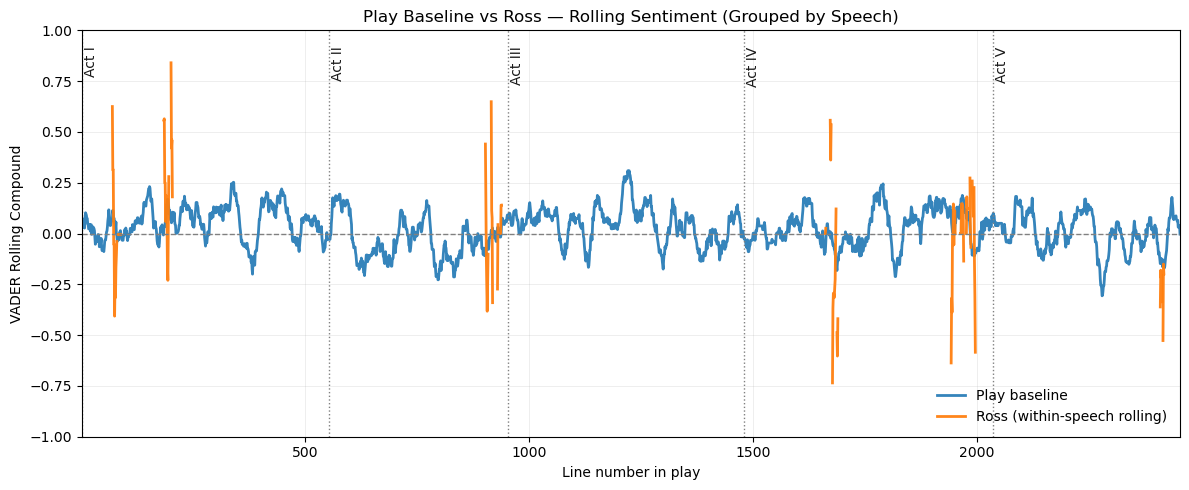

In [248]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in ross_only_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Ross (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Ross — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Banquo's Lines and Emotional Arc Via VADER

In [249]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Banquo.html"

In [250]:
response = requests.get(url)

In [251]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nHow far is ’t called to Forres?—What are these,<br/>\r\nSo withered, and so wild in their attire,<br/>\r\nThat look not like th’ inhabitants o’ th’ Earth<br/>\r\nAnd yet are on ’t?—Live you? Or are you aught<br/>\r\nThat man may question? You seem to understand me<br/>\r\nBy each at once her choppy finger laying<br/>\r\nUpon her skinny lips. You should be women,<br/>\r\nAnd yet your beards forbid me to interpret<br/>\r\nThat you are so.<br/>\r\nGood sir, why do you start and seem to fear<br/>\r\nThings that do sound so fair?—I’ th’ name of truth,<br/>\r\nAre you fantastical, or that indeed<br/>\r\nWhich outwardly you show? My noble partner<br/>\r\nYou greet with present grace and great prediction<br/>\r\nOf noble having and of royal hope,<br/>\r\nThat he seems rapt withal. To me you speak not.<br/>\r\nIf you can look into the seeds of time<br/>\r\nAnd say which grain will grow and which will not,<br/>\r\nSpeak

In [252]:
banquo_soup = BS(response.text, "html.parser")

In [253]:
banquo_soup

<html>
<head>
<meta charset="utf-8"/>
</head>
<body>
<br/>
How far is ’t called to Forres?—What are these,<br/>
So withered, and so wild in their attire,<br/>
That look not like th’ inhabitants o’ th’ Earth<br/>
And yet are on ’t?—Live you? Or are you aught<br/>
That man may question? You seem to understand me<br/>
By each at once her choppy finger laying<br/>
Upon her skinny lips. You should be women,<br/>
And yet your beards forbid me to interpret<br/>
That you are so.<br/>
Good sir, why do you start and seem to fear<br/>
Things that do sound so fair?—I’ th’ name of truth,<br/>
Are you fantastical, or that indeed<br/>
Which outwardly you show? My noble partner<br/>
You greet with present grace and great prediction<br/>
Of noble having and of royal hope,<br/>
That he seems rapt withal. To me you speak not.<br/>
If you can look into the seeds of time<br/>
And say which grain will grow and which will not,<br/>
Speak, then, to me, who neither beg nor fear<br/>
Your favors nor your hate.<

In [254]:
banquo_lines = banquo_soup.get_text()

In [255]:
banquo_lines = banquo_lines.splitlines()

In [256]:
banquo_lines = [ln.strip() for ln in banquo_lines if ln.strip()]

In [257]:
banquo_only_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(banquo_lines)].copy()

In [258]:
banquo_only_df = banquo_only_df.reset_index(drop=True)

In [259]:
banquo_only_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [260]:
banquo_only_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [261]:
banquo_only_df = banquo_only_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [262]:
banquo_only_df.head(1)

line_number                                             text  act  scene  \
0          131  How far is ’t called to Forres?—What are these,    1      3   

   scene_id       act_scene  neg  neu  pos  compound vader_label  
0         3  Act 1, Scene 3  0.0  1.0  0.0       0.0         neu

In [263]:
banquo_only_df['vader_label'].value_counts()

vader_label
neu    54
pos    36
neg    20
Name: count, dtype: int64

In [264]:
emotional_highs_banquo = banquo_only_df[banquo_only_df["compound"] >= high_threshold]

In [265]:
emotional_lows_banquo = banquo_only_df[banquo_only_df["compound"]  <= low_threshold]

In [266]:
print("Emotional Highs:")
display(emotional_highs_banquo[["line_number", "act", "scene", "compound", "text"]].head())

print("Emotional Lows:")
display(emotional_lows_banquo[["line_number", "act", "scene", "compound", "text"]].head())

Emotional Highs:


line_number  act  scene  compound  \
12          149    1      3    0.8481   
80          876    2      3    0.8555   

                                                 text  
12  You greet with present grace and great prediction  
80       In the great hand of God I stand, and thence

Emotional Lows:


Empty DataFrame
Columns: [line_number, act, scene, compound, text]
Index: []

In [267]:
banquo_only_df['rolling_compound'] = (
    banquo_only_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [268]:
banquo_only_df['rolling_intensity']=(
    banquo_only_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [269]:
banquo_only_df['rolling_volatility'] = (
    banquo_only_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [270]:
banquo_only_df['speech_id'] = (banquo_only_df['line_number'].diff().gt(1)).cumsum()

In [271]:
banquo_only_df['weighted_compound'] = (
    banquo_only_df['compound'] * banquo_only_df['compound'].abs()
)

In [272]:
banquo_only_df['rolling_weighted'] = (
    banquo_only_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [273]:
banquo_only_df['is_pos'] = (banquo_only_df['vader_label']=='pos').astype(int)

In [274]:
banquo_only_df['is_neg'] = (banquo_only_df['vader_label']=='neg').astype(int)

In [275]:
banquo_only_df['roll_pos_minus_neg'] = (
    banquo_only_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - banquo_only_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [276]:
sentiment_difference = banquo_only_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [277]:
banquo_only_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [278]:
banquo_only_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [279]:
banquo_only_df['rolling_within_speech'] = (
     banquo_only_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [280]:
banquo_only_df.insert(1, 'speaker', 'Banquo')

In [281]:
banquo_only_df.head(1)

line_number speaker                                             text  act  \
0          131  Banquo  How far is ’t called to Forres?—What are these,    1   

   scene  scene_id       act_scene  neg  neu  pos  ...  rolling_volatility  \
0      3         3  Act 1, Scene 3  0.0  1.0  0.0  ...             0.15906   

  speech_id  weighted_compound  rolling_weighted  is_pos  is_neg  \
0         0                0.0          -0.01265       0       0   

   roll_pos_minus_neg  diff_vs_play_w21  diff_vs_play_w11  \
0           -0.166667          -0.09704         -0.104208   

   rolling_within_speech  
0                    0.0  

[1 rows x 24 columns]

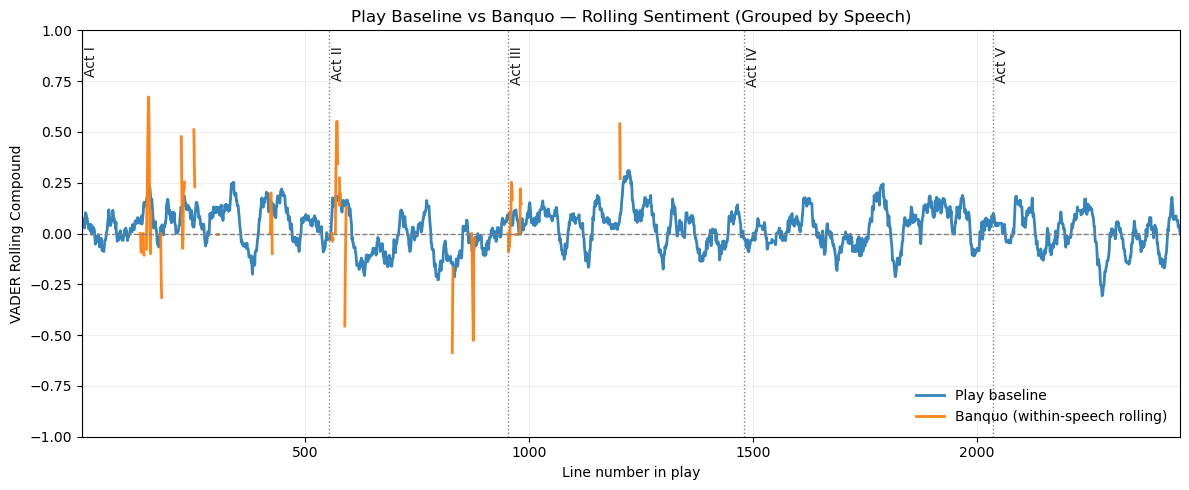

In [282]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in banquo_only_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Banquo (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Banquo — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Lennox's Lines and Emotional Arc Via VADER

In [283]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Lennox.html"

In [284]:
response = requests.get(url)

In [285]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nWhat a haste looks through his eyes!<br/>\r\nSo should he look that seems to speak things strange.<br/>\r\nGood morrow, noble sir.<br/>\r\nGoes the King hence today?<br/>\r\nThe night has been unruly. Where we lay,<br/>\r\nOur chimneys were blown down and, as they say,<br/>\r\nLamentings heard i’ th’ air, strange screams of death,<br/>\r\nAnd prophesying, with accents terrible,<br/>\r\nOf dire combustion and confused events<br/>\r\nNew hatched to th’ woeful time. The obscure bird<br/>\r\nClamored the livelong night. Some say the Earth<br/>\r\nWas feverous and did shake.<br/>\r\nMy young remembrance cannot parallel<br/>\r\nA fellow to it.<br/>\r\nWhat’s the matter?<br/>\r\nMean you his Majesty?<br/>\r\nThose of his chamber, as it seemed, had done ’t.<br/>\r\nTheir hands and faces were all badged with blood.<br/>\r\nSo were their daggers, which unwiped we found<br/>\r\nUpon their pillows. They stared and were di

In [286]:
lennox_soup = BS(response.text, "html.parser")

In [287]:
lennox_lines = lennox_soup.get_text()

In [288]:
lennox_lines = lennox_lines.splitlines()

In [289]:
lennox_lines = [ln.strip() for ln in lennox_lines if ln.strip()]

In [290]:
lennox_only_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(lennox_lines)].copy()

In [291]:
lennox_only_df = lennox_only_df.reset_index(drop=True)

In [292]:
lennox_only_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [293]:
lennox_only_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [294]:
lennox_only_df = lennox_only_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [295]:
lennox_only_df.head(3)

line_number                                  text  act  scene  scene_id  \
0           64  What a haste looks through his eyes!    1      2         2   
1          770               Good morrow, noble sir.    2      3        10   
2          783            Goes the King hence today?    2      3        10   

        act_scene  neg    neu    pos  compound vader_label  
0  Act 1, Scene 2  0.0  1.000  0.000    0.0000         neu  
1  Act 2, Scene 3  0.0  0.253  0.747    0.7096         pos  
2  Act 2, Scene 3  0.0  1.000  0.000    0.0000         neu

In [296]:
lennox_only_df['vader_label'].value_counts()

vader_label
neu    35
neg    17
pos    16
Name: count, dtype: int64

In [297]:
emotional_highs_lennox = lennox_only_df[lennox_only_df["compound"] >= high_threshold]

In [298]:
emotional_lows_lennox = lennox_only_df[lennox_only_df["compound"]  <= low_threshold]

In [299]:
print("Emotional Highs:")
display(emotional_highs_lennox[["line_number", "act", "scene", "compound", "text"]].head())

print("Emotional Lows:")
display(emotional_lows_lennox[["line_number", "act", "scene", "compound", "text"]].head())

Emotional Highs:


Empty DataFrame
Columns: [line_number, act, scene, compound, text]
Index: []

Emotional Lows:


line_number  act  scene  compound  \
28         1427    3      6    -0.765   

                                          text  
28  Was pitied of Macbeth; marry, he was dead.

In [300]:
lennox_only_df['rolling_compound'] = (
    lennox_only_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [301]:
lennox_only_df['rolling_intensity']=(
    lennox_only_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [302]:
lennox_only_df['rolling_volatility'] = (
    lennox_only_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [303]:
lennox_only_df['speech_id'] = (lennox_only_df['line_number'].diff().gt(1)).cumsum()

In [304]:
lennox_only_df['weighted_compound'] = (
    lennox_only_df['compound'] * lennox_only_df['compound'].abs()
)

In [305]:
lennox_only_df['rolling_weighted'] = (
    lennox_only_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [306]:
lennox_only_df['is_pos'] = (lennox_only_df['vader_label']=='pos').astype(int)

In [307]:
lennox_only_df['is_neg'] = (lennox_only_df['vader_label']=='neg').astype(int)

In [308]:
lennox_only_df['roll_pos_minus_neg'] = (
    lennox_only_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - lennox_only_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [309]:
sentiment_difference = lennox_only_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [310]:
lennox_only_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [311]:
lennox_only_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [312]:
lennox_only_df['rolling_within_speech'] = (
     lennox_only_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [313]:
lennox_only_df.insert(1, 'speaker', 'Lennox')

In [314]:
lennox_only_df.head(1)

line_number speaker                                  text  act  scene  \
0           64  Lennox  What a haste looks through his eyes!    1      2   

   scene_id       act_scene  neg  neu  pos  ...  rolling_volatility speech_id  \
0         2  Act 1, Scene 2  0.0  1.0  0.0  ...            0.409688         0   

   weighted_compound  rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  \
0                0.0          0.046048       0       0                 0.0   

   diff_vs_play_w21  diff_vs_play_w11  rolling_within_speech  
0         -0.000731         -0.200383                    0.0  

[1 rows x 24 columns]

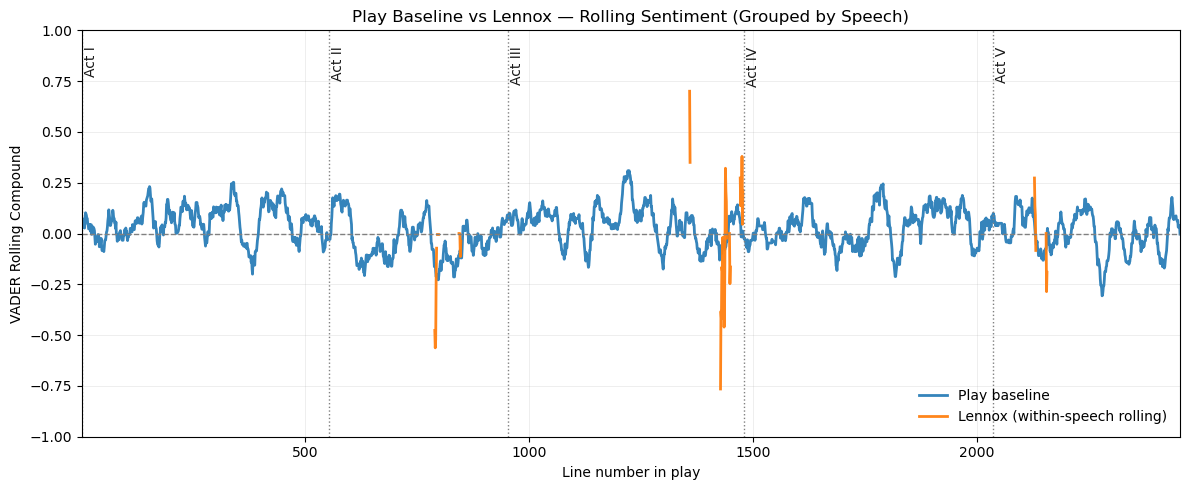

In [315]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in lennox_only_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Lennox (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Lennox — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Duncan's Lines and Emotional Arc Via VADER

In [316]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Duncan.html"

In [317]:
response = requests.get(url)

In [318]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nWhat bloody man is that? He can report,<br/>\r\nAs seemeth by his plight, of the revolt<br/>\r\nThe newest state.<br/>\r\nO valiant cousin, worthy gentleman!<br/>\r\nDismayed not this our captains, Macbeth and Banquo?<br/>\r\nSo well thy words become thee as thy wounds:<br/>\r\nThey smack of honor both.—Go, get him surgeons.<br/>\r\nWho comes here?<br/>\r\nWhence cam’st thou, worthy thane?<br/>\r\nGreat happiness!<br/>\r\nNo more that Thane of Cawdor shall deceive<br/>\r\nOur bosom interest. Go, pronounce his present death,<br/>\r\nAnd with his former title greet Macbeth.<br/>\r\nWhat he hath lost, noble Macbeth hath won.<br/>\r\nIs execution done on Cawdor? Are not<br/>\r\nThose in commission yet returned?<br/>\r\nThere’s no art<br/>\r\nTo find the mind’s construction in the face.<br/>\r\nHe was a gentleman on whom I built<br/>\r\nAn absolute trust.    O worthiest cousin,<br/>\r\nThe sin of my ingratitude eve

In [319]:
duncan_soup = BS(response.text, "html.parser")

In [320]:
duncan_lines = duncan_soup.get_text()

In [321]:
duncan_lines = duncan_lines.splitlines()

In [322]:
duncan_lines = [ln.strip() for ln in duncan_lines if ln.strip()]

In [323]:
duncan_only_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(duncan_lines)].copy()

In [324]:
duncan_only_df = duncan_only_df.reset_index(drop=True)

In [325]:
duncan_only_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [326]:
duncan_only_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [327]:
duncan_only_df = duncan_only_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [328]:
duncan_only_df.head(3)

line_number                                     text  act  scene  scene_id  \
0           14  What bloody man is that? He can report,    1      2         2   
1           15  As seemeth by his plight, of the revolt    1      2         2   
2           16                        The newest state.    1      2         2   

        act_scene    neg    neu  pos  compound vader_label  
0  Act 1, Scene 2  0.293  0.707  0.0   -0.4404         neg  
1  Act 1, Scene 2  0.000  1.000  0.0    0.0000         neu  
2  Act 1, Scene 2  0.000  1.000  0.0    0.0000         neu

In [329]:
duncan_only_df['vader_label'].value_counts()

vader_label
pos    27
neu    26
neg    11
Name: count, dtype: int64

In [330]:
emotional_highs_duncan = duncan_only_df[duncan_only_df["compound"] >= high_threshold]

In [331]:
emotional_lows_duncan = duncan_only_df[duncan_only_df["compound"]  <= low_threshold]

In [332]:
print("Emotional Highs:")
display(emotional_highs_duncan[["line_number", "act", "scene", "compound", "text"]].head())

print("Emotional Lows:")
display(emotional_lows_duncan[["line_number", "act", "scene", "compound", "text"]].head())

Emotional Highs:


line_number  act  scene  compound  \
8            80    1      2    0.8398   
52          432    1      6    0.7717   

                                                text  
8                                   Great happiness!  
52  Which still we thank as love. Herein I teach you

Emotional Lows:


Empty DataFrame
Columns: [line_number, act, scene, compound, text]
Index: []

In [333]:
duncan_only_df['rolling_compound'] = (
    duncan_only_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [334]:
duncan_only_df['rolling_intensity']=(
    duncan_only_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [335]:
duncan_only_df['rolling_volatility'] = (
    duncan_only_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [336]:
duncan_only_df['speech_id'] = (duncan_only_df['line_number'].diff().gt(1)).cumsum()

In [337]:
duncan_only_df['weighted_compound'] = (
    duncan_only_df['compound'] * duncan_only_df['compound'].abs()
)

In [338]:
duncan_only_df['rolling_weighted'] = (
    duncan_only_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [339]:
duncan_only_df['is_pos'] = (duncan_only_df['vader_label']=='pos').astype(int)

In [340]:
duncan_only_df['is_neg'] = (duncan_only_df['vader_label']=='neg').astype(int)

In [341]:
duncan_only_df['roll_pos_minus_neg'] = (
    duncan_only_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - duncan_only_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [342]:
sentiment_difference = duncan_only_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [343]:
duncan_only_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [344]:
duncan_only_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [345]:
duncan_only_df['rolling_within_speech'] = (
     duncan_only_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [346]:
duncan_only_df.insert(1, 'speaker', 'Duncan')

In [347]:
duncan_only_df.head(1)

line_number speaker                                     text  act  scene  \
0           14  Duncan  What bloody man is that? He can report,    1      2   

   scene_id       act_scene    neg    neu  pos  ...  rolling_volatility  \
0         2  Act 1, Scene 2  0.293  0.707  0.0  ...            0.254265   

  speech_id  weighted_compound  rolling_weighted  is_pos  is_neg  \
0         0          -0.193952          0.067859       0       1   

   roll_pos_minus_neg  diff_vs_play_w21  diff_vs_play_w11  \
0            0.333333          0.099445          0.001844   

   rolling_within_speech  
0                -0.4404  

[1 rows x 24 columns]

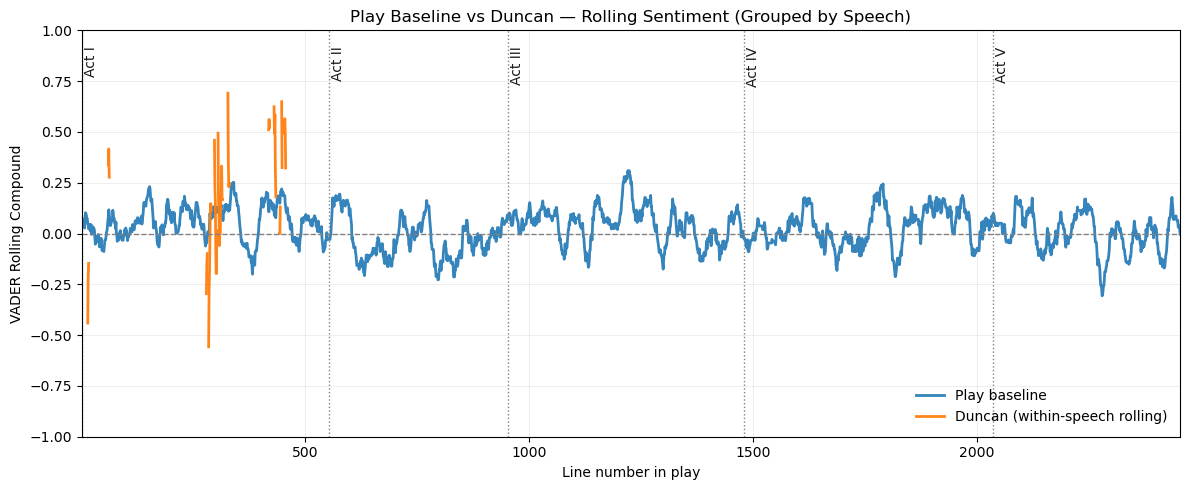

In [348]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in duncan_only_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Duncan (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Duncan — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Witch 1's Lines and Emotional Arc Via VADER

In [349]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_WITCHES.1.html"

In [350]:
response = requests.get(url)

In [351]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nWhen shall we three meet again?<br/>\r\nIn thunder, lightning, or in rain?<br/>\r\nWhere the place?<br/>\r\nI come, Graymalkin.<br/>\r\nFair is foul, and foul is fair;<br/>\r\nHover through the fog and filthy air.<br/>\r\nWhere hast thou been, sister?<br/>\r\nA sailor’s wife had chestnuts in her lap<br/>\r\nAnd munched and munched and munched. “Give me,” quoth I.<br/>\r\n“Aroint thee, witch,” the rump-fed runnion cries.<br/>\r\nHer husband’s to Aleppo gone, master o’ th’ Tiger;<br/>\r\nBut in a sieve I’ll thither sail,<br/>\r\nAnd, like a rat without a tail,<br/>\r\nI’ll do, I’ll do, and I’ll do.<br/>\r\nTh’ art kind.<br/>\r\nI myself have all the other,<br/>\r\nAnd the very ports they blow;<br/>\r\nAll the quarters that they know<br/>\r\nI’ th’ shipman’s card.<br/>\r\nI’ll drain him dry as hay.<br/>\r\nSleep shall neither night nor day<br/>\r\nHang upon his penthouse lid.<br/>\r\nHe shall live a man forbid.<b

In [352]:
witch_one_soup = BS(response.text, "html.parser")

In [353]:
witch_one_lines = witch_one_soup.get_text()

In [354]:
witch_one_lines = witch_one_lines.splitlines()

In [355]:
witch_one_lines = [ln.strip() for ln in witch_one_lines if ln.strip()]

In [356]:
first_witch_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(witch_one_lines)].copy()

In [357]:
first_witch_lines_df = first_witch_lines_df.reset_index(drop=True)

In [358]:
first_witch_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [359]:
first_witch_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [360]:
first_witch_lines_df = first_witch_lines_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [361]:
first_witch_lines_df.head()

line_number                                text  act  scene  scene_id  \
0            1     When shall we three meet again?    1      1         1   
1            2  In thunder, lightning, or in rain?    1      1         1   
2            6                    Where the place?    1      1         1   
3            9                 I come, Graymalkin.    1      1         1   
4           12     Fair is foul, and foul is fair;    1      1         1   

        act_scene  neg    neu    pos  compound vader_label  
0  Act 1, Scene 1  0.0  1.000  0.000    0.0000         neu  
1  Act 1, Scene 1  0.0  1.000  0.000    0.0000         neu  
2  Act 1, Scene 1  0.0  1.000  0.000    0.0000         neu  
3  Act 1, Scene 1  0.0  1.000  0.000    0.0000         neu  
4  Act 1, Scene 1  0.0  0.521  0.479    0.5574         pos

In [362]:
first_witch_lines_df['rolling_compound'] = (
    first_witch_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [363]:
first_witch_lines_df['rolling_intensity']=(
    first_witch_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [364]:
first_witch_lines_df['rolling_volatility'] = (
    first_witch_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [365]:
first_witch_lines_df['speech_id'] = (first_witch_lines_df['line_number'].diff().gt(1)).cumsum()

In [366]:
first_witch_lines_df['weighted_compound'] = (
    first_witch_lines_df['compound'] * first_witch_lines_df['compound'].abs()
)

In [367]:
first_witch_lines_df['rolling_weighted'] = (
    first_witch_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [368]:
first_witch_lines_df['is_pos'] = (first_witch_lines_df['vader_label']=='pos').astype(int)

In [369]:
first_witch_lines_df['is_neg'] = (first_witch_lines_df['vader_label']=='neg').astype(int)

In [370]:
first_witch_lines_df['roll_pos_minus_neg'] = (
    first_witch_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - first_witch_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [371]:
sentiment_difference = first_witch_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [372]:
first_witch_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [373]:
first_witch_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [374]:
first_witch_lines_df['rolling_within_speech'] = (
     first_witch_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [375]:
first_witch_lines_df.insert(1, 'speaker', 'First Witch')

In [376]:
first_witch_lines_df.head(1)

line_number      speaker                             text  act  scene  \
0            1  First Witch  When shall we three meet again?    1      1   

   scene_id       act_scene  neg  neu  pos  ...  rolling_volatility speech_id  \
0         1  Act 1, Scene 1  0.0  1.0  0.0  ...                 0.0         0   

   weighted_compound  rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  \
0                0.0          0.051782       0       0            0.166667   

   diff_vs_play_w21  diff_vs_play_w11  rolling_within_speech  
0          0.061991          0.036233                    0.0  

[1 rows x 24 columns]

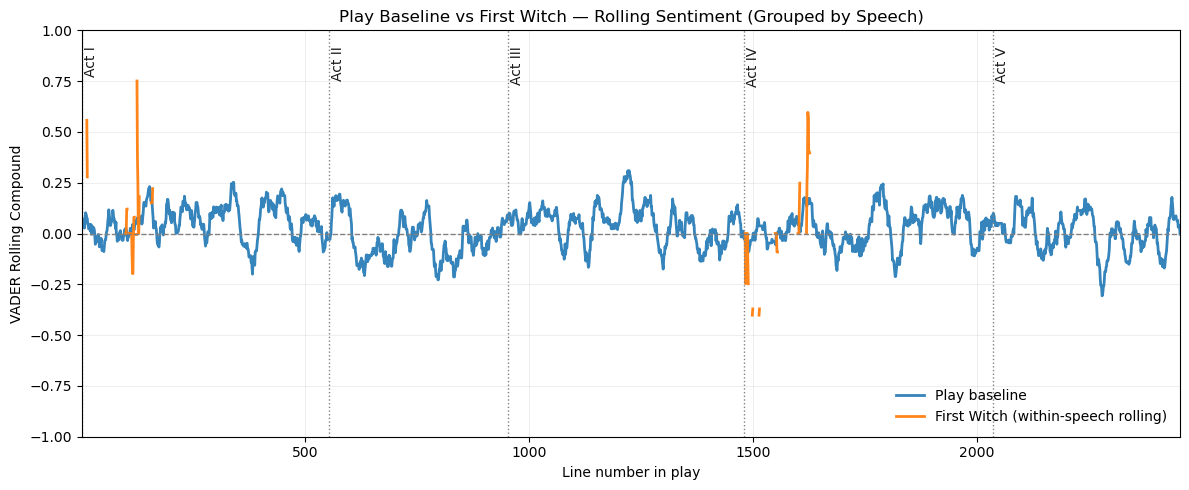

In [377]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in first_witch_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='First Witch (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs First Witch — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### The Porter's Lines and Emotional Arc Via VADER

In [378]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Porter.html"

In [379]:
response = requests.get(url)

In [380]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nHere’s a knocking indeed! If a man were<br/>\r\nporter of hell gate, he should have old turning the<br/>\r\nkey. Knock, knock, knock! Who’s there, i’<br/>\r\nth’ name of Beelzebub? Here’s a farmer that hanged<br/>\r\nhimself on th’ expectation of plenty. Come in time!<br/>\r\nHave napkins enough about you; here you’ll sweat<br/>\r\nfor ’t. Knock, knock! Who’s there, in th’<br/>\r\nother devil’s name? Faith, here’s an equivocator<br/>\r\nthat could swear in both the scales against either<br/>\r\nscale, who committed treason enough for God’s<br/>\r\nsake yet could not equivocate to heaven. O, come in,<br/>\r\nequivocator. Knock, knock, knock! Who’s<br/>\r\nthere? Faith, here’s an English tailor come hither for<br/>\r\nstealing out of a French hose. Come in, tailor. Here<br/>\r\nyou may roast your goose. Knock, knock!<br/>\r\nNever at quiet.—What are you?—But this place is<br/>\r\ntoo cold for hell. I’ll devil-po

In [381]:
porter_soup = BS(response.text, "html.parser")

In [382]:
porter_lines = porter_soup.get_text()

In [383]:
porter_lines = porter_lines.splitlines()

In [384]:
porter_lines = [ln.strip() for ln in porter_lines if ln.strip()]

In [385]:
porter_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(porter_lines)].copy()

In [386]:
porter_lines_df = porter_lines_df.reset_index(drop=True)

In [387]:
porter_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [388]:
porter_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [389]:
porter_lines_df = porter_lines_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [390]:
porter_lines_df.head()

line_number                                               text  act  scene  \
0          725            Here’s a knocking indeed! If a man were    2      3   
1          726  porter of hell gate, he should have old turnin...    2      3   
2          727          key. Knock, knock, knock! Who’s there, i’    2      3   
3          728  th’ name of Beelzebub? Here’s a farmer that ha...    2      3   
4          729  himself on th’ expectation of plenty. Come in ...    2      3   

   scene_id       act_scene    neg    neu  pos  compound vader_label  
0        10  Act 2, Scene 3  0.000  1.000  0.0    0.0000         neu  
1        10  Act 2, Scene 3  0.338  0.662  0.0   -0.6808         neg  
2        10  Act 2, Scene 3  0.000  1.000  0.0    0.0000         neu  
3        10  Act 2, Scene 3  0.000  1.000  0.0    0.0000         neu  
4        10  Act 2, Scene 3  0.000  1.000  0.0    0.0000         neu

In [391]:
porter_lines_df['rolling_compound'] = (
    porter_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [392]:
porter_lines_df['rolling_intensity']=(
    porter_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [393]:
porter_lines_df['rolling_volatility'] = (
    porter_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [394]:
porter_lines_df['speech_id'] = (porter_lines_df['line_number'].diff().gt(1)).cumsum()

In [395]:
porter_lines_df['weighted_compound'] = (
    porter_lines_df['compound'] * porter_lines_df['compound'].abs()
)

In [396]:
porter_lines_df['rolling_weighted'] = (
    porter_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [397]:
porter_lines_df['is_pos'] = (porter_lines_df['vader_label']=='pos').astype(int)

In [398]:
porter_lines_df['is_neg'] = (porter_lines_df['vader_label']=='neg').astype(int)

In [399]:
porter_lines_df['roll_pos_minus_neg'] = (
    porter_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - porter_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [400]:
sentiment_difference = porter_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [401]:
porter_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [402]:
porter_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [403]:
porter_lines_df['rolling_within_speech'] = (
     porter_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [404]:
porter_lines_df.insert(1, 'speaker', 'Porter')

In [405]:
porter_lines_df.head(1)

line_number speaker                                     text  act  scene  \
0          725  Porter  Here’s a knocking indeed! If a man were    2      3   

   scene_id       act_scene  neg  neu  pos  ...  rolling_volatility speech_id  \
0        10  Act 2, Scene 3  0.0  1.0  0.0  ...             0.39306         0   

   weighted_compound  rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  \
0                0.0         -0.077248       0       0           -0.166667   

   diff_vs_play_w21  diff_vs_play_w11  rolling_within_speech  
0         -0.135405         -0.131394                    0.0  

[1 rows x 24 columns]

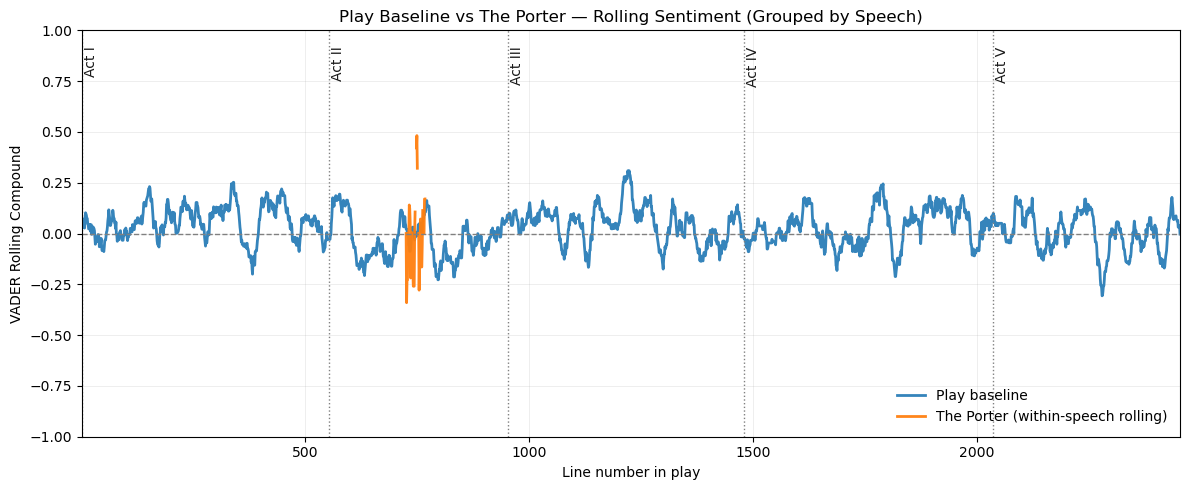

In [406]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in porter_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='The Porter (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs The Porter — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Lady Macduff's Lines and Emotional Arc Via VADER

In [407]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_LadyMacduff.html"

In [408]:
response = requests.get(url)

In [409]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nWhat had he done to make him fly the land?<br/>\r\nHe had none.<br/>\r\nHis flight was madness. When our actions do not,<br/>\r\nOur fears do make us traitors.<br/>\r\nWisdom? To leave his wife, to leave his babes,<br/>\r\nHis mansion and his titles in a place<br/>\r\nFrom whence himself does fly? He loves us not;<br/>\r\nHe wants the natural touch; for the poor wren,<br/>\r\nThe most diminutive of birds, will fight,<br/>\r\nHer young ones in her nest, against the owl.<br/>\r\nAll is the fear, and nothing is the love,<br/>\r\nAs little is the wisdom, where the flight<br/>\r\nSo runs against all reason.<br/>\r\nFathered he is, and yet he’s fatherless.<br/>\r\nSirrah, your father’s dead.<br/>\r\nAnd what will you do now? How will you live?<br/>\r\nWhat, with worms and flies?<br/>\r\nPoor bird, thou ’dst never fear the net nor lime,<br/>\r\nThe pitfall nor the gin.<br/>\r\nYes, he is dead. How wilt thou do for a 

In [410]:
lady_macduff_soup = BS(response.text, "html.parser")

In [411]:
lady_macduff_lines = lady_macduff_soup.get_text()

In [412]:
lady_macduff_lines = lady_macduff_lines.splitlines()

In [413]:
lady_macduff_lines = [ln.strip() for ln in lady_macduff_lines if ln.strip()]

In [414]:
lady_macduff_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(porter_lines)].copy()

In [415]:
lady_macduff_lines_df = lady_macduff_lines_df.reset_index(drop=True)

In [416]:
lady_macduff_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [417]:
lady_macduff_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [418]:
lady_macduff_lines_df = lady_macduff_lines_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [419]:
lady_macduff_lines_df

line_number                                               text  act  \
0           725            Here’s a knocking indeed! If a man were    2   
1           726  porter of hell gate, he should have old turnin...    2   
2           727          key. Knock, knock, knock! Who’s there, i’    2   
3           728  th’ name of Beelzebub? Here’s a farmer that ha...    2   
4           729  himself on th’ expectation of plenty. Come in ...    2   
5           730   Have napkins enough about you; here you’ll sweat    2   
6           731          for ’t. Knock, knock! Who’s there, in th’    2   
7           732   other devil’s name? Faith, here’s an equivocator    2   
8           733  that could swear in both the scales against ei...    2   
9           734      scale, who committed treason enough for God’s    2   
10          735  sake yet could not equivocate to heaven. O, co...    2   
11          736            equivocator. Knock, knock, knock! Who’s    2   
12          737  there? Faith, here’s an English tailor come hi...    2   
13          738  stealing out of a French hose. Come in, tailor...    2   
14          739            you may roast your goose. Knock, knock!    2   
15          740    Never at quiet.—What are you?—But this place is    2   
16          741  too cold for hell. I’ll devil-porter it no fur...    2   
17          742  thought to have let in some of all professions...    2   
18          743       the primrose way to th’ everlasting bonfire.    2   
19          744                                        Anon, anon!    2   
20          745                   I pray you, remember the porter.    2   
21          748      Faith, sir, we were carousing till the second    2   
22          749  cock, and drink, sir, is a great provoker of t...    2   
23          750                                            things.    2   
24          753       Marry, sir, nose-painting, sleep, and urine.    2   
25          754  Lechery, sir, it provokes and unprovokes. It p...    2   
26          755     the desire, but it takes away the performance.    2   
27          756          Therefore much drink may be said to be an    2   
28          757     equivocator with lechery. It makes him, and it    2   
29          758  mars him; it sets him on, and it takes him off...    2   
30          759       persuades him and disheartens him; makes him    2   
31          760  stand to and not stand to; in conclusion, equi...    2   
32          761     him in a sleep and, giving him the lie, leaves    2   
33          762                                               him.    2   
34          764  That it did, sir, i’ th’ very throat on me; but I    2   
35          765  requited him for his lie, and, I think, being too    2   
36          766  strong for him, though he took up my legs some...    2   
37          767                    yet I made a shift to cast him.    2   
38         2425                                               him.    5   

    scene  scene_id       act_scene    neg    neu    pos  compound vader_label  
0       3        10  Act 2, Scene 3  0.000  1.000  0.000    0.0000         neu  
1       3        10  Act 2, Scene 3  0.338  0.662  0.000   -0.6808         neg  
2       3        10  Act 2, Scene 3  0.000  1.000  0.000    0.0000         neu  
3       3        10  Act 2, Scene 3  0.000  1.000  0.000    0.0000         neu  
4       3        10  Act 2, Scene 3  0.000  1.000  0.000    0.0000         neu  
5       3        10  Act 2, Scene 3  0.000  1.000  0.000    0.0000         neu  
6       3        10  Act 2, Scene 3  0.000  1.000  0.000    0.0000         neu  
7       3        10  Act 2, Scene 3  0.000  0.682  0.318    0.4215         pos  
8       3        10  Act 2, Scene 3  0.130  0.870  0.000   -0.0516         neg  
9       3        10  Act 2, Scene 3  0.290  0.500  0.210   -0.2023         neg  
10      3        10  Act 2, Scene 3  0.231  0.769  0.000   -0.4023         neg  
11      3        10  Act 2, Sce

In [420]:
lady_macduff_lines_df['rolling_compound'] = (
    lady_macduff_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [421]:
lady_macduff_lines_df['rolling_intensity']=(
    lady_macduff_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [422]:
lady_macduff_lines_df['rolling_volatility'] = (
    lady_macduff_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [423]:
lady_macduff_lines_df['speech_id'] = (lady_macduff_lines_df['line_number'].diff().gt(1)).cumsum()

In [424]:
lady_macduff_lines_df['weighted_compound'] = (
    lady_macduff_lines_df['compound'] * lady_macduff_lines_df['compound'].abs()
)

In [425]:
lady_macduff_lines_df['rolling_weighted'] = (
    lady_macduff_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [426]:
lady_macduff_lines_df['is_pos'] = (lady_macduff_lines_df['vader_label']=='pos').astype(int)

In [427]:
lady_macduff_lines_df['is_neg'] = (lady_macduff_lines_df['vader_label']=='neg').astype(int)

In [428]:
lady_macduff_lines_df['roll_pos_minus_neg'] = (
    lady_macduff_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - lady_macduff_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [429]:
sentiment_difference = lady_macduff_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [430]:
lady_macduff_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [431]:
lady_macduff_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [432]:
lady_macduff_lines_df['rolling_within_speech'] = (
     lady_macduff_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [433]:
lady_macduff_lines_df.insert(1, 'speaker', 'Lady Macduff')

In [434]:
lady_macduff_lines_df = lady_macduff_lines_df.drop(index=38)

In [435]:
lady_macduff_lines_df

line_number       speaker  \
0           725  Lady Macduff   
1           726  Lady Macduff   
2           727  Lady Macduff   
3           728  Lady Macduff   
4           729  Lady Macduff   
5           730  Lady Macduff   
6           731  Lady Macduff   
7           732  Lady Macduff   
8           733  Lady Macduff   
9           734  Lady Macduff   
10          735  Lady Macduff   
11          736  Lady Macduff   
12          737  Lady Macduff   
13          738  Lady Macduff   
14          739  Lady Macduff   
15          740  Lady Macduff   
16          741  Lady Macduff   
17          742  Lady Macduff   
18          743  Lady Macduff   
19          744  Lady Macduff   
20          745  Lady Macduff   
21          748  Lady Macduff   
22          749  Lady Macduff   
23          750  Lady Macduff   
24          753  Lady Macduff   
25          754  Lady Macduff   
26          755  Lady Macduff   
27          756  Lady Macduff   
28          757  Lady Macduff   
29          758  Lady Macduff   
30          759  Lady Macduff   
31          760  Lady Macduff   
32          761  Lady Macduff   
33          762  Lady Macduff   
34          764  Lady Macduff   
35          765  Lady Macduff   
36          766  Lady Macduff   
37          767  Lady Macduff   

                                                 text  act  scene  scene_id  \
0             Here’s a knocking indeed! If a man were    2      3        10   
1   porter of hell gate, he should have old turnin...    2      3        10   
2           key. Knock, knock, knock! Who’s there, i’    2      3        10   
3   th’ name of Beelzebub? Here’s a farmer that ha...    2      3        10   
4   himself on th’ expectation of plenty. Come in ...    2      3        10   
5    Have napkins enough about you; here you’ll sweat    2      3        10   
6           for ’t. Knock, knock! Who’s there, in th’    2      3        10   
7    other devil’s name? Faith, here’s an equivocator    2      3        10   
8   that could swear in both the scales against ei...    2      3        10   
9       scale, who committed treason enough for God’s    2      3        10   
10  sake yet could not equivocate to heaven. O, co...    2      3        10   
11            equivocator. Knock, knock, knock! Who’s    2      3        10   
12  there? Faith, here’s an English tailor come hi...    2      3        10   
13  stealing out of a French hose. Come in, tailor...    2      3        10   
14            you may roast your goose. Knock, knock!    2      3        10   
15    Never at quiet.—What are you?—But this place is    2      3        10   
16  too cold for hell. I’ll devil-porter it no fur...    2      3        10   
17  thought to have let in some of all professions...    2      3        10   
18       the primrose way to th’ everlasting bonfire.    2      3        10   
19                                        Anon, anon!    2      3        10   
20                   I pray you, remember the porter.    2      3        10   
21      Faith, sir, we were carousing till the second    2      3        10   
22  cock, and drink, sir, is a great provoker of t...    2      3        10   
23                                            things.    2      3        10   
24       Marry, sir, nose-painting, sleep, and urine.    2      3        10   
25  Lechery, sir, it provokes and unprovokes. It p...    2      3        10   
26     the desire, but it takes away the performance.    2      3        10   
27          Therefore much drink may be said to be an    2      3        10   
28     equivocator with lechery. It makes him, and it    2      3        10   
29  mars him; it sets him on, and it takes him off...    2      3        10   
30       persuades him and disheartens him; makes him    2      3        10   
31  stand to and not stand to; in conclusion, equi...    2      3        10   
32     him in a sleep and, giving him the lie, leaves    2      3        10   
33                            

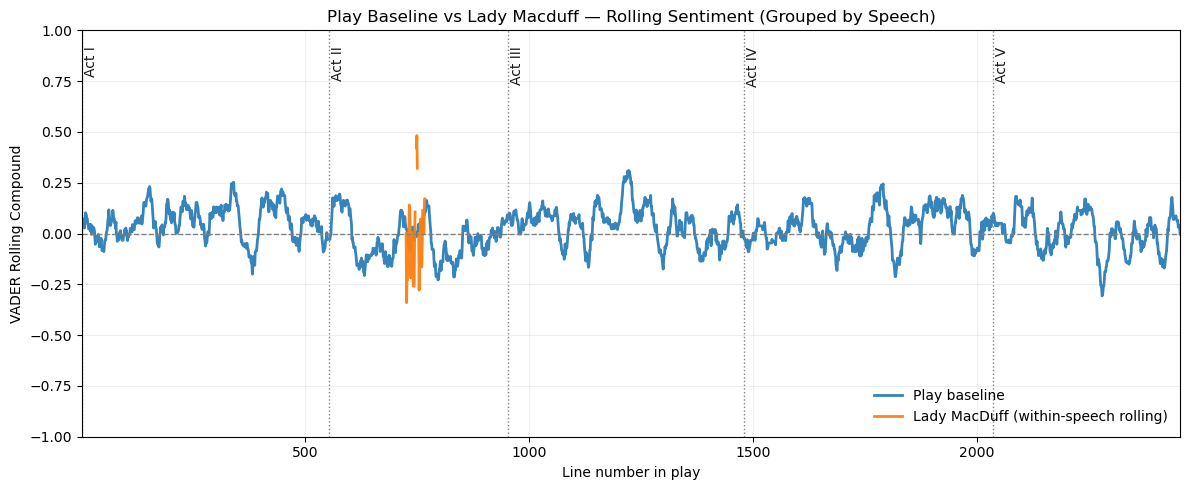

In [436]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in lady_macduff_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Lady MacDuff (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Lady Macduff — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Doctor's Lines & Emotional Arc VIA VADER

In [437]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Doctor1.html"

In [438]:
response = requests.get(url)

In [439]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nAy, sir. There are a crew of wretched souls<br/>\r\nThat stay his cure. Their malady convinces<br/>\r\nThe great assay of art, but at his touch<br/>\r\n(Such sanctity hath heaven given his hand)<br/>\r\nThey presently amend.<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [440]:
doctora_soup = BS(response.text, "html.parser")

In [441]:
doctora_lines = doctora_soup.get_text()

In [442]:
doctora_lines = doctora_lines.splitlines()

In [443]:
doctora_lines = [ln.strip() for ln in doctora_lines if ln.strip()]

In [444]:
doctora_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(doctora_lines)].copy()

In [445]:
doctora_lines_df = doctora_lines_df.reset_index(drop=True)

In [446]:
doctora_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [447]:
doctora_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [448]:
doctora_lines_df = doctora_lines_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [449]:
doctora_lines_df.head()

line_number                                         text  act  scene  \
0         1914  Ay, sir. There are a crew of wretched souls    4      3   
1         1915   That stay his cure. Their malady convinces    4      3   
2         1916     The great assay of art, but at his touch    4      3   
3         1917   (Such sanctity hath heaven given his hand)    4      3   
4         1918                        They presently amend.    4      3   

   scene_id       act_scene  neg    neu    pos  compound vader_label  
0        20  Act 4, Scene 3  0.0  1.000  0.000    0.0000         neu  
1        20  Act 4, Scene 3  0.0  0.779  0.221    0.1779         pos  
2        20  Act 4, Scene 3  0.0  0.758  0.242    0.3716         pos  
3        20  Act 4, Scene 3  0.0  0.435  0.565    0.7579         pos  
4        20  Act 4, Scene 3  0.0  1.000  0.000    0.0000         neu

In [450]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Doctor2.html"

In [451]:
response = requests.get(url)

In [452]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nI have two nights watched with you but can<br/>\r\nperceive no truth in your report. When was it she<br/>\r\nlast walked?<br/>\r\nA great perturbation in nature, to receive at<br/>\r\nonce the benefit of sleep and do the effects of<br/>\r\nwatching. In this slumb’ry agitation, besides her<br/>\r\nwalking and other actual performances, what at any<br/>\r\ntime have you heard her say?<br/>\r\nYou may to me, and ’tis most meet you<br/>\r\nshould.<br/>\r\nHow came she by that light?<br/>\r\nYou see her eyes are open.<br/>\r\nWhat is it she does now? Look how she rubs<br/>\r\nher hands.<br/>\r\nHark, she speaks. I will set down what comes<br/>\r\nfrom her, to satisfy my remembrance the more<br/>\r\nstrongly.<br/>\r\nDo you mark that?<br/>\r\nGo to, go to. You have known what you should<br/>\r\nnot.<br/>\r\nWhat a sigh is there! The heart is sorely<br/>\r\ncharged.<br/>\r\nWell, well, well.<br/>\r\nThis disease is b

In [453]:
doctorb_soup = BS(response.text, "html.parser")

In [454]:
doctorb_lines = doctorb_soup.get_text()

In [455]:
doctorb_lines = doctorb_lines.splitlines()

In [456]:
doctorb_lines = [ln.strip() for ln in doctorb_lines if ln.strip()]

In [457]:
doctorb_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(doctorb_lines)].copy()

In [458]:
doctorb_lines_df = doctorb_lines_df.reset_index(drop=True)

In [459]:
doctorb_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [460]:
doctorb_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [461]:
doctorb_lines_df = doctorb_lines_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [462]:
doctorb_lines_df.head()

line_number                                               text  act  scene  \
0         2036         I have two nights watched with you but can    5      1   
1         2037  perceive no truth in your report. When was it she    5      1   
2         2038                                       last walked?    5      1   
3         2045      A great perturbation in nature, to receive at    5      1   
4         2046    once the benefit of sleep and do the effects of    5      1   

   scene_id       act_scene    neg    neu    pos  compound vader_label  
0        21  Act 5, Scene 1  0.000  1.000  0.000    0.0000         neu  
1        21  Act 5, Scene 1  0.179  0.821  0.000   -0.2411         neg  
2        21  Act 5, Scene 1  0.000  1.000  0.000    0.0000         neu  
3        21  Act 5, Scene 1  0.000  0.631  0.369    0.6249         pos  
4        21  Act 5, Scene 1  0.000  0.750  0.250    0.4588         pos

In [463]:
doctor_lines_df = pd.concat([doctora_lines_df, doctorb_lines_df], ignore_index=True)

In [464]:
doctor_lines_df.head()

line_number                                         text  act  scene  \
0         1914  Ay, sir. There are a crew of wretched souls    4      3   
1         1915   That stay his cure. Their malady convinces    4      3   
2         1916     The great assay of art, but at his touch    4      3   
3         1917   (Such sanctity hath heaven given his hand)    4      3   
4         1918                        They presently amend.    4      3   

   scene_id       act_scene  neg    neu    pos  compound vader_label  
0        20  Act 4, Scene 3  0.0  1.000  0.000    0.0000         neu  
1        20  Act 4, Scene 3  0.0  0.779  0.221    0.1779         pos  
2        20  Act 4, Scene 3  0.0  0.758  0.242    0.3716         pos  
3        20  Act 4, Scene 3  0.0  0.435  0.565    0.7579         pos  
4        20  Act 4, Scene 3  0.0  1.000  0.000    0.0000         neu

In [465]:
doctor_lines_df['rolling_compound'] = (
    doctor_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [466]:
doctor_lines_df['rolling_intensity']=(
    doctor_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [467]:
doctor_lines_df['rolling_volatility'] = (
    doctor_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [468]:
doctor_lines_df['speech_id'] = (doctor_lines_df['line_number'].diff().gt(1)).cumsum()

In [469]:
doctor_lines_df['weighted_compound'] = (
    doctor_lines_df['compound'] * doctor_lines_df['compound'].abs()
)

In [470]:
doctor_lines_df['rolling_weighted'] = (
    doctor_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [471]:
doctor_lines_df['is_pos'] = (doctor_lines_df['vader_label']=='pos').astype(int)

In [472]:
doctor_lines_df['is_neg'] = (doctor_lines_df['vader_label']=='neg').astype(int)

In [473]:
doctor_lines_df['roll_pos_minus_neg'] = (
    doctor_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - doctor_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [474]:
sentiment_difference = doctor_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [475]:
doctor_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [476]:
doctor_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [477]:
doctor_lines_df['rolling_within_speech'] = (
     doctor_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [478]:
doctor_lines_df.insert(1, 'speaker', 'Doctor')

In [479]:
doctor_lines_df.head(1)

line_number speaker                                         text  act  \
0         1914  Doctor  Ay, sir. There are a crew of wretched souls    4   

   scene  scene_id       act_scene  neg  neu  pos  ...  rolling_volatility  \
0      3        20  Act 4, Scene 3  0.0  1.0  0.0  ...            0.185856   

  speech_id  weighted_compound  rolling_weighted  is_pos  is_neg  \
0         0                0.0          0.124025       0       0   

   roll_pos_minus_neg  diff_vs_play_w21  diff_vs_play_w11  \
0                 0.5          0.070038         -0.018073   

   rolling_within_speech  
0                    0.0  

[1 rows x 24 columns]

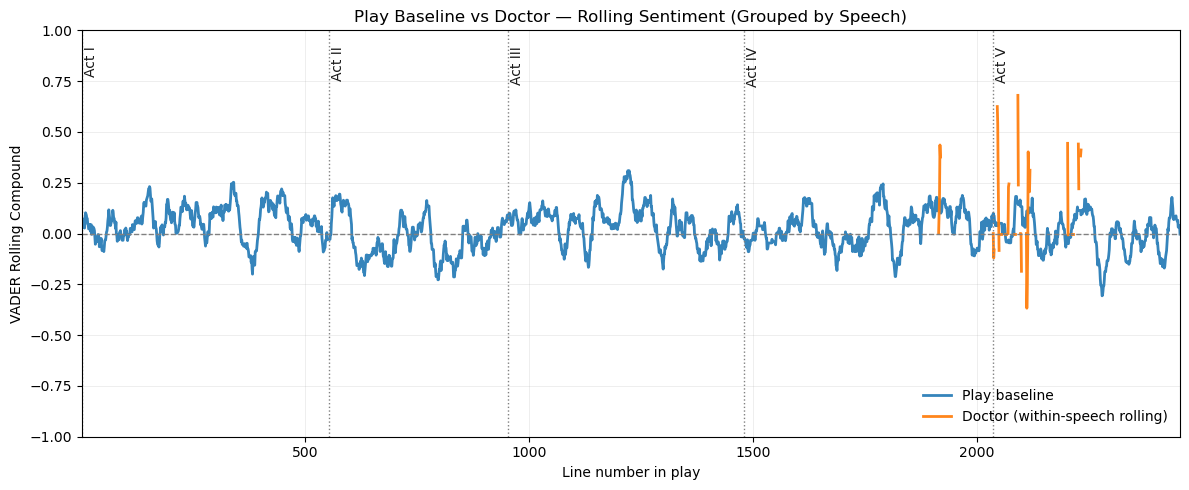

In [480]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in doctor_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Doctor (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Doctor — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Hecate's Lines & Emotional Arc Via VADER

In [481]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Hecate.html"

In [482]:
response = requests.get(url)

In [483]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nHave I not reason, beldams as you are?<br/>\r\nSaucy and overbold, how did you dare<br/>\r\nTo trade and traffic with Macbeth<br/>\r\nIn riddles and affairs of death,<br/>\r\nAnd I, the mistress of your charms,<br/>\r\nThe close contriver of all harms,<br/>\r\nWas never called to bear my part<br/>\r\nOr show the glory of our art?<br/>\r\nAnd which is worse, all you have done<br/>\r\nHath been but for a wayward son,<br/>\r\nSpiteful and wrathful, who, as others do,<br/>\r\nLoves for his own ends, not for you.<br/>\r\nBut make amends now. Get you gone,<br/>\r\nAnd at the pit of Acheron<br/>\r\nMeet me i’ th’ morning. Thither he<br/>\r\nWill come to know his destiny.<br/>\r\nYour vessels and your spells provide,<br/>\r\nYour charms and everything beside.<br/>\r\nI am for th’ air. This night I’ll spend<br/>\r\nUnto a dismal and a fatal end.<br/>\r\nGreat business must be wrought ere noon.<br/>\r\nUpon the corner o

In [484]:
hecate_soup = BS(response.text, "html.parser")

In [485]:
hecate_lines = hecate_soup.get_text()

In [486]:
hecate_lines = hecate_lines.splitlines()

In [487]:
hecate_lines = [ln.strip() for ln in hecate_lines if ln.strip()]

In [488]:
hecate_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(hecate_lines)].copy()

In [489]:
hecate_lines_df = hecate_lines_df.reset_index(drop=True)

In [490]:
hecate_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [491]:
hecate_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [492]:
hecate_lines_df = hecate_lines_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [493]:
hecate_lines_df.head()

line_number                                    text  act  scene  scene_id  \
0         1388  Have I not reason, beldams as you are?    3      5        16   
1         1389    Saucy and overbold, how did you dare    3      5        16   
2         1390       To trade and traffic with Macbeth    3      5        16   
3         1391        In riddles and affairs of death,    3      5        16   
4         1392     And I, the mistress of your charms,    3      5        16   

        act_scene    neg    neu    pos  compound vader_label  
0  Act 3, Scene 5  0.000  1.000  0.000    0.0000         neu  
1  Act 3, Scene 5  0.000  1.000  0.000    0.0000         neu  
2  Act 3, Scene 5  0.000  1.000  0.000    0.0000         neu  
3  Act 3, Scene 5  0.438  0.562  0.000   -0.5994         neg  
4  Act 3, Scene 5  0.000  0.674  0.326    0.4404         pos

In [494]:
hecate_lines_df['rolling_compound'] = (
    hecate_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [495]:
hecate_lines_df['rolling_intensity']=(
    hecate_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [496]:
hecate_lines_df['rolling_volatility'] = (
    hecate_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [497]:
hecate_lines_df['speech_id'] = (hecate_lines_df['line_number'].diff().gt(1)).cumsum()

In [498]:
hecate_lines_df['weighted_compound'] = (
    hecate_lines_df['compound'] * hecate_lines_df['compound'].abs()
)

In [499]:
hecate_lines_df['rolling_weighted'] = (
    hecate_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [500]:
hecate_lines_df['is_pos'] = (hecate_lines_df['vader_label']=='pos').astype(int)

In [501]:
hecate_lines_df['is_neg'] = (hecate_lines_df['vader_label']=='neg').astype(int)

In [502]:
hecate_lines_df['roll_pos_minus_neg'] = (
    hecate_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - hecate_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [503]:
sentiment_difference = hecate_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [504]:
hecate_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [505]:
hecate_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [506]:
hecate_lines_df['rolling_within_speech'] = (
     hecate_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [507]:
hecate_lines_df.insert(1, 'speaker', 'Hecate')

In [508]:
hecate_lines_df.head(1)

line_number speaker                                    text  act  scene  \
0         1388  Hecate  Have I not reason, beldams as you are?    3      5   

   scene_id       act_scene  neg  neu  pos  ...  rolling_volatility speech_id  \
0        16  Act 3, Scene 5  0.0  1.0  0.0  ...                 0.0         0   

   weighted_compound  rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  \
0                0.0         -0.068211       0       0           -0.166667   

   diff_vs_play_w21  diff_vs_play_w11  rolling_within_speech  
0          0.025783          0.088565                    0.0  

[1 rows x 24 columns]

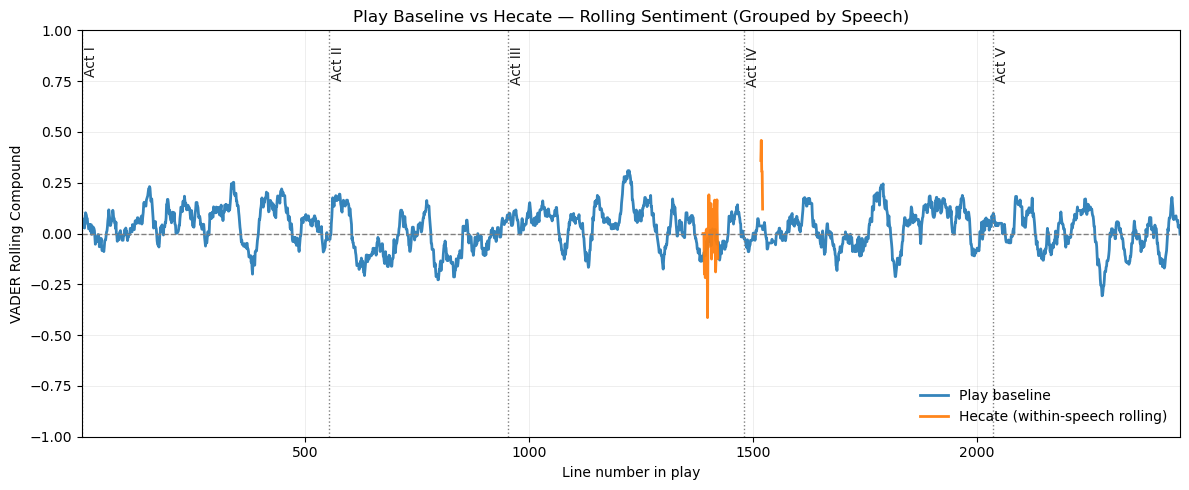

In [509]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in hecate_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Hecate (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Hecate — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Third Witch Lines & Emotional Arc Via VADER

In [510]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_WITCHES.3.html"

In [511]:
response = requests.get(url)

In [512]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nThat will be ere the set of sun.<br/>\r\nThere to meet with Macbeth.<br/>\r\nAnon.<br/>\r\nFair is foul, and foul is fair;<br/>\r\nHover through the fog and filthy air.<br/>\r\nSister, where thou?<br/>\r\nAnd I another.<br/>\r\nA drum, a drum!<br/>\r\nMacbeth doth come.<br/>\r\nThe Weïrd Sisters, hand in hand,<br/>\r\nPosters of the sea and land,<br/>\r\nThus do go about, about,<br/>\r\nThrice to thine and thrice to mine<br/>\r\nAnd thrice again, to make up nine.<br/>\r\nPeace, the charm’s wound up.<br/>\r\nAll hail, Macbeth, that shalt be king hereafter!<br/>\r\nHail!<br/>\r\nThou shalt get kings, though thou be none.<br/>\r\nSo all hail, Macbeth and Banquo!<br/>\r\nHarpier cries “’Tis time, ’tis time!”<br/>\r\nDouble, double toil and trouble;<br/>\r\nFire burn, and cauldron bubble.<br/>\r\nDouble, double toil and trouble;<br/>\r\nFire burn, and cauldron bubble.<br/>\r\nScale of dragon, tooth of wolf,<br/>\r\

In [513]:
third_witch_soup = BS(response.text, "html.parser")

In [514]:
third_witch_lines = third_witch_soup.get_text()

In [515]:
third_witch_lines = third_witch_lines.splitlines()

In [516]:
third_witch_lines = [ln.strip() for ln in third_witch_lines if ln.strip()]

In [517]:
third_witch_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(third_witch_lines)].copy()

In [518]:
third_witch_lines_df = third_witch_lines_df.reset_index(drop=True)

In [519]:
third_witch_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [520]:
third_witch_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [521]:
third_witch_lines_df = third_witch_lines_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [522]:
third_witch_lines_df.head()

line_number                                   text  act  scene  scene_id  \
0            5       That will be ere the set of sun.    1      1         1   
1            8            There to meet with Macbeth.    1      1         1   
2           11                                  Anon.    1      1         1   
3           12        Fair is foul, and foul is fair;    1      1         1   
4           13  Hover through the fog and filthy air.    1      1         1   

        act_scene  neg    neu    pos  compound vader_label  
0  Act 1, Scene 1  0.0  1.000  0.000    0.0000         neu  
1  Act 1, Scene 1  0.0  1.000  0.000    0.0000         neu  
2  Act 1, Scene 1  0.0  1.000  0.000    0.0000         neu  
3  Act 1, Scene 1  0.0  0.521  0.479    0.5574         pos  
4  Act 1, Scene 1  0.0  1.000  0.000    0.0000         neu

In [523]:
third_witch_lines_df['rolling_compound'] = (
    third_witch_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [524]:
third_witch_lines_df['rolling_intensity']=(
    third_witch_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [525]:
third_witch_lines_df['rolling_volatility'] = (
    third_witch_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [526]:
third_witch_lines_df['speech_id'] = (third_witch_lines_df['line_number'].diff().gt(1)).cumsum()

In [527]:
third_witch_lines_df['weighted_compound'] = (
    third_witch_lines_df['compound'] * third_witch_lines_df['compound'].abs()
)

In [528]:
third_witch_lines_df['rolling_weighted'] = (
    third_witch_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [529]:
third_witch_lines_df['is_pos'] = (third_witch_lines_df['vader_label']=='pos').astype(int)

In [530]:
third_witch_lines_df['is_neg'] = (third_witch_lines_df['vader_label']=='neg').astype(int)

In [531]:
third_witch_lines_df['roll_pos_minus_neg'] = (
    third_witch_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - third_witch_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [532]:
sentiment_difference = third_witch_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [533]:
third_witch_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [534]:
third_witch_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [535]:
third_witch_lines_df['rolling_within_speech'] = (
     third_witch_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [536]:
third_witch_lines_df.insert(1, 'speaker', 'Third Witch')

In [537]:
third_witch_lines_df.head(1)

line_number      speaker                              text  act  scene  \
0            5  Third Witch  That will be ere the set of sun.    1      1   

   scene_id       act_scene  neg  neu  pos  ...  rolling_volatility speech_id  \
0         1  Act 1, Scene 1  0.0  1.0  0.0  ...                 0.0         0   

   weighted_compound  rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  \
0                0.0          0.051782       0       0            0.166667   

   diff_vs_play_w21  diff_vs_play_w11  rolling_within_speech  
0          0.062433            0.0589                    0.0  

[1 rows x 24 columns]

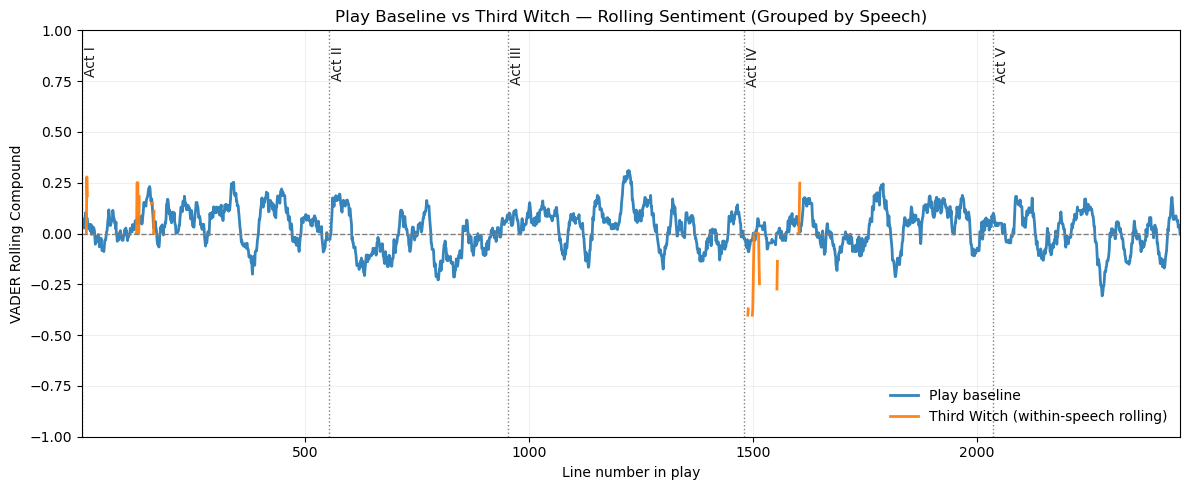

In [538]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in third_witch_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Third Witch (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Third Witch — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Second Witch Lines and Emotional Arc Via VADER

In [539]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_WITCHES.2.html"

In [540]:
response = requests.get(url)

In [541]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nWhen the hurly-burly’s done,<br/>\r\nWhen the battle’s lost and won.<br/>\r\nUpon the heath.<br/>\r\nPaddock calls.<br/>\r\nFair is foul, and foul is fair;<br/>\r\nHover through the fog and filthy air.<br/>\r\nKilling swine.<br/>\r\nI’ll give thee a wind.<br/>\r\nShow me, show me.<br/>\r\nThe Weïrd Sisters, hand in hand,<br/>\r\nPosters of the sea and land,<br/>\r\nThus do go about, about,<br/>\r\nThrice to thine and thrice to mine<br/>\r\nAnd thrice again, to make up nine.<br/>\r\nPeace, the charm’s wound up.<br/>\r\nAll hail, Macbeth! Hail to thee, Thane of Cawdor!<br/>\r\nHail!<br/>\r\nNot so happy, yet much happier.<br/>\r\nThrice, and once the hedge-pig whined.<br/>\r\nDouble, double toil and trouble;<br/>\r\nFire burn, and cauldron bubble.<br/>\r\nFillet of a fenny snake<br/>\r\nIn the cauldron boil and bake.<br/>\r\nEye of newt and toe of frog,<br/>\r\nWool of bat and tongue of dog,<br/>\r\nAdder’s fork

In [542]:
second_witch_soup = BS(response.text, "html.parser")

In [543]:
second_witch_lines = second_witch_soup.get_text()

In [544]:
second_witch_lines = second_witch_lines.splitlines()

In [545]:
second_witch_lines = [ln.strip() for ln in second_witch_lines if ln.strip()]

In [546]:
second_witch_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(second_witch_lines)].copy()

In [547]:
second_witch_lines_df = second_witch_lines_df.reset_index(drop=True)

In [548]:
second_witch_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [549]:
second_witch_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [550]:
second_witch_lines_df = second_witch_lines_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [551]:
second_witch_lines_df.head()

line_number                             text  act  scene  scene_id  \
0            3     When the hurly-burly’s done,    1      1         1   
1            4  When the battle’s lost and won.    1      1         1   
2            7                  Upon the heath.    1      1         1   
3           10                   Paddock calls.    1      1         1   
4           12  Fair is foul, and foul is fair;    1      1         1   

        act_scene   neg    neu    pos  compound vader_label  
0  Act 1, Scene 1  0.00  1.000  0.000    0.0000         neu  
1  Act 1, Scene 1  0.23  0.400  0.370    0.3400         pos  
2  Act 1, Scene 1  0.00  1.000  0.000    0.0000         neu  
3  Act 1, Scene 1  0.00  1.000  0.000    0.0000         neu  
4  Act 1, Scene 1  0.00  0.521  0.479    0.5574         pos

In [552]:
second_witch_lines_df['rolling_compound'] = (
    second_witch_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [553]:
second_witch_lines_df['rolling_intensity']=(
    second_witch_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [554]:
second_witch_lines_df['rolling_volatility'] = (
    second_witch_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [555]:
second_witch_lines_df['speech_id'] = (second_witch_lines_df['line_number'].diff().gt(1)).cumsum()

In [556]:
second_witch_lines_df['weighted_compound'] = (
    second_witch_lines_df['compound'] * second_witch_lines_df['compound'].abs()
)

In [557]:
second_witch_lines_df['rolling_weighted'] = (
    second_witch_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [558]:
second_witch_lines_df['is_pos'] = (second_witch_lines_df['vader_label']=='pos').astype(int)

In [559]:
second_witch_lines_df['is_neg'] = (second_witch_lines_df['vader_label']=='neg').astype(int)

In [560]:
second_witch_lines_df['roll_pos_minus_neg'] = (
    second_witch_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - second_witch_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [561]:
sentiment_difference = second_witch_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [562]:
second_witch_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [563]:
second_witch_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [564]:
second_witch_lines_df['rolling_within_speech'] = (
     second_witch_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [565]:
second_witch_lines_df.insert(1, 'speaker', 'Second Witch')

In [566]:
second_witch_lines_df.head(1)

line_number       speaker                          text  act  scene  \
0            3  Second Witch  When the hurly-burly’s done,    1      1   

   scene_id       act_scene  neg  neu  pos  ...  rolling_volatility speech_id  \
0         1  Act 1, Scene 1  0.0  1.0  0.0  ...            0.196299         0   

   weighted_compound  rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  \
0                0.0          0.071049       0       0            0.333333   

   diff_vs_play_w21  diff_vs_play_w11  rolling_within_speech  
0          0.080536          0.107067                    0.0  

[1 rows x 24 columns]

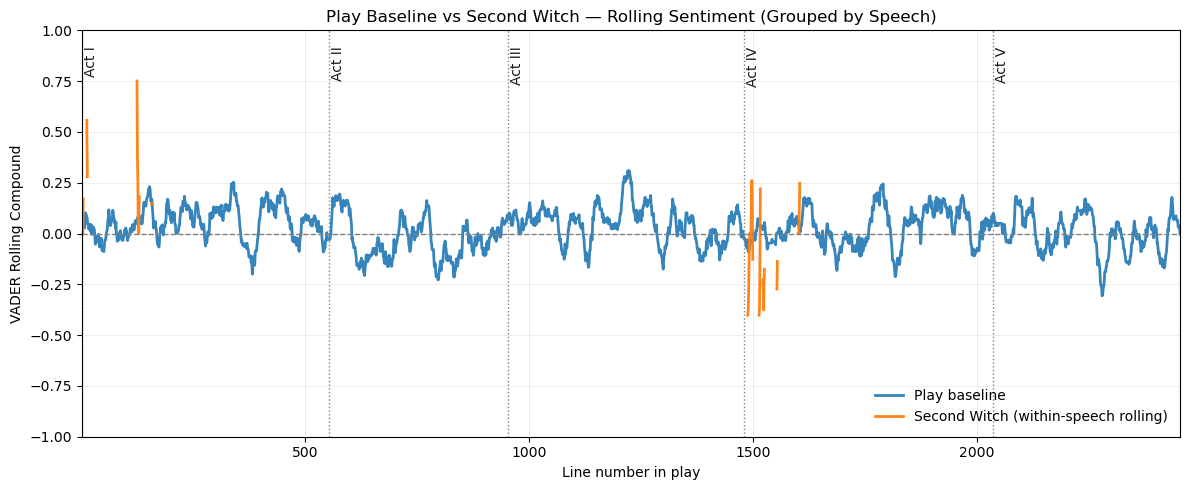

In [567]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in second_witch_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Second Witch (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Second Witch — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Captain Lines & Emotional Arc Via VADER

In [568]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_SOLDIERS.Captain.html"

In [569]:
response = requests.get(url)

In [570]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nDoubtful it stood,<br/>\r\nAs two spent swimmers that do cling together<br/>\r\nAnd choke their art. The merciless Macdonwald<br/>\r\n(Worthy to be a rebel, for to that<br/>\r\nThe multiplying villainies of nature<br/>\r\nDo swarm upon him) from the Western Isles<br/>\r\nOf kerns and gallowglasses is supplied;<br/>\r\nAnd Fortune, on his damnèd quarrel smiling,<br/>\r\nShowed like a rebel’s whore. But all’s too weak;<br/>\r\nFor brave Macbeth (well he deserves that name),<br/>\r\nDisdaining Fortune, with his brandished steel,<br/>\r\nWhich smoked with bloody execution,<br/>\r\nLike Valor’s minion, carved out his passage<br/>\r\nTill he faced the slave;<br/>\r\nWhich ne’er shook hands, nor bade farewell to him,<br/>\r\nTill he unseamed him from the nave to th’ chops,<br/>\r\nAnd fixed his head upon our battlements.<br/>\r\nAs whence the sun ’gins his reflection<br/>\r\nShipwracking storms and direful thunders b

In [571]:
captain_soup = BS(response.text, "html.parser")

In [572]:
captain_lines = captain_soup.get_text()

In [573]:
captain_lines = captain_lines.splitlines()

In [574]:
captain_lines = [ln.strip() for ln in captain_lines if ln.strip()]

In [575]:
captain_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(captain_lines)].copy()

In [576]:
captain_lines_df = captain_lines_df.reset_index(drop=True)

In [577]:
captain_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [578]:
captain_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [579]:
captain_lines_df = captain_lines_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [580]:
captain_lines_df.head()

line_number                                           text  act  scene  \
0           22                             Doubtful it stood,    1      2   
1           23   As two spent swimmers that do cling together    1      2   
2           24  And choke their art. The merciless Macdonwald    1      2   
3           25             (Worthy to be a rebel, for to that    1      2   
4           26           The multiplying villainies of nature    1      2   

   scene_id       act_scene    neg    neu    pos  compound vader_label  
0         2  Act 1, Scene 2  0.545  0.455  0.000   -0.3400         neg  
1         2  Act 1, Scene 2  0.000  1.000  0.000    0.0000         neu  
2         2  Act 1, Scene 2  0.368  0.632  0.000   -0.5423         neg  
3         2  Act 1, Scene 2  0.152  0.571  0.276    0.3182         pos  
4         2  Act 1, Scene 2  0.452  0.548  0.000   -0.5106         neg

In [581]:
captain_lines_df['rolling_compound'] = (
    captain_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [582]:
captain_lines_df['rolling_intensity']=(
    captain_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [583]:
captain_lines_df['rolling_volatility'] = (
    captain_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [584]:
captain_lines_df['speech_id'] = (captain_lines_df['line_number'].diff().gt(1)).cumsum()

In [585]:
captain_lines_df['weighted_compound'] = (
    captain_lines_df['compound'] * captain_lines_df['compound'].abs()
)

In [586]:
captain_lines_df['rolling_weighted'] = (
    captain_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [587]:
captain_lines_df['is_pos'] = (captain_lines_df['vader_label']=='pos').astype(int)

In [588]:
captain_lines_df['is_neg'] = (captain_lines_df['vader_label']=='neg').astype(int)

In [589]:
captain_lines_df['roll_pos_minus_neg'] = (
    captain_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - captain_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [590]:
sentiment_difference = captain_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [591]:
captain_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [592]:
captain_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [593]:
captain_lines_df['rolling_within_speech'] = (
     captain_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [594]:
captain_lines_df.insert(1, 'speaker', 'Captain')

In [595]:
captain_lines_df.head(1)

line_number  speaker                text  act  scene  scene_id  \
0           22  Captain  Doubtful it stood,    1      2         2   

        act_scene    neg    neu  pos  ...  rolling_volatility speech_id  \
0  Act 1, Scene 2  0.545  0.455  0.0  ...            0.274048         0   

   weighted_compound  rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  \
0            -0.1156         -0.094858       0       1           -0.333333   

   diff_vs_play_w21  diff_vs_play_w11  rolling_within_speech  
0         -0.222388         -0.211662                  -0.34  

[1 rows x 24 columns]

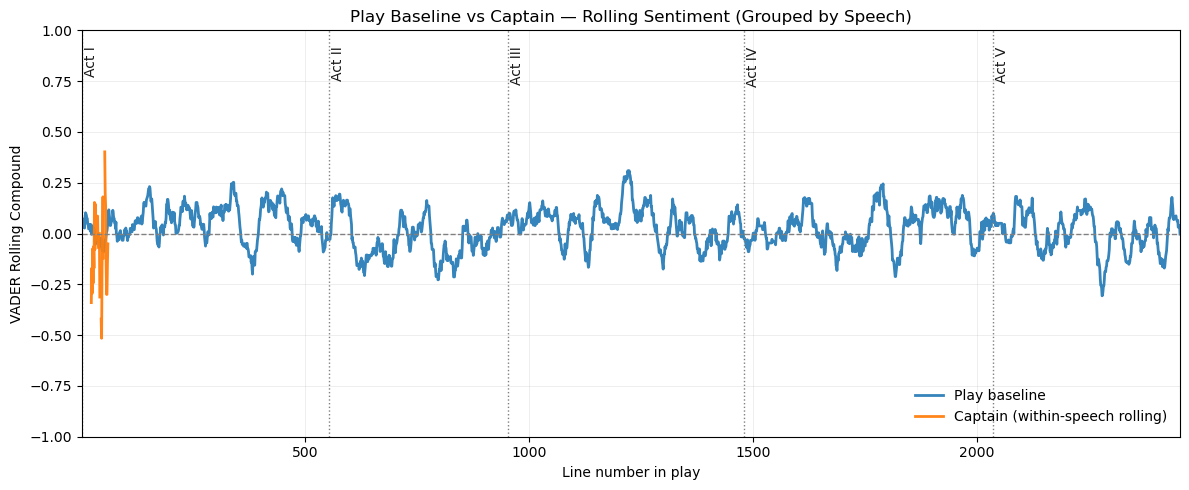

In [596]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in captain_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Captain (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Captain — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Siward's Lines and VADER Analysis

In [597]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Siward.html"

In [598]:
response = requests.get(url)

In [599]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nWhat wood is this before us?<br/>\r\nWe learn no other but the confident tyrant<br/>\r\nKeeps still in Dunsinane and will endure<br/>\r\nOur setting down before ’t.<br/>\r\nThe time approaches<br/>\r\nThat will with due decision make us know<br/>\r\nWhat we shall say we have and what we owe.<br/>\r\nThoughts speculative their unsure hopes relate,<br/>\r\nBut certain issue strokes must arbitrate;<br/>\r\nTowards which, advance the war.<br/>\r\nFare you well.<br/>\r\nDo we but find the tyrant’s power tonight,<br/>\r\nLet us be beaten if we cannot fight.<br/>\r\nThis way, my lord. The castle’s gently rendered.<br/>\r\nThe tyrant’s people on both sides do fight,<br/>\r\nThe noble thanes do bravely in the war,<br/>\r\nThe day almost itself professes yours,<br/>\r\nAnd little is to do.<br/>\r\nEnter, sir, the castle.<br/>\r\nSome must go off; and yet by these I see<br/>\r\nSo great a day as this is cheaply bought.<b

In [600]:
siward_soup = BS(response.text, "html.parser")

In [601]:
siward_lines = siward_soup.get_text()

In [602]:
siward_lines = siward_lines.splitlines()

In [603]:
siward_lines = [ln.strip() for ln in siward_lines if ln.strip()]

In [604]:
siward_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(siward_lines)].copy()

In [605]:
siward_lines_df = siward_lines_df.reset_index(drop=True)

In [606]:
siward_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [607]:
siward_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [608]:
siward_lines_df = siward_lines_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [609]:
siward_lines_df.head()

line_number                                        text  act  scene  \
0         2236                What wood is this before us?    5      4   
1         2243  We learn no other but the confident tyrant    5      4   
2         2244    Keeps still in Dunsinane and will endure    5      4   
3         2245                 Our setting down before ’t.    5      4   
4         2254                         The time approaches    5      4   

   scene_id       act_scene    neg    neu    pos  compound vader_label  
0        24  Act 5, Scene 4  0.000  1.000  0.000    0.0000         neu  
1        24  Act 5, Scene 4  0.134  0.504  0.361    0.5719         pos  
2        24  Act 5, Scene 4  0.000  1.000  0.000    0.0000         neu  
3        24  Act 5, Scene 4  0.000  1.000  0.000    0.0000         neu  
4        24  Act 5, Scene 4  0.000  1.000  0.000    0.0000         neu

In [610]:
siward_lines_df['rolling_compound'] = (
    siward_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [611]:
siward_lines_df['rolling_intensity']=(
    siward_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [612]:
siward_lines_df['rolling_volatility'] = (
    siward_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [613]:
siward_lines_df['speech_id'] = (siward_lines_df['line_number'].diff().gt(1)).cumsum()

In [614]:
siward_lines_df['weighted_compound'] = (
    siward_lines_df['compound'] * siward_lines_df['compound'].abs()
)

In [615]:
siward_lines_df['rolling_weighted'] = (
    siward_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [616]:
siward_lines_df['is_pos'] = (siward_lines_df['vader_label']=='pos').astype(int)

In [617]:
siward_lines_df['is_neg'] = (siward_lines_df['vader_label']=='neg').astype(int)

In [618]:
siward_lines_df['roll_pos_minus_neg'] = (
    siward_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - siward_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [619]:
sentiment_difference = siward_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [620]:
siward_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [621]:
siward_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [622]:
siward_lines_df['rolling_within_speech'] = (
     siward_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [623]:
siward_lines_df.insert(1, 'speaker', 'Siward')

In [624]:
siward_lines_df.head(1)

line_number speaker                          text  act  scene  scene_id  \
0         2236  Siward  What wood is this before us?    5      4        24   

        act_scene  neg  neu  pos  ...  rolling_volatility speech_id  \
0  Act 5, Scene 4  0.0  1.0  0.0  ...            0.330187         0   

   weighted_compound  rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  \
0                0.0          0.054512       0       0            0.166667   

   diff_vs_play_w21  diff_vs_play_w11  rolling_within_speech  
0         -0.022855         -0.052711                    0.0  

[1 rows x 24 columns]

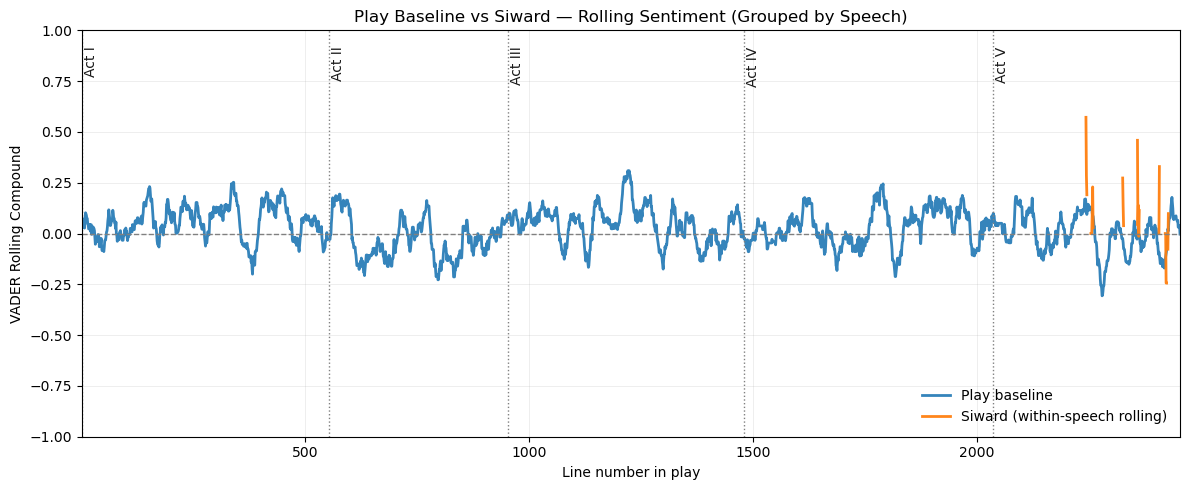

In [625]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in siward_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Siward (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Siward — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### The Gentlewoman's Lines and VADER Analysis

In [626]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Gentlewoman.html"

In [627]:
response = requests.get(url)

In [628]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nSince his Majesty went into the field, I<br/>\r\nhave seen her rise from her bed, throw her nightgown<br/>\r\nupon her, unlock her closet, take forth paper,<br/>\r\nfold it, write upon ’t, read it, afterwards seal it, and<br/>\r\nagain return to bed; yet all this while in a most fast<br/>\r\nsleep.<br/>\r\nThat, sir, which I will not report after<br/>\r\nher.<br/>\r\nNeither to you nor anyone, having no<br/>\r\nwitness to confirm my speech.<br/>\r\nLo you, here she comes. This is her very guise and,<br/>\r\nupon my life, fast asleep. Observe her; stand close.<br/>\r\nWhy, it stood by her. She has light by<br/>\r\nher continually. ’Tis her command.<br/>\r\nAy, but their sense are shut.<br/>\r\nIt is an accustomed action with her to<br/>\r\nseem thus washing her hands. I have known her<br/>\r\ncontinue in this a quarter of an hour.<br/>\r\nShe has spoke what she should not,<br/>\r\nI am sure of that. Heaven know

In [629]:
gentlewoman_soup = BS(response.text, "html.parser")

In [630]:
gentlewoman_lines = gentlewoman_soup.get_text()

In [631]:
gentlewoman_lines = gentlewoman_lines.splitlines()

In [632]:
gentlewoman_lines = [ln.strip() for ln in gentlewoman_lines if ln.strip()]

In [633]:
gentlewoman_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(gentlewoman_lines)].copy()

In [634]:
gentlewoman_lines_df = gentlewoman_lines_df.reset_index(drop=True)

In [635]:
gentlewoman_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [636]:
gentlewoman_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [637]:
gentlewoman_lines_df = gentlewoman_lines_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [638]:
gentlewoman_lines_df.head()

line_number                                               text  act  scene  \
0         2039           Since his Majesty went into the field, I    5      1   
1         2040  have seen her rise from her bed, throw her nig...    5      1   
2         2041     upon her, unlock her closet, take forth paper,    5      1   
3         2042  fold it, write upon ’t, read it, afterwards se...    5      1   
4         2043  again return to bed; yet all this while in a m...    5      1   

   scene_id       act_scene  neg  neu  pos  compound vader_label  
0        21  Act 5, Scene 1  0.0  1.0  0.0       0.0         neu  
1        21  Act 5, Scene 1  0.0  1.0  0.0       0.0         neu  
2        21  Act 5, Scene 1  0.0  1.0  0.0       0.0         neu  
3        21  Act 5, Scene 1  0.0  1.0  0.0       0.0         neu  
4        21  Act 5, Scene 1  0.0  1.0  0.0       0.0         neu

In [639]:
gentlewoman_lines_df['rolling_compound'] = (
    gentlewoman_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [640]:
gentlewoman_lines_df['rolling_intensity']=(
    gentlewoman_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [641]:
gentlewoman_lines_df['rolling_volatility'] = (
    gentlewoman_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [642]:
gentlewoman_lines_df['speech_id'] = (gentlewoman_lines_df['line_number'].diff().gt(1)).cumsum()

In [643]:
gentlewoman_lines_df['weighted_compound'] = (
    gentlewoman_lines_df['compound'] * gentlewoman_lines_df['compound'].abs()
)

In [644]:
gentlewoman_lines_df['rolling_weighted'] = (
    gentlewoman_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [645]:
gentlewoman_lines_df['is_pos'] = (second_witch_lines_df['vader_label']=='pos').astype(int)

In [646]:
gentlewoman_lines_df['is_neg'] = (second_witch_lines_df['vader_label']=='neg').astype(int)

In [647]:
gentlewoman_lines_df['roll_pos_minus_neg'] = (
    gentlewoman_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - gentlewoman_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [648]:
sentiment_difference = gentlewoman_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [649]:
gentlewoman_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [650]:
gentlewoman_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [651]:
gentlewoman_lines_df['rolling_within_speech'] = (
     gentlewoman_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [652]:
gentlewoman_lines_df.insert(1, 'speaker', 'Gentlewoman')

In [653]:
gentlewoman_lines_df.head(1)

line_number      speaker                                      text  act  \
0         2039  Gentlewoman  Since his Majesty went into the field, I    5   

   scene  scene_id       act_scene  neg  neu  pos  ...  rolling_volatility  \
0      1        21  Act 5, Scene 1  0.0  1.0  0.0  ...                 0.0   

  speech_id  weighted_compound  rolling_weighted  is_pos  is_neg  \
0         0                0.0               0.0       0       0   

   roll_pos_minus_neg  diff_vs_play_w21  diff_vs_play_w11  \
0            0.333333         -0.056033          0.021918   

   rolling_within_speech  
0                    0.0  

[1 rows x 24 columns]

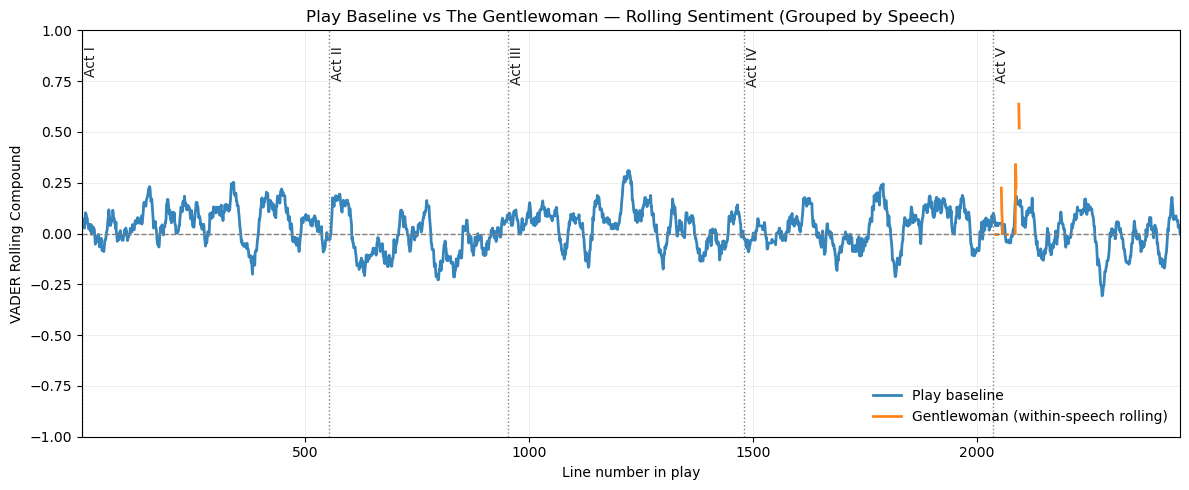

In [654]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in gentlewoman_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Gentlewoman (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs The Gentlewoman — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

#### The above is a clear example of where VADER sentiment may not work on literary texts or Shakespeare in particular. The nurse is talking about Lady Macbeth spiraling into insanity. She uses words like "heaven," so I'm wondering if the sentiment analysis is skewing positive whent the scene is dark.

### First Murderer Lines and VADER Analysis

In [655]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_MURDERERS.1.html"

In [656]:
response = requests.get(url)

In [657]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nIt was, so please your Highness.<br/>\r\nYou made it known to us.<br/>\r\nWe are men, my liege.<br/>\r\nAnd I another<br/>\r\nSo weary with disasters, tugged with fortune,<br/>\r\nThat I would set my life on any chance,<br/>\r\nTo mend it or be rid on ’t.<br/>\r\nTrue, my lord.<br/>\r\nThough our lives—<br/>\r\nWe are resolved, my lord.<br/>\r\nBut who did bid thee join with us?<br/>\r\nThen stand with us.—<br/>\r\nThe west yet glimmers with some streaks of day.<br/>\r\nNow spurs the lated traveler apace<br/>\r\nTo gain the timely inn, and near approaches<br/>\r\nThe subject of our watch.<br/>\r\nHis horses go about.<br/>\r\nStand to ’t.<br/>\r\nLet it come down!<br/>\r\nWas ’t not the way?<br/>\r\nWell, let’s away and say how much is done.<br/>\r\n’Tis Banquo’s then.<br/>\r\nMy lord, his throat is cut. That I did for him.<br/>\r\nMost royal sir, Fleance is ’scaped.<br/>\r\nAy, my good lord. Safe in a ditch he

In [658]:
first_murderer_soup = BS(response.text, "html.parser")

In [659]:
first_murderer_lines = first_murderer_soup.get_text()

In [660]:
first_murderer_lines = first_murderer_lines.splitlines()

In [661]:
first_murderer_lines = [ln.strip() for ln in first_murderer_lines if ln.strip()]

In [662]:
first_murderer_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(first_murderer_lines)].copy()

In [663]:
first_murderer_lines_df = first_murderer_lines_df.reset_index(drop=True)

In [664]:
first_murderer_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [665]:
first_murderer_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [666]:
first_murderer_lines_df = first_murderer_lines_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [667]:
first_murderer_lines_df.head()

line_number                                           text  act  scene  \
0         1033               It was, so please your Highness.    3      1   
1         1046                       You made it known to us.    3      1   
2         1054                          We are men, my liege.    3      1   
3         1077                                  And I another    3      1   
4         1078  So weary with disasters, tugged with fortune,    3      1   

   scene_id       act_scene    neg    neu    pos  compound vader_label  
0        12  Act 3, Scene 1  0.000  0.626  0.374    0.4572         pos  
1        12  Act 3, Scene 1  0.000  1.000  0.000    0.0000         neu  
2        12  Act 3, Scene 1  0.000  1.000  0.000    0.0000         neu  
3        12  Act 3, Scene 1  0.000  1.000  0.000    0.0000         neu  
4        12  Act 3, Scene 1  0.556  0.444  0.000   -0.7397         neg

In [668]:
first_murderer_lines_df['rolling_compound'] = (
    first_murderer_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [669]:
first_murderer_lines_df['rolling_intensity']=(
    first_murderer_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [670]:
first_murderer_lines_df['rolling_volatility'] = (
    first_murderer_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [671]:
first_murderer_lines_df['speech_id'] = (first_murderer_lines_df['line_number'].diff().gt(1)).cumsum()

In [672]:
first_murderer_lines_df['weighted_compound'] = (
    first_murderer_lines_df['compound'] * first_murderer_lines_df['compound'].abs()
)

In [673]:
first_murderer_lines_df['rolling_weighted'] = (
    first_murderer_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [674]:
first_murderer_lines_df['is_pos'] = (first_murderer_lines_df['vader_label']=='pos').astype(int)

In [675]:
first_murderer_lines_df['is_neg'] = (first_murderer_lines_df['vader_label']=='neg').astype(int)

In [676]:
first_murderer_lines_df['roll_pos_minus_neg'] = (
    first_murderer_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - first_murderer_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [677]:
sentiment_difference = first_murderer_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [678]:
first_murderer_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [679]:
first_murderer_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [680]:
first_murderer_lines_df['rolling_within_speech'] = (
     first_murderer_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [681]:
first_murderer_lines_df.insert(1, 'speaker', 'First Murderer')

In [682]:
first_murderer_lines_df.head(1)

line_number         speaker                              text  act  scene  \
0         1033  First Murderer  It was, so please your Highness.    3      1   

   scene_id       act_scene  neg    neu    pos  ...  rolling_volatility  \
0        12  Act 3, Scene 1  0.0  0.626  0.374  ...            0.263965   

  speech_id  weighted_compound  rolling_weighted  is_pos  is_neg  \
0         0           0.209032         -0.045937       1       0   

   roll_pos_minus_neg  diff_vs_play_w21  diff_vs_play_w11  \
0            0.166667         -0.130712         -0.185271   

   rolling_within_speech  
0                 0.4572  

[1 rows x 24 columns]

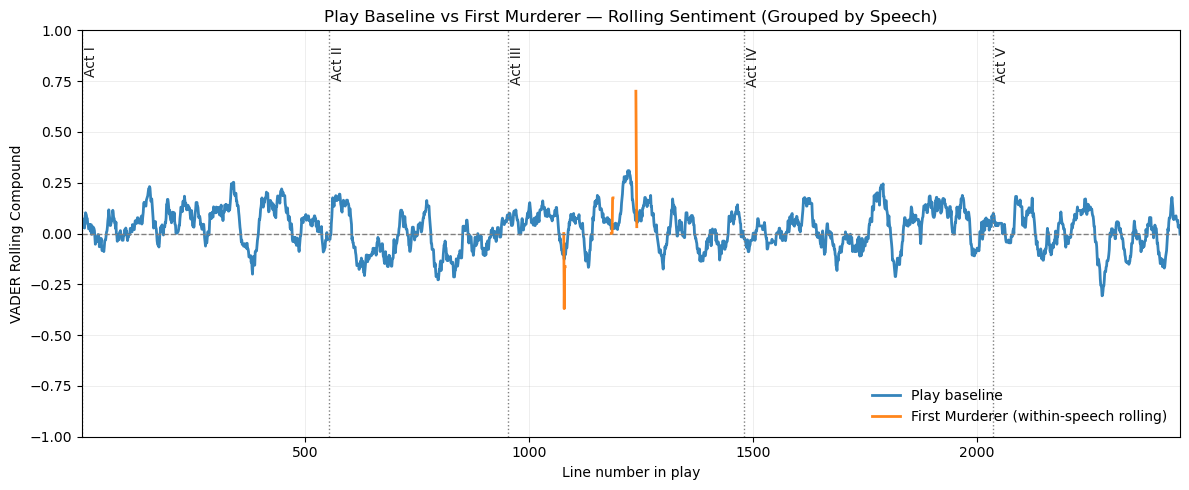

In [683]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in first_murderer_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='First Murderer (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs First Murderer — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### The Lord's Lines and VADER Analysis

In [684]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Lord.html"

In [685]:
response = requests.get(url)

In [686]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\nThe son of Duncan<br/>\r\n(From whom this tyrant holds the due of birth)<br/>\r\nLives in the English court and is received<br/>\r\nOf the most pious Edward with such grace<br/>\r\nThat the malevolence of fortune nothing<br/>\r\nTakes from his high respect. Thither Macduff<br/>\r\nIs gone to pray the holy king upon his aid<br/>\r\nTo wake Northumberland and warlike Siward<br/>\r\nThat, by the help of these (with Him above<br/>\r\nTo ratify the work), we may again<br/>\r\nGive to our tables meat, sleep to our nights,<br/>\r\nFree from our feasts and banquets bloody knives,<br/>\r\nDo faithful homage, and receive free honors,<br/>\r\nAll which we pine for now. And this report<br/>\r\nHath so exasperate the King that he<br/>\r\nPrepares for some attempt of war.<br/>\r\nHe did, and with an absolute “Sir, not I,”<br/>\r\nThe cloudy messenger turns me his back<br/>\r\nAnd hums, as who should say “You’ll rue the time<br/>\r\n

In [687]:
lord_soup = BS(response.text, "html.parser")

In [688]:
lord_lines = lord_soup.get_text()

In [689]:
lord_lines = lord_lines.splitlines()

In [690]:
lord_lines = [ln.strip() for ln in lord_lines if ln.strip()]

In [691]:
lord_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(lord_lines)].copy()

In [692]:
lord_lines_df = lord_lines_df.reset_index(drop=True)

In [693]:
lord_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [694]:
lord_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [695]:
lord_lines_df = lord_lines_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [696]:
lord_lines_df.head()

line_number                                            text  act  scene  \
0         1450                               The son of Duncan    3      6   
1         1451  (From whom this tyrant holds the due of birth)    3      6   
2         1452      Lives in the English court and is received    3      6   
3         1453        Of the most pious Edward with such grace    3      6   
4         1454         That the malevolence of fortune nothing    3      6   

   scene_id       act_scene  neg    neu    pos  compound vader_label  
0        17  Act 3, Scene 6  0.0  1.000  0.000    0.0000         neu  
1        17  Act 3, Scene 6  0.0  1.000  0.000    0.0000         neu  
2        17  Act 3, Scene 6  0.0  1.000  0.000    0.0000         neu  
3        17  Act 3, Scene 6  0.0  0.714  0.286    0.4215         pos  
4        17  Act 3, Scene 6  0.0  1.000  0.000    0.0000         neu

In [697]:
lord_lines_df['rolling_compound'] = (
    lord_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [698]:
lord_lines_df['rolling_intensity']=(
    lord_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [699]:
lord_lines_df['rolling_volatility'] = (
    lord_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [700]:
lord_lines_df['speech_id'] = (lord_lines_df['line_number'].diff().gt(1)).cumsum()

In [701]:
lord_lines_df['weighted_compound'] = (
    lord_lines_df['compound'] * lord_lines_df['compound'].abs()
)

In [702]:
lord_lines_df['rolling_weighted'] = (
    lord_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [703]:
lord_lines_df['is_pos'] = (lord_lines_df['vader_label']=='pos').astype(int)

In [704]:
lord_lines_df['is_neg'] = (lord_lines_df['vader_label']=='neg').astype(int)

In [705]:
lord_lines_df['roll_pos_minus_neg'] = (
    lord_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - lord_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [706]:
sentiment_difference = lord_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [707]:
lord_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [708]:
lord_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [709]:
lord_lines_df['rolling_within_speech'] = (
     lord_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [710]:
lord_lines_df.insert(1, 'speaker', 'Lord')

In [711]:
lord_lines_df.head(1)

line_number speaker               text  act  scene  scene_id  \
0         1450    Lord  The son of Duncan    3      6        17   

        act_scene  neg  neu  pos  ...  rolling_volatility speech_id  \
0  Act 3, Scene 6  0.0  1.0  0.0  ...                 0.0         0   

   weighted_compound  rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  \
0                0.0          0.067484       0       0            0.333333   

   diff_vs_play_w21  diff_vs_play_w11  rolling_within_speech  
0          0.074814          0.096127                    0.0  

[1 rows x 24 columns]

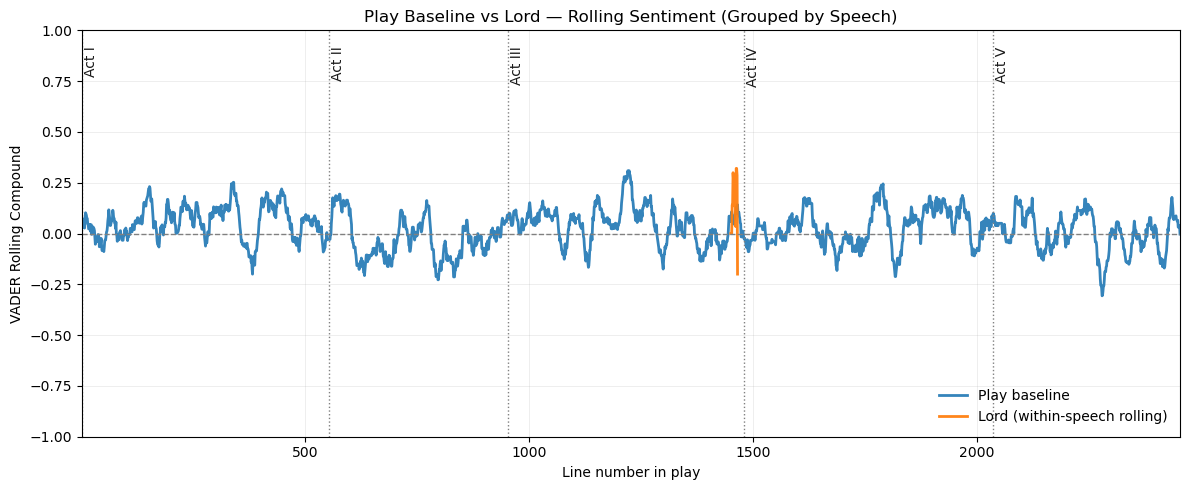

In [712]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in lord_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Lord (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Lord — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Macduff's Son's Lines and VADER Analysis

In [713]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_MacduffsSon.html"

In [714]:
response = requests.get(url)

In [715]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nAs birds do, mother.<br/>\r\nWith what I get, I mean; and so do they.<br/>\r\nWhy should I, mother? Poor birds they are not set for.<br/>\r\nMy father is not dead, for all your saying.<br/>\r\nNay, how will you do for a husband?<br/>\r\nThen you’ll buy ’em to sell again.<br/>\r\nWas my father a traitor, mother?<br/>\r\nWhat is a traitor?<br/>\r\nAnd be all traitors that do so?<br/>\r\nAnd must they all be hanged that swear and lie?<br/>\r\nWho must hang them?<br/>\r\nThen the liars and swearers are fools, for there<br/>\r\nare liars and swearers enough to beat the honest<br/>\r\nmen and hang up them.<br/>\r\nIf he were dead, you’d weep for him. If you would<br/>\r\nnot, it were a good sign that I should quickly have a<br/>\r\nnew father.<br/>\r\nThou liest, thou shag-eared villain!<br/>\r\nHe has killed me, mother.<br/>\r\nRun away, I pray you.<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [716]:
macduff_son_soup = BS(response.text, "html.parser")

In [717]:
macduff_son_lines = macduff_son_soup.get_text()

In [718]:
macduff_son_lines = macduff_son_lines.splitlines()

In [719]:
macduff_son_lines = [ln.strip() for ln in macduff_son_lines if ln.strip()]

In [720]:
macduff_son_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(macduff_son_lines)].copy()

In [721]:
macduff_son_lines_df = macduff_son_lines_df.reset_index(drop=True)

In [722]:
macduff_son_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [723]:
macduff_son_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [724]:
macduff_son_lines_df = macduff_son_lines_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [725]:
macduff_son_lines_df.head()

line_number                                         text  act  scene  \
0         1692                         As birds do, mother.    4      2   
1         1694     With what I get, I mean; and so do they.    4      2   
2         1699  My father is not dead, for all your saying.    4      2   
3         1701          Nay, how will you do for a husband?    4      2   
4         1703           Then you’ll buy ’em to sell again.    4      2   

   scene_id       act_scene  neg    neu    pos  compound vader_label  
0        19  Act 4, Scene 2  0.0  1.000  0.000    0.0000         neu  
1        19  Act 4, Scene 2  0.0  1.000  0.000    0.0000         neu  
2        19  Act 4, Scene 2  0.0  0.699  0.301    0.5334         pos  
3        19  Act 4, Scene 2  0.0  1.000  0.000    0.0000         neu  
4        19  Act 4, Scene 2  0.0  1.000  0.000    0.0000         neu

In [726]:
macduff_son_lines_df['rolling_compound'] = (
    macduff_son_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [727]:
macduff_son_lines_df['rolling_intensity']=(
    macduff_son_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [728]:
macduff_son_lines_df['rolling_volatility'] = (
    macduff_son_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [729]:
macduff_son_lines_df['speech_id'] = (macduff_son_lines_df['line_number'].diff().gt(1)).cumsum()

In [730]:
macduff_son_lines_df['weighted_compound'] = (
    macduff_son_lines_df['compound'] * macduff_son_lines_df['compound'].abs()
)

In [731]:
macduff_son_lines_df['rolling_weighted'] = (
    macduff_son_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [732]:
macduff_son_lines_df['is_pos'] = (macduff_son_lines_df['vader_label']=='pos').astype(int)

In [733]:
macduff_son_lines_df['is_neg'] = (macduff_son_lines_df['vader_label']=='neg').astype(int)

In [734]:
macduff_son_lines_df['roll_pos_minus_neg'] = (
    macduff_son_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - macduff_son_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [735]:
sentiment_difference = macduff_son_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [736]:
macduff_son_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [737]:
macduff_son_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [738]:
macduff_son_lines_df['rolling_within_speech'] = (
     macduff_son_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [739]:
macduff_son_lines_df.insert(1, 'speaker', "Macduff's Son")

In [740]:
macduff_son_lines_df.head(1)

line_number        speaker                  text  act  scene  scene_id  \
0         1692  Macduff's Son  As birds do, mother.    4      2        19   

        act_scene  neg  neu  pos  ...  rolling_volatility speech_id  \
0  Act 4, Scene 2  0.0  1.0  0.0  ...            0.307959         0   

   weighted_compound  rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  \
0                0.0          0.047419       0       0            0.166667   

   diff_vs_play_w21  diff_vs_play_w11  rolling_within_speech  
0          0.183638          0.316536                    0.0  

[1 rows x 24 columns]

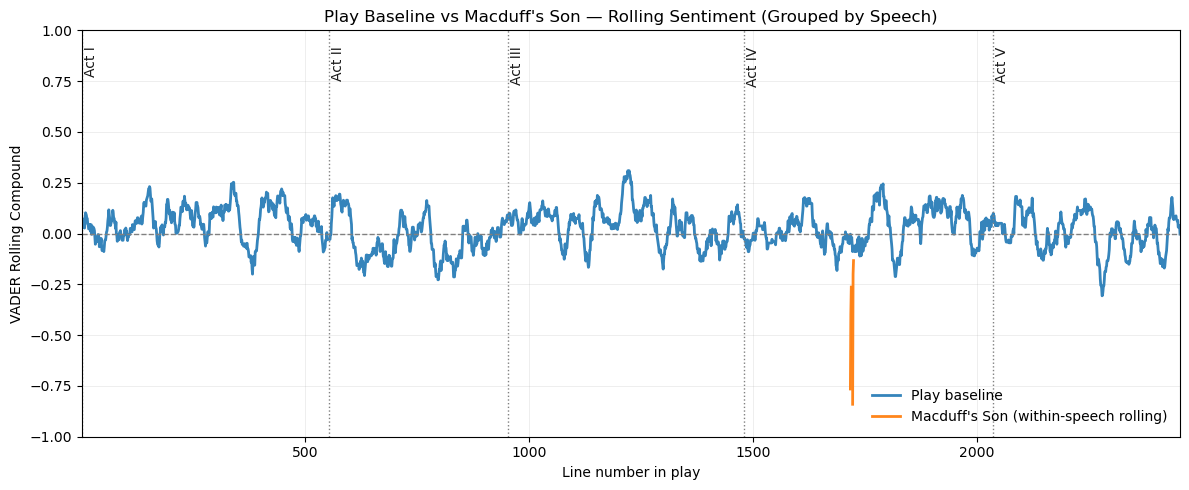

In [741]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in macduff_son_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label="Macduff's Son (within-speech rolling)" if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Macduff's Son — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Angus's Lines and VADER Analysis

In [742]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Angus.html"

In [743]:
response = requests.get(url)

In [744]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\nWe are sent<br/>\r\nTo give thee from our royal master thanks,<br/>\r\nOnly to herald thee into his sight,<br/>\r\nNot pay thee.<br/>\r\nWho was the Thane lives yet,<br/>\r\nBut under heavy judgment bears that life<br/>\r\nWhich he deserves to lose. Whether he was combined<br/>\r\nWith those of Norway, or did line the rebel<br/>\r\nWith hidden help and vantage, or that with both<br/>\r\nHe labored in his country’s wrack, I know not;<br/>\r\nBut treasons capital, confessed and proved,<br/>\r\nHave overthrown him.<br/>\r\nNear Birnam Wood<br/>\r\nShall we well meet them. That way are they coming.<br/>\r\nNow does he feel<br/>\r\nHis secret murders sticking on his hands.<br/>\r\nNow minutely revolts upbraid his faith-breach.<br/>\r\nThose he commands move only in command,<br/>\r\nNothing in love. Now does he feel his title<br/>\r\nHang loose about him, like a giant’s robe<br/>\r\nUpon a dwarfish thief.<br/>\r\n\r\n</body>

In [745]:
angus_soup = BS(response.text, "html.parser")

In [746]:
angus_lines = angus_soup.get_text()

In [747]:
angus_lines = angus_lines.splitlines()

In [748]:
angus_lines = [ln.strip() for ln in angus_lines if ln.strip()]

In [749]:
angus_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(angus_lines)].copy()

In [750]:
angus_lines_df = angus_lines_df.reset_index(drop=True)

In [751]:
angus_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [752]:
angus_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [753]:
angus_lines_df = angus_lines_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [754]:
angus_lines_df

line_number                                               text  act  \
0           196                                        We are sent    1   
1           197         To give thee from our royal master thanks,    1   
2           198                Only to herald thee into his sight,    1   
3           199                                      Not pay thee.    1   
4           207                       Who was the Thane lives yet,    1   
5           208           But under heavy judgment bears that life    1   
6           211        With those of Norway, or did line the rebel    1   
7           212    With hidden help and vantage, or that with both    1   
8           213     He labored in his country’s wrack, I know not;    1   
9           214        But treasons capital, confessed and proved,    1   
10          215                               Have overthrown him.    1   
11         2125                                   Near Birnam Wood    5   
12         2126  Shall we well meet them. That way are they com...    5   
13         2138                                   Now does he feel    5   
14         2139          His secret murders sticking on his hands.    5   
15         2140     Now minutely revolts upbraid his faith-breach.    5   
16         2141            Those he commands move only in command,    5   
17         2142        Nothing in love. Now does he feel his title    5   
18         2143          Hang loose about him, like a giant’s robe    5   
19         2144                             Upon a dwarfish thief.    5   

    scene  scene_id       act_scene    neg    neu    pos  compound vader_label  
0       3         3  Act 1, Scene 3  0.000  1.000  0.000    0.0000         neu  
1       3         3  Act 1, Scene 3  0.000  0.707  0.293    0.4404         pos  
2       3         3  Act 1, Scene 3  0.000  1.000  0.000    0.0000         neu  
3       3         3  Act 1, Scene 3  0.000  0.607  0.393    0.0762         pos  
4       3         3  Act 1, Scene 3  0.000  1.000  0.000    0.0000         neu  
5       3         3  Act 1, Scene 3  0.000  1.000  0.000    0.0000         neu  
6       3         3  Act 1, Scene 3  0.167  0.833  0.000   -0.1531         neg  
7       3         3  Act 1, Scene 3  0.000  0.748  0.252    0.4019         pos  
8       3         3  Act 1, Scene 3  0.000  1.000  0.000    0.0000         neu  
9       3         3  Act 1, Scene 3  0.000  1.000  0.000    0.0000         neu  
10      3         3  Act 1, Scene 3  0.000  1.000  0.000    0.0000         neu  
11      2        22  Act 5, Scene 2  0.000  1.000  0.000    0.0000         neu  
12      2        22  Act 5, Scene 2  0.000  0.811  0.189    0.2732         pos  
13      2        22  Act 5, Scene 2  0.000  1.000  0.000    0.0000         neu  
14      2        22  Act 5, Scene 2  0.400  0.600  0.000   -0.6124         neg  
15      2        22  Act 5, Scene 2  0.000  1.000  0.000    0.0000         neu  
16      2        22  Act 5, Scene 2  0.000  1.000  0.000    0.0000         neu  
17      2        22  Act 5, Scene 2  0.296  0.704  0.000   -0.5216         neg  
18      2        22  Act 5, Scene 2  0.213  0.556  0.231    0.0516         pos  
19      2        22  Act 5, Scene 2  0.531  0.469  0.000   -0.5267         neg

In [755]:
angus_lines_df['rolling_compound'] = (
    angus_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [756]:
angus_lines_df['rolling_intensity']=(
    angus_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [757]:
angus_lines_df['rolling_volatility'] = (
    angus_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [758]:
angus_lines_df['speech_id'] = (angus_lines_df['line_number'].diff().gt(1)).cumsum()

In [759]:
angus_lines_df['weighted_compound'] = (
    angus_lines_df['compound'] * angus_lines_df['compound'].abs()
)

In [760]:
angus_lines_df['rolling_weighted'] = (
    angus_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [761]:
angus_lines_df['is_pos'] = (angus_lines_df['vader_label']=='pos').astype(int)

In [762]:
angus_lines_df['is_neg'] = (angus_lines_df['vader_label']=='neg').astype(int)

In [763]:
angus_lines_df['roll_pos_minus_neg'] = (
    angus_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - angus_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [764]:
sentiment_difference = angus_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [765]:
angus_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [766]:
angus_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [767]:
angus_lines_df['rolling_within_speech'] = (
     lady_macduff_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [768]:
angus_lines_df.insert(1, 'speaker', 'Angus')

In [769]:
angus_lines_df.head(1)

line_number speaker         text  act  scene  scene_id       act_scene  \
0          196   Angus  We are sent    1      3         3  Act 1, Scene 3   

   neg  neu  pos  ...  rolling_volatility speech_id  weighted_compound  \
0  0.0  1.0  0.0  ...            0.254265         0                0.0   

   rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  diff_vs_play_w21  \
0          0.033293       0       0            0.333333         -0.010052   

   diff_vs_play_w11  rolling_within_speech  
0         -0.050827                    0.0  

[1 rows x 24 columns]

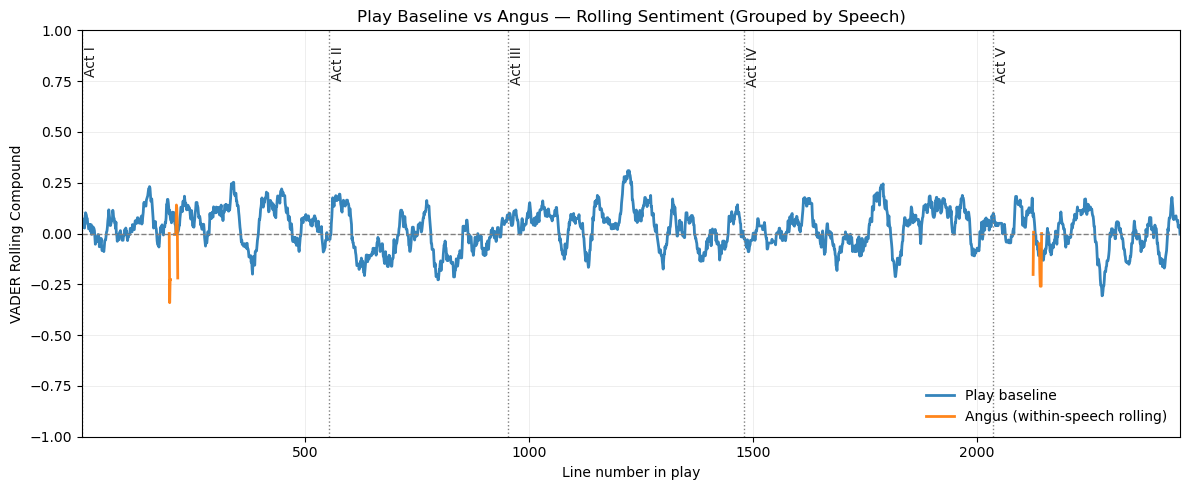

In [770]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in angus_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Angus (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Angus — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Second Murder's Lines and VADER Analysis

In [771]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_MURDERERS.2.html"

In [772]:
response = requests.get(url)

In [773]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nIt was, so please your Highness.<br/>\r\nI am one, my liege,<br/>\r\nWhom the vile blows and buffets of the world<br/>\r\nHath so incensed that I am reckless what<br/>\r\nI do to spite the world.<br/>\r\nTrue, my lord.<br/>\r\nWe shall, my lord,<br/>\r\nPerform what you command us.<br/>\r\nWe are resolved, my lord.<br/>\r\nHe needs not our mistrust, since he delivers<br/>\r\nOur offices and what we have to do<br/>\r\nTo the direction just.<br/>\r\nThen ’tis he. The rest<br/>\r\nThat are within the note of expectation<br/>\r\nAlready are i’ th’ court.<br/>\r\nA light, a light!<br/>\r\nWe have lost best half of our<br/>\r\naffair.<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [774]:
second_murderer_soup = BS(response.text, "html.parser")

In [775]:
second_murderer_lines = second_murderer_soup.get_text()

In [776]:
second_murderer_lines = second_murderer_lines.splitlines()

In [777]:
second_murderer_lines = [ln.strip() for ln in second_murderer_lines if ln.strip()]

In [778]:
second_murderer_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(second_murderer_lines)].copy()

In [779]:
second_murderer_lines_df = second_murderer_lines_df.reset_index(drop=True)

In [780]:
second_murderer_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [781]:
second_murderer_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [782]:
second_murderer_lines_df = second_murderer_lines_df.rename(columns={'play_neg': 'neg', 'play_neu': 'neu', 'play_pos': 'pos', 'play_vader_label': 'vader_label', 'play_compound': 'compound'})

In [783]:
second_murderer_lines_df.head()

line_number                                          text  act  scene  \
0         1033              It was, so please your Highness.    3      1   
1         1073                           I am one, my liege,    3      1   
2         1074  Whom the vile blows and buffets of the world    3      1   
3         1075      Hath so incensed that I am reckless what    3      1   
4         1076                      I do to spite the world.    3      1   

   scene_id       act_scene    neg    neu    pos  compound vader_label  
0        12  Act 3, Scene 1  0.000  0.626  0.374    0.4572         pos  
1        12  Act 3, Scene 1  0.000  1.000  0.000    0.0000         neu  
2        12  Act 3, Scene 1  0.339  0.661  0.000   -0.6249         neg  
3        12  Act 3, Scene 1  0.500  0.500  0.000   -0.7178         neg  
4        12  Act 3, Scene 1  0.405  0.595  0.000   -0.5267         neg

In [784]:
second_murderer_lines_df['rolling_compound'] = (
    second_murderer_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [785]:
second_murderer_lines_df['rolling_intensity']=(
    second_murderer_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [786]:
second_murderer_lines_df['rolling_volatility'] = (
    second_murderer_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [787]:
second_murderer_lines_df['speech_id'] = (first_witch_lines_df['line_number'].diff().gt(1)).cumsum()

In [788]:
second_murderer_lines_df['weighted_compound'] = (
    second_murderer_lines_df['compound'] * second_murderer_lines_df['compound'].abs()
)

In [789]:
second_murderer_lines_df['rolling_weighted'] = (
    second_murderer_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [790]:
second_murderer_lines_df['is_pos'] = (first_witch_lines_df['vader_label']=='pos').astype(int)

In [791]:
second_murderer_lines_df['is_neg'] = (first_witch_lines_df['vader_label']=='neg').astype(int)

In [792]:
second_murderer_lines_df['roll_pos_minus_neg'] = (
    second_murderer_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - second_murderer_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [793]:
sentiment_difference = second_murderer_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [794]:
second_murderer_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [795]:
second_murderer_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [796]:
second_murderer_lines_df['rolling_within_speech'] = (
     second_murderer_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [797]:
second_murderer_lines_df.insert(1, 'speaker', 'Second Murderer')

In [798]:
second_murderer_lines_df.head(1)

line_number          speaker                              text  act  scene  \
0         1033  Second Murderer  It was, so please your Highness.    3      1   

   scene_id       act_scene  neg    neu    pos  ...  rolling_volatility  \
0        12  Act 3, Scene 1  0.0  0.626  0.374  ...            0.543211   

  speech_id  weighted_compound  rolling_weighted  is_pos  is_neg  \
0         0           0.209032         -0.132743       0       0   

   roll_pos_minus_neg  diff_vs_play_w21  diff_vs_play_w11  \
0            0.166667         -0.290412         -0.344971   

   rolling_within_speech  
0                 0.4572  

[1 rows x 24 columns]

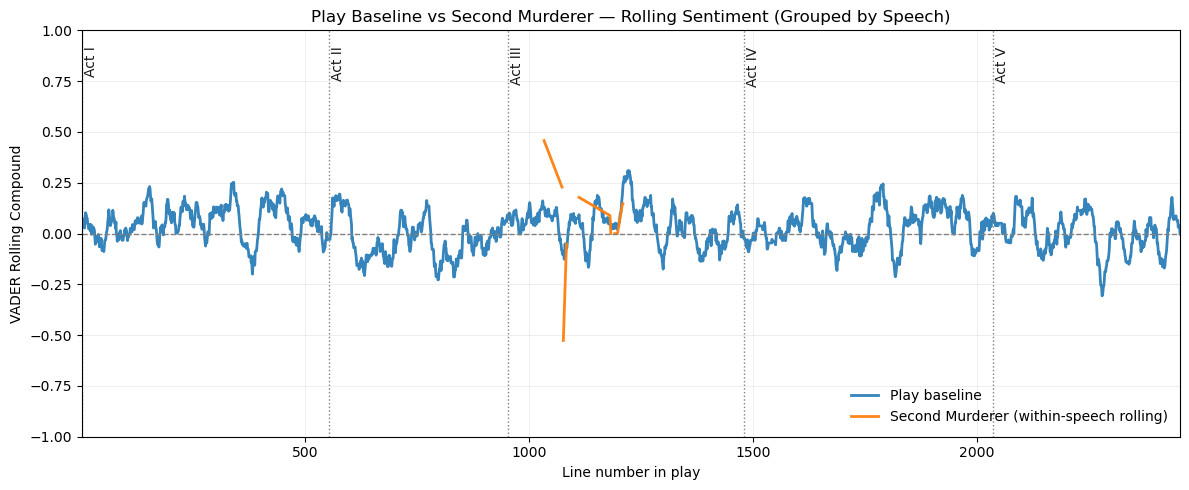

In [799]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in second_murderer_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Second Murderer (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Second Murderer — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Old Man's Lines AND VADER Analysis

In [800]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_OldMan.html"

In [801]:
response = requests.get(url)
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nThreescore and ten I can remember well,<br/>\r\nWithin the volume of which time I have seen<br/>\r\nHours dreadful and things strange, but this sore night<br/>\r\nHath trifled former knowings.<br/>\r\n’Tis unnatural,<br/>\r\nEven like the deed that’s done. On Tuesday last<br/>\r\nA falcon, tow’ring in her pride of place,<br/>\r\nWas by a mousing owl hawked at and killed.<br/>\r\n’Tis said they eat each other.<br/>\r\nGod’s benison go with you and with those<br/>\r\nThat would make good of bad and friends of foes.<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [802]:
old_man_soup = BS(response.text, "html.parser")
old_man_lines = old_man_soup.get_text()

In [803]:
old_man_lines = old_man_lines.splitlines()
old_man_lines = [ln.strip() for ln in old_man_lines if ln.strip()]

In [804]:
old_man_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(old_man_lines)].copy()
old_man_lines_df = old_man_lines_df.reset_index(drop=True)

In [805]:
old_man_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)
old_man_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [806]:
old_man_lines_df = old_man_lines_df.rename(columns={
    'play_neg': 'neg',
    'play_neu': 'neu',
    'play_pos': 'pos',
    'play_vader_label': 'vader_label',
    'play_compound': 'compound'
})

In [807]:
old_man_lines_df.head()

line_number                                             text  act  scene  \
0          897          Threescore and ten I can remember well,    2      4   
1          898      Within the volume of which time I have seen    2      4   
2          901                    Hath trifled former knowings.    2      4   
3          909                                  ’Tis unnatural,    2      4   
4          910  Even like the deed that’s done. On Tuesday last    2      4   

   scene_id       act_scene  neg    neu    pos  compound vader_label  
0        11  Act 2, Scene 4  0.0  0.741  0.259    0.2732         pos  
1        11  Act 2, Scene 4  0.0  1.000  0.000    0.0000         neu  
2        11  Act 2, Scene 4  0.0  1.000  0.000    0.0000         neu  
3        11  Act 2, Scene 4  0.0  1.000  0.000    0.0000         neu  
4        11  Act 2, Scene 4  0.0  0.762  0.238    0.3612         pos

In [808]:
old_man_lines_df['rolling_compound'] = (
    old_man_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [809]:
old_man_lines_df['rolling_intensity'] = (
    old_man_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [810]:
old_man_lines_df['rolling_volatility'] = (
    old_man_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [811]:
old_man_lines_df['speech_id'] = (old_man_lines_df['line_number'].diff().gt(1)).cumsum()

In [812]:
old_man_lines_df['weighted_compound'] = (
    old_man_lines_df['compound'] * old_man_lines_df['compound'].abs()
)

In [813]:
old_man_lines_df['rolling_weighted'] = (
    old_man_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [814]:
old_man_lines_df['is_pos'] = (old_man_lines_df['vader_label'] == 'pos').astype(int)
old_man_lines_df['is_neg'] = (old_man_lines_df['vader_label'] == 'neg').astype(int)

In [815]:
old_man_lines_df['roll_pos_minus_neg'] = (
    old_man_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - old_man_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [816]:
sentiment_difference = old_man_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [817]:
old_man_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [818]:
old_man_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [819]:
old_man_lines_df['rolling_within_speech'] = (
    old_man_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [820]:
old_man_lines_df.insert(1, 'speaker', 'Old Man')

In [821]:
old_man_lines_df.head(1)

line_number  speaker                                     text  act  scene  \
0          897  Old Man  Threescore and ten I can remember well,    2      4   

   scene_id       act_scene  neg    neu    pos  ...  rolling_volatility  \
0        11  Act 2, Scene 4  0.0  0.741  0.259  ...            0.157732   

  speech_id  weighted_compound  rolling_weighted  is_pos  is_neg  \
0         0           0.074638          0.053451       1       0   

   roll_pos_minus_neg  diff_vs_play_w21  diff_vs_play_w11  \
0                 0.5             0.266          0.209864   

   rolling_within_speech  
0                 0.2732  

[1 rows x 24 columns]

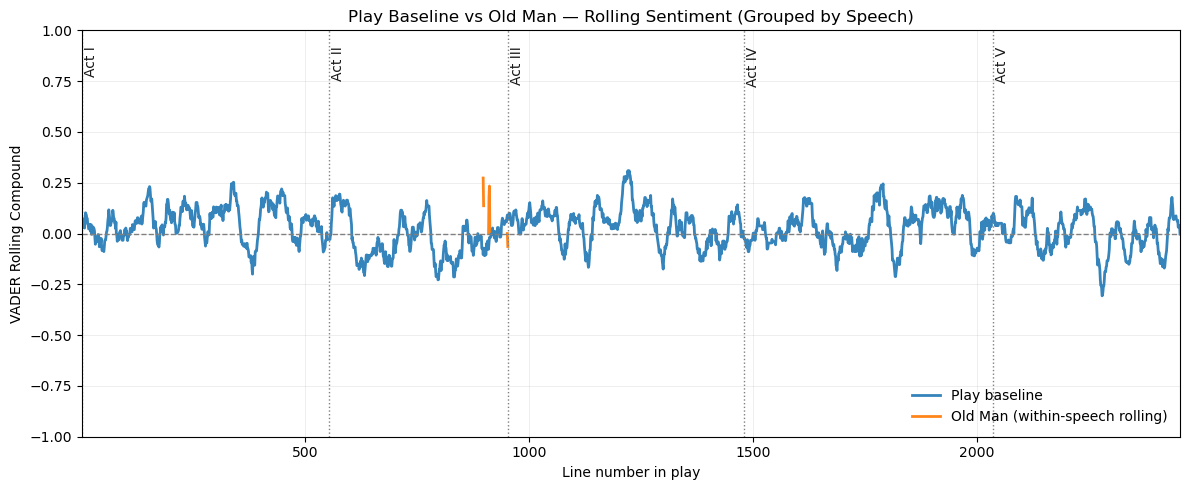

In [822]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in old_man_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Old Man (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Old Man — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Caithness's Lines and VADER Analysis

In [823]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Caithness.html"

In [824]:
response = requests.get(url)
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nWho knows if Donalbain be with his brother?<br/>\r\nGreat Dunsinane he strongly fortifies.<br/>\r\nSome say he’s mad; others that lesser hate him<br/>\r\nDo call it valiant fury. But for certain<br/>\r\nHe cannot buckle his distempered cause<br/>\r\nWithin the belt of rule.<br/>\r\nWell, march we on<br/>\r\nTo give obedience where ’tis truly owed.<br/>\r\nMeet we the med’cine of the sickly weal,<br/>\r\nAnd with him pour we in our country’s purge<br/>\r\nEach drop of us.<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [825]:
caithness_soup = BS(response.text, "html.parser")
caithness_lines = caithness_soup.get_text()

In [826]:
caithness_lines = caithness_lines.splitlines()
caithness_lines = [ln.strip() for ln in caithness_lines if ln.strip()]

In [827]:
caithness_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(caithness_lines)].copy()
caithness_lines_df = caithness_lines_df.reset_index(drop=True)

In [828]:
caithness_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)
caithness_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [829]:
caithness_lines_df = caithness_lines_df.rename(columns={
    'play_neg': 'neg',
    'play_neu': 'neu',
    'play_pos': 'pos',
    'play_vader_label': 'vader_label',
    'play_compound': 'compound'
})

In [830]:
caithness_lines_df.head()

line_number                                            text  act  scene  \
0         2127     Who knows if Donalbain be with his brother?    5      2   
1         2133          Great Dunsinane he strongly fortifies.    5      2   
2         2134  Some say he’s mad; others that lesser hate him    5      2   
3         2135        Do call it valiant fury. But for certain    5      2   
4         2136          He cannot buckle his distempered cause    5      2   

   scene_id       act_scene    neg    neu    pos  compound vader_label  
0        22  Act 5, Scene 2  0.000  1.000  0.000    0.0000         neu  
1        22  Act 5, Scene 2  0.000  0.326  0.674    0.7351         pos  
2        22  Act 5, Scene 2  0.496  0.504  0.000   -0.7845         neg  
3        22  Act 5, Scene 2  0.214  0.545  0.241    0.0772         pos  
4        22  Act 5, Scene 2  0.000  1.000  0.000    0.0000         neu

In [831]:
caithness_lines_df['rolling_compound'] = (
    caithness_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [832]:
caithness_lines_df['rolling_intensity'] = (
    caithness_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [833]:
caithness_lines_df['rolling_volatility'] = (
    caithness_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [834]:
caithness_lines_df['speech_id'] = (caithness_lines_df['line_number'].diff().gt(1)).cumsum()

In [835]:
caithness_lines_df['weighted_compound'] = (
    caithness_lines_df['compound'] * caithness_lines_df['compound'].abs()
)

In [836]:
caithness_lines_df['rolling_weighted'] = (
    caithness_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [837]:
caithness_lines_df['is_pos'] = (caithness_lines_df['vader_label'] == 'pos').astype(int)
caithness_lines_df['is_neg'] = (caithness_lines_df['vader_label'] == 'neg').astype(int)

In [838]:
caithness_lines_df['roll_pos_minus_neg'] = (
    caithness_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - caithness_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [839]:
sentiment_difference = caithness_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [840]:
caithness_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [841]:
caithness_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [842]:
caithness_lines_df['rolling_within_speech'] = (
    caithness_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [843]:
caithness_lines_df.insert(1, 'speaker', 'Caithness')

In [844]:
caithness_lines_df.head(1)

line_number    speaker                                         text  act  \
0         2127  Caithness  Who knows if Donalbain be with his brother?    5   

   scene  scene_id       act_scene  neg  neu  pos  ...  rolling_volatility  \
0      2        22  Act 5, Scene 2  0.0  1.0  0.0  ...            0.759934   

  speech_id  weighted_compound  rolling_weighted  is_pos  is_neg  \
0         0                0.0         -0.011518       0       0   

   roll_pos_minus_neg  diff_vs_play_w21  diff_vs_play_w11  \
0            0.166667         -0.073052          0.007452   

   rolling_within_speech  
0                    0.0  

[1 rows x 24 columns]

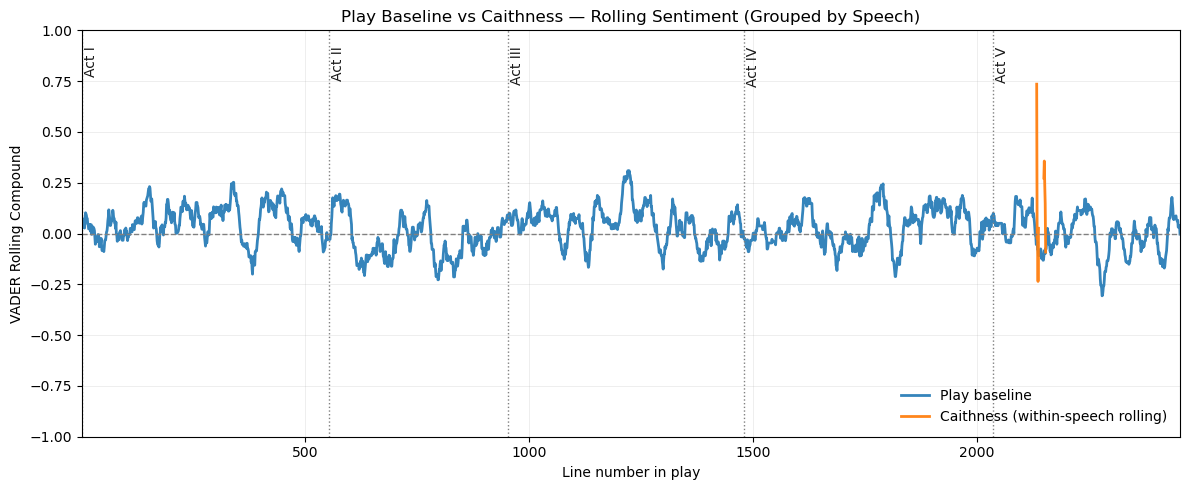

In [845]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in caithness_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Caithness (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Caithness — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Menteith's Lines and VADER Analysis

In [846]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Menteith.html"

In [847]:
response = requests.get(url)
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nThe English power is near, led on by Malcolm,<br/>\r\nHis uncle Siward, and the good Macduff.<br/>\r\nRevenges burn in them, for their dear causes<br/>\r\nWould to the bleeding and the grim alarm<br/>\r\nExcite the mortified man.<br/>\r\nWhat does the tyrant?<br/>\r\nWho, then, shall blame<br/>\r\nHis pestered senses to recoil and start<br/>\r\nWhen all that is within him does condemn<br/>\r\nItself for being there?<br/>\r\nWe doubt it nothing.<br/>\r\nThe Wood of Birnam.<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [848]:
menteith_soup = BS(response.text, "html.parser")
menteith_lines = menteith_soup.get_text()

In [849]:
menteith_lines = menteith_lines.splitlines()
menteith_lines = [ln.strip() for ln in menteith_lines if ln.strip()]

In [850]:
menteith_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(menteith_lines)].copy()
menteith_lines_df = menteith_lines_df.reset_index(drop=True)

In [851]:
menteith_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)
menteith_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [852]:
menteith_lines_df = menteith_lines_df.rename(columns={
    'play_neg': 'neg',
    'play_neu': 'neu',
    'play_pos': 'pos',
    'play_vader_label': 'vader_label',
    'play_compound': 'compound'
})

In [853]:
menteith_lines_df.head()

line_number                                           text  act  scene  \
0         2120  The English power is near, led on by Malcolm,    5      2   
1         2121        His uncle Siward, and the good Macduff.    5      2   
2         2122   Revenges burn in them, for their dear causes    5      2   
3         2123       Would to the bleeding and the grim alarm    5      2   
4         2124                      Excite the mortified man.    5      2   

   scene_id       act_scene    neg    neu    pos  compound vader_label  
0        22  Act 5, Scene 2  0.000  1.000  0.000    0.0000         neu  
1        22  Act 5, Scene 2  0.000  0.674  0.326    0.4404         pos  
2        22  Act 5, Scene 2  0.252  0.522  0.226   -0.0772         neg  
3        22  Act 5, Scene 2  0.504  0.496  0.000   -0.7269         neg  
4        22  Act 5, Scene 2  0.000  0.492  0.508    0.4767         pos

In [854]:
menteith_lines_df['rolling_compound'] = (
    menteith_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [855]:
menteith_lines_df['rolling_intensity'] = (
    menteith_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [856]:
menteith_lines_df['rolling_volatility'] = (
    menteith_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [857]:
menteith_lines_df['speech_id'] = (menteith_lines_df['line_number'].diff().gt(1)).cumsum()

In [858]:
menteith_lines_df['weighted_compound'] = (
    menteith_lines_df['compound'] * menteith_lines_df['compound'].abs()
)

In [859]:
menteith_lines_df['rolling_weighted'] = (
    menteith_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [860]:
menteith_lines_df['is_pos'] = (menteith_lines_df['vader_label'] == 'pos').astype(int)
menteith_lines_df['is_neg'] = (menteith_lines_df['vader_label'] == 'neg').astype(int)

In [861]:
menteith_lines_df['roll_pos_minus_neg'] = (
    menteith_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - menteith_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [862]:
sentiment_difference = menteith_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [863]:
menteith_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [864]:
menteith_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [865]:
menteith_lines_df['rolling_within_speech'] = (
    menteith_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [866]:
menteith_lines_df.insert(1, 'speaker', 'Menteith')

In [867]:
menteith_lines_df.head(1)

line_number   speaker                                           text  act  \
0         2120  Menteith  The English power is near, led on by Malcolm,    5   

   scene  scene_id       act_scene  neg  neu  pos  ...  rolling_volatility  \
0      2        22  Act 5, Scene 2  0.0  1.0  0.0  ...            0.279232   

  speech_id  weighted_compound  rolling_weighted  is_pos  is_neg  \
0         0                0.0         -0.018858       0       0   

   roll_pos_minus_neg  diff_vs_play_w21  diff_vs_play_w11  \
0                 0.0         -0.097676         -0.111112   

   rolling_within_speech  
0                    0.0  

[1 rows x 24 columns]

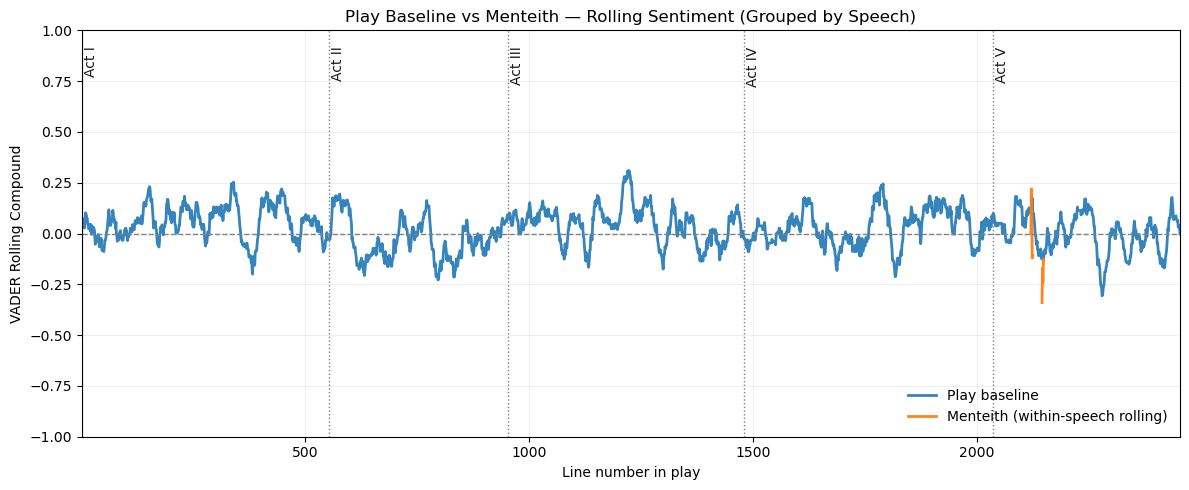

In [868]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in menteith_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Menteith (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Menteith — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Donalbain's Lines and VADER Analysis

In [869]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Donalbain.html"

In [870]:
response = requests.get(url)
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nWhat is amiss?<br/>\r\nWhat should be spoken here, where our fate,<br/>\r\nHid in an auger hole, may rush and seize us?<br/>\r\nLet’s away. Our tears are not yet brewed.<br/>\r\nSo all.<br/>\r\nWell contented.<br/>\r\nTo Ireland I. Our separated fortune<br/>\r\nShall keep us both the safer. Where we are,<br/>\r\nThere’s daggers in men’s smiles. The near in blood,<br/>\r\nThe nearer bloody.<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [871]:
donalbain_soup = BS(response.text, "html.parser")
donalbain_lines = donalbain_soup.get_text()

In [872]:
donalbain_lines = donalbain_lines.splitlines()
donalbain_lines = [ln.strip() for ln in donalbain_lines if ln.strip()]

In [873]:
donalbain_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(donalbain_lines)].copy()
donalbain_lines_df = donalbain_lines_df.reset_index(drop=True)

In [874]:
donalbain_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)
donalbain_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [875]:
donalbain_lines_df = donalbain_lines_df.rename(columns={
    'play_neg': 'neg',
    'play_neu': 'neu',
    'play_pos': 'pos',
    'play_vader_label': 'vader_label',
    'play_compound': 'compound'
})

In [876]:
donalbain_lines_df.head()

line_number                                          text  act  scene  \
0          837                                What is amiss?    2      3   
1          867   What should be spoken here, where our fate,    2      3   
2          868  Hid in an auger hole, may rush and seize us?    2      3   
3          869     Let’s away. Our tears are not yet brewed.    2      3   
4          880                                       So all.    2      3   

   scene_id       act_scene    neg    neu  pos  compound vader_label  
0        10  Act 2, Scene 3  0.000  1.000  0.0    0.0000         neu  
1        10  Act 2, Scene 3  0.000  1.000  0.0    0.0000         neu  
2        10  Act 2, Scene 3  0.135  0.865  0.0   -0.1027         neg  
3        10  Act 2, Scene 3  0.213  0.787  0.0   -0.2263         neg  
4        10  Act 2, Scene 3  0.000  1.000  0.0    0.0000         neu

In [877]:
donalbain_lines_df['rolling_compound'] = (
    donalbain_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [878]:
donalbain_lines_df['rolling_intensity'] = (
    donalbain_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [879]:
donalbain_lines_df['rolling_volatility'] = (
    donalbain_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [880]:
donalbain_lines_df['speech_id'] = (donalbain_lines_df['line_number'].diff().gt(1)).cumsum()

In [881]:
donalbain_lines_df['weighted_compound'] = (
    donalbain_lines_df['compound'] * donalbain_lines_df['compound'].abs()
)

In [882]:
donalbain_lines_df['rolling_weighted'] = (
    donalbain_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [883]:
donalbain_lines_df['is_pos'] = (donalbain_lines_df['vader_label'] == 'pos').astype(int)
donalbain_lines_df['is_neg'] = (donalbain_lines_df['vader_label'] == 'neg').astype(int)

In [884]:
donalbain_lines_df['roll_pos_minus_neg'] = (
    donalbain_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - donalbain_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [885]:
sentiment_difference = donalbain_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [886]:
donalbain_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [887]:
donalbain_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [888]:
donalbain_lines_df['rolling_within_speech'] = (
    donalbain_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [889]:
donalbain_lines_df.insert(1, 'speaker', 'Donalbain')

In [890]:
donalbain_lines_df.head(1)

line_number    speaker            text  act  scene  scene_id  \
0          837  Donalbain  What is amiss?    2      3        10   

        act_scene  neg  neu  pos  ...  rolling_volatility speech_id  \
0  Act 2, Scene 3  0.0  1.0  0.0  ...            0.059294         0   

   weighted_compound  rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  \
0                0.0          0.038722       0       0           -0.166667   

   diff_vs_play_w21  diff_vs_play_w11  rolling_within_speech  
0          0.159931          0.174305                    0.0  

[1 rows x 24 columns]

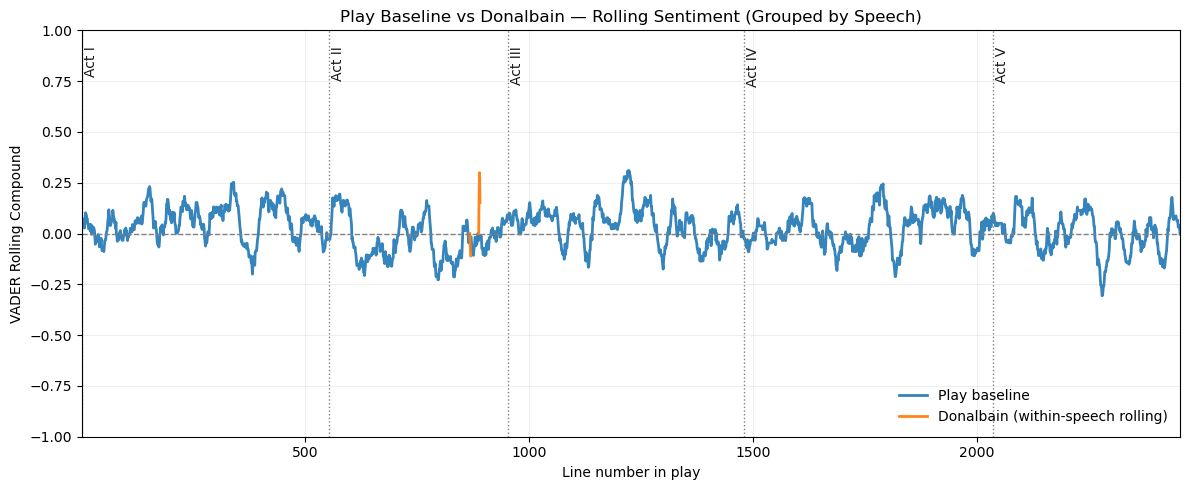

In [891]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in donalbain_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Donalbain (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Donalbain — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Young Siward's Lines and VADER Analysis

In [892]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_YoungSiward.html"

In [893]:
response = requests.get(url)
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nWhat is thy name?<br/>\r\nNo, though thou call’st thyself a hotter name<br/>\r\nThan any is in hell.<br/>\r\nThe devil himself could not pronounce a title<br/>\r\nMore hateful to mine ear.<br/>\r\nThou liest, abhorrèd tyrant. With my sword<br/>\r\nI’ll prove the lie thou speak’st.<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [894]:
young_siward_soup = BS(response.text, "html.parser")
young_siward_lines = young_siward_soup.get_text()

In [895]:
young_siward_lines = young_siward_lines.splitlines()
young_siward_lines = [ln.strip() for ln in young_siward_lines if ln.strip()]

In [896]:
young_siward_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(young_siward_lines)].copy()
young_siward_lines_df = young_siward_lines_df.reset_index(drop=True)

In [897]:
young_siward_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)
young_siward_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [898]:
young_siward_lines_df = young_siward_lines_df.rename(columns={
    'play_neg': 'neg',
    'play_neu': 'neu',
    'play_pos': 'pos',
    'play_vader_label': 'vader_label',
    'play_compound': 'compound'
})

In [899]:
young_siward_lines_df.head()

line_number                                           text  act  scene  \
0         2334                              What is thy name?    5      7   
1         2336  No, though thou call’st thyself a hotter name    5      7   
2         2337                           Than any is in hell.    5      7   
3         2339  The devil himself could not pronounce a title    5      7   
4         2340                      More hateful to mine ear.    5      7   

   scene_id       act_scene    neg    neu  pos  compound vader_label  
0        27  Act 5, Scene 7  0.000  1.000  0.0    0.0000         neu  
1        27  Act 5, Scene 7  0.000  1.000  0.0    0.0000         neu  
2        27  Act 5, Scene 7  0.535  0.465  0.0   -0.6808         neg  
3        27  Act 5, Scene 7  0.386  0.614  0.0   -0.6597         neg  
4        27  Act 5, Scene 7  0.466  0.534  0.0   -0.5413         neg

In [900]:
young_siward_lines_df['rolling_compound'] = (
    young_siward_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [901]:
young_siward_lines_df['rolling_intensity'] = (
    young_siward_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [902]:
young_siward_lines_df['rolling_volatility'] = (
    young_siward_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [903]:
young_siward_lines_df['speech_id'] = (young_siward_lines_df['line_number'].diff().gt(1)).cumsum()

In [904]:
young_siward_lines_df['weighted_compound'] = (
    young_siward_lines_df['compound'] * young_siward_lines_df['compound'].abs()
)

In [905]:
young_siward_lines_df['rolling_weighted'] = (
    young_siward_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [906]:
young_siward_lines_df['is_pos'] = (young_siward_lines_df['vader_label'] == 'pos').astype(int)
young_siward_lines_df['is_neg'] = (young_siward_lines_df['vader_label'] == 'neg').astype(int)

In [907]:
young_siward_lines_df['roll_pos_minus_neg'] = (
    young_siward_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - young_siward_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [908]:
sentiment_difference = young_siward_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [909]:
young_siward_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [910]:
young_siward_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [911]:
young_siward_lines_df['rolling_within_speech'] = (
    young_siward_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [912]:
young_siward_lines_df.insert(1, 'speaker', 'Young Siward')

In [913]:
young_siward_lines_df.head(1)

line_number       speaker               text  act  scene  scene_id  \
0         2334  Young Siward  What is thy name?    5      7        27   

        act_scene  neg  neu  pos  ...  rolling_volatility speech_id  \
0  Act 5, Scene 7  0.0  1.0  0.0  ...             0.39306         0   

   weighted_compound  rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  \
0                0.0         -0.198616       0       0                -0.5   

   diff_vs_play_w21  diff_vs_play_w11  rolling_within_speech  
0         -0.172886         -0.044497                    0.0  

[1 rows x 24 columns]

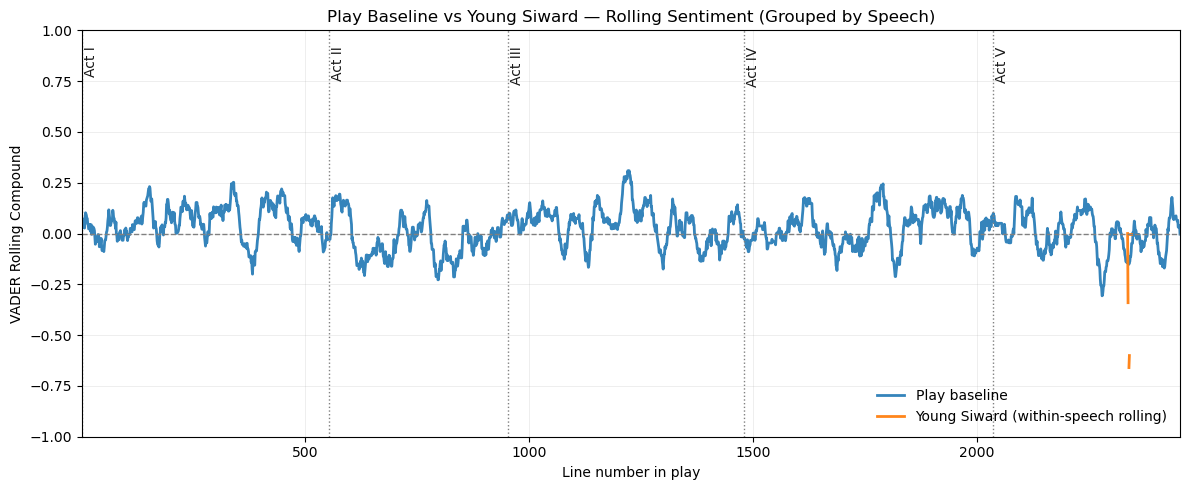

In [914]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in young_siward_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Young Siward (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Young Siward — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Third Murderer's Lines and VADER Analysis

In [915]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_MURDERERS.3.html"

In [916]:
response = requests.get(url)
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\nMacbeth.<br/>\r\nHark, I hear horses.<br/>\r\nAlmost a mile; but he does usually<br/>\r\n(So all men do) from hence to th’ palace gate<br/>\r\nMake it their walk.<br/>\r\n’Tis he.<br/>\r\nWho did strike out the light?<br/>\r\nThere’s but one down. The son is<br/>\r\nfled.<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [917]:
third_murderer_soup = BS(response.text, "html.parser")
third_murderer_lines = third_murderer_soup.get_text()

In [918]:
third_murderer_lines = third_murderer_lines.splitlines()
third_murderer_lines = [ln.strip() for ln in third_murderer_lines if ln.strip()]

In [919]:
third_murderer_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(third_murderer_lines)].copy()
third_murderer_lines_df = third_murderer_lines_df.reset_index(drop=True)

In [920]:
third_murderer_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)
third_murderer_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [921]:
third_murderer_lines_df = third_murderer_lines_df.rename(columns={
    'play_neg': 'neg',
    'play_neu': 'neu',
    'play_pos': 'pos',
    'play_vader_label': 'vader_label',
    'play_compound': 'compound'
})

In [922]:
third_murderer_lines_df.head()

line_number                                           text  act  scene  \
0         1179                                       Macbeth.    3      3   
1         1188                           Hark, I hear horses.    3      3   
2         1194             Almost a mile; but he does usually    3      3   
3         1195  (So all men do) from hence to th’ palace gate    3      3   
4         1196                            Make it their walk.    3      3   

   scene_id       act_scene  neg  neu  pos  compound vader_label  
0        14  Act 3, Scene 3  0.0  1.0  0.0       0.0         neu  
1        14  Act 3, Scene 3  0.0  1.0  0.0       0.0         neu  
2        14  Act 3, Scene 3  0.0  1.0  0.0       0.0         neu  
3        14  Act 3, Scene 3  0.0  1.0  0.0       0.0         neu  
4        14  Act 3, Scene 3  0.0  1.0  0.0       0.0         neu

In [923]:
third_murderer_lines_df['rolling_compound'] = (
    third_murderer_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [924]:
third_murderer_lines_df['rolling_intensity'] = (
    third_murderer_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [925]:
third_murderer_lines_df['rolling_volatility'] = (
    third_murderer_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [926]:
third_murderer_lines_df['speech_id'] = (third_murderer_lines_df['line_number'].diff().gt(1)).cumsum()

In [927]:
third_murderer_lines_df['weighted_compound'] = (
    third_murderer_lines_df['compound'] * third_murderer_lines_df['compound'].abs()
)

In [928]:
third_murderer_lines_df['rolling_weighted'] = (
    third_murderer_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [929]:
third_murderer_lines_df['is_pos'] = (third_murderer_lines_df['vader_label'] == 'pos').astype(int)
third_murderer_lines_df['is_neg'] = (third_murderer_lines_df['vader_label'] == 'neg').astype(int)

In [930]:
third_murderer_lines_df['roll_pos_minus_neg'] = (
    third_murderer_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - third_murderer_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [931]:
sentiment_difference = third_murderer_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [932]:
third_murderer_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [933]:
third_murderer_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [934]:
third_murderer_lines_df['rolling_within_speech'] = (
    third_murderer_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [935]:
third_murderer_lines_df.insert(1, 'speaker', 'Third Murderer')

third_murderer_lines_df.head(1)

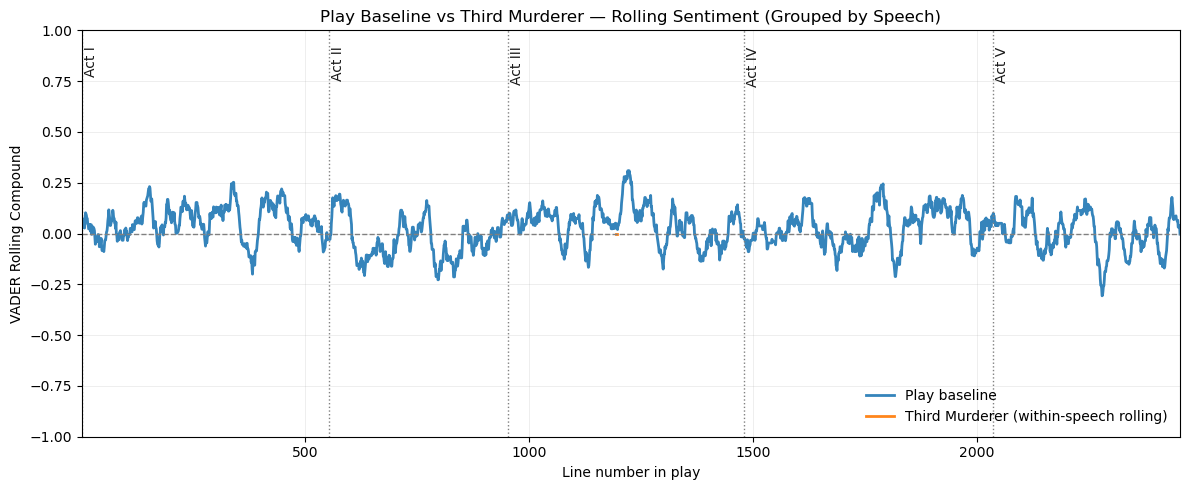

In [936]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in third_murderer_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Third Murderer (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Third Murderer — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Crowned Child Spirit (Spirit #3) Lines and VADER Analysis

In [937]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_SPIRITS.3.html"

In [938]:
response = requests.get(url)
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nBe lion-mettled, proud, and take no care<br/>\r\nWho chafes, who frets, or where conspirers are.<br/>\r\nMacbeth shall never vanquished be until<br/>\r\nGreat Birnam Wood to high Dunsinane Hill<br/>\r\nShall come against him.<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [939]:
spirit_3_crowned_child_soup = BS(response.text, "html.parser")
spirit_3_crowned_child_lines = spirit_3_crowned_child_soup.get_text()

In [940]:
spirit_3_crowned_child_lines = spirit_3_crowned_child_lines.splitlines()
spirit_3_crowned_child_lines = [ln.strip() for ln in spirit_3_crowned_child_lines if ln.strip()]

In [941]:
spirit_3_crowned_child_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(spirit_3_crowned_child_lines)].copy()
spirit_3_crowned_child_lines_df = spirit_3_crowned_child_lines_df.reset_index(drop=True)

In [942]:
spirit_3_crowned_child_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)
spirit_3_crowned_child_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [943]:
spirit_3_crowned_child_lines_df = spirit_3_crowned_child_lines_df.rename(columns={
    'play_neg': 'neg',
    'play_neu': 'neu',
    'play_pos': 'pos',
    'play_vader_label': 'vader_label',
    'play_compound': 'compound'
})

In [944]:
spirit_3_crowned_child_lines_df.head()

line_number                                             text  act  scene  \
0         1581         Be lion-mettled, proud, and take no care    4      1   
1         1582  Who chafes, who frets, or where conspirers are.    4      1   
2         1583          Macbeth shall never vanquished be until    4      1   
3         1584         Great Birnam Wood to high Dunsinane Hill    4      1   
4         1585                          Shall come against him.    4      1   

   scene_id       act_scene    neg    neu    pos  compound vader_label  
0        18  Act 4, Scene 1  0.245  0.466  0.289    0.1210         pos  
1        18  Act 4, Scene 1  0.000  1.000  0.000    0.0000         neu  
2        18  Act 4, Scene 1  0.000  1.000  0.000    0.0000         neu  
3        18  Act 4, Scene 1  0.000  0.594  0.406    0.6249         pos  
4        18  Act 4, Scene 1  0.000  1.000  0.000    0.0000         neu

In [945]:
spirit_3_crowned_child_lines_df['rolling_compound'] = (
    spirit_3_crowned_child_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [946]:
spirit_3_crowned_child_lines_df['rolling_intensity'] = (
    spirit_3_crowned_child_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [947]:
spirit_3_crowned_child_lines_df['rolling_volatility'] = (
    spirit_3_crowned_child_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [948]:
spirit_3_crowned_child_lines_df['speech_id'] = (spirit_3_crowned_child_lines_df['line_number'].diff().gt(1)).cumsum()

In [949]:
spirit_3_crowned_child_lines_df['weighted_compound'] = (
    spirit_3_crowned_child_lines_df['compound'] * spirit_3_crowned_child_lines_df['compound'].abs()
)

In [950]:
spirit_3_crowned_child_lines_df['rolling_weighted'] = (
    spirit_3_crowned_child_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [951]:
spirit_3_crowned_child_lines_df['is_pos'] = (spirit_3_crowned_child_lines_df['vader_label'] == 'pos').astype(int)
spirit_3_crowned_child_lines_df['is_neg'] = (spirit_3_crowned_child_lines_df['vader_label'] == 'neg').astype(int)

In [952]:
spirit_3_crowned_child_lines_df['roll_pos_minus_neg'] = (
    spirit_3_crowned_child_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - spirit_3_crowned_child_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [953]:
sentiment_difference = spirit_3_crowned_child_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [954]:
spirit_3_crowned_child_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [955]:
spirit_3_crowned_child_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [956]:
spirit_3_crowned_child_lines_df['rolling_within_speech'] = (
    spirit_3_crowned_child_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [957]:
spirit_3_crowned_child_lines_df.insert(1, 'speaker', 'Spirit 3: Crowned Child')

In [958]:
spirit_3_crowned_child_lines_df.head(1)

line_number                  speaker  \
0         1581  Spirit 3: Crowned Child   

                                       text  act  scene  scene_id  \
0  Be lion-mettled, proud, and take no care    4      1        18   

        act_scene    neg    neu    pos  ...  rolling_volatility speech_id  \
0  Act 4, Scene 1  0.245  0.466  0.289  ...            0.069859         0   

   weighted_compound  rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  \
0           0.014641          0.081028       1       0                 0.4   

   diff_vs_play_w21  diff_vs_play_w11  rolling_within_speech  
0          0.120256          0.030144                  0.121  

[1 rows x 24 columns]

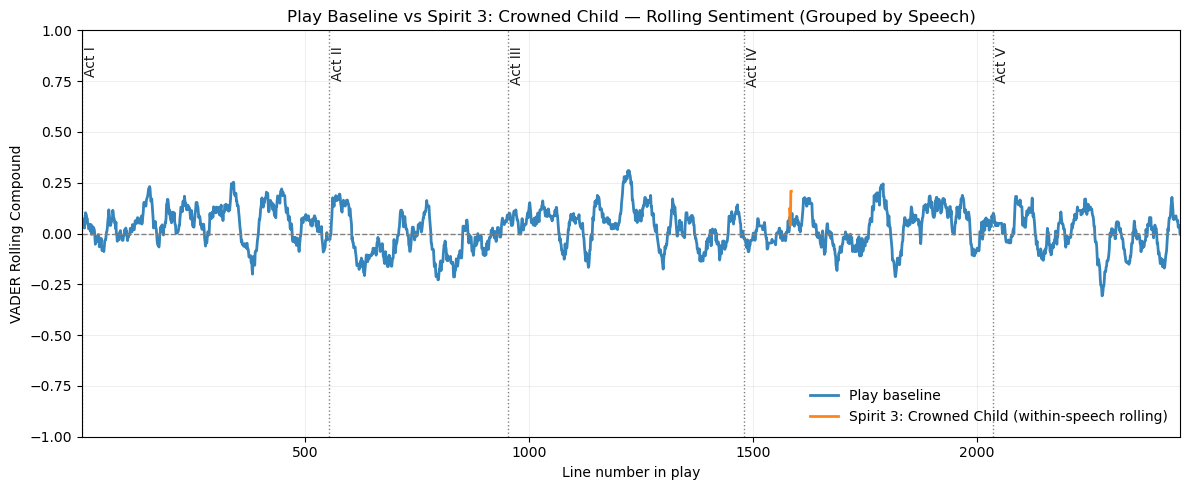

In [959]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in spirit_3_crowned_child_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Spirit 3: Crowned Child (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Spirit 3: Crowned Child — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Seyton's Lines and VADER Analysis

In [960]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Seyton.html"

In [961]:
response = requests.get(url)
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nWhat’s your gracious pleasure?<br/>\r\nAll is confirmed, my lord, which was reported.<br/>\r\n’Tis not needed yet.<br/>\r\nIt is the cry of women, my good lord.<br/>\r\nThe Queen, my lord, is dead.<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [962]:
seyton_soup = BS(response.text, "html.parser")
seyton_lines = seyton_soup.get_text()

In [963]:
seyton_lines = seyton_lines.splitlines()
seyton_lines = [ln.strip() for ln in seyton_lines if ln.strip()]

In [964]:
seyton_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(seyton_lines)].copy()
seyton_lines_df = seyton_lines_df.reset_index(drop=True)

In [965]:
seyton_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)
seyton_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [966]:
seyton_lines_df = seyton_lines_df.rename(columns={
    'play_neg': 'neg',
    'play_neu': 'neu',
    'play_pos': 'pos',
    'play_vader_label': 'vader_label',
    'play_compound': 'compound'
})

In [967]:
seyton_lines_df.head()

line_number                                            text  act  scene  \
0         2191                  What’s your gracious pleasure?    5      3   
1         2193  All is confirmed, my lord, which was reported.    5      3   
2         2196                            ’Tis not needed yet.    5      3   
3         2269           It is the cry of women, my good lord.    5      5   
4         2278                    The Queen, my lord, is dead.    5      5   

   scene_id       act_scene    neg    neu    pos  compound vader_label  
0        23  Act 5, Scene 3  0.000  0.215  0.785    0.8074         pos  
1        23  Act 5, Scene 3  0.000  1.000  0.000    0.0000         neu  
2        23  Act 5, Scene 3  0.000  1.000  0.000    0.0000         neu  
3        25  Act 5, Scene 5  0.238  0.538  0.223   -0.0516         neg  
4        25  Act 5, Scene 5  0.462  0.538  0.000   -0.6486         neg

In [968]:
seyton_lines_df['rolling_compound'] = (
    seyton_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [969]:
seyton_lines_df['rolling_intensity'] = (
    seyton_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [970]:
seyton_lines_df['rolling_volatility'] = (
    seyton_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [971]:
seyton_lines_df['speech_id'] = (seyton_lines_df['line_number'].diff().gt(1)).cumsum()

In [972]:
seyton_lines_df['weighted_compound'] = (
    seyton_lines_df['compound'] * seyton_lines_df['compound'].abs()
)

In [973]:
seyton_lines_df['rolling_weighted'] = (
    seyton_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [974]:
seyton_lines_df['is_pos'] = (seyton_lines_df['vader_label'] == 'pos').astype(int)
seyton_lines_df['is_neg'] = (seyton_lines_df['vader_label'] == 'neg').astype(int)

In [975]:
seyton_lines_df['roll_pos_minus_neg'] = (
    seyton_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - seyton_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [976]:
sentiment_difference = seyton_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [977]:
seyton_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [978]:
seyton_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [979]:
seyton_lines_df['rolling_within_speech'] = (
    seyton_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [980]:
seyton_lines_df.insert(1, 'speaker', 'Seyton')

In [981]:
seyton_lines_df.head(1)

line_number speaker                            text  act  scene  scene_id  \
0         2191  Seyton  What’s your gracious pleasure?    5      3        23   

        act_scene  neg    neu    pos  ...  rolling_volatility speech_id  \
0  Act 5, Scene 3  0.0  0.215  0.785  ...            0.466153         0   

   weighted_compound  rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  \
0           0.651895           0.04571       1       0                -0.2   

   diff_vs_play_w21  diff_vs_play_w11  rolling_within_speech  
0          -0.02555          0.014022                 0.8074  

[1 rows x 24 columns]

### Spirit 2: Bloody Child Lines and VADER Analysis

In [982]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_SPIRITS.2.html"

In [983]:
response = requests.get(url)
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nMacbeth! Macbeth! Macbeth!—<br/>\r\nBe bloody, bold, and resolute. Laugh to scorn<br/>\r\nThe power of man, for none of woman born<br/>\r\nShall harm Macbeth.<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [984]:
spirit_2_bloody_child_soup = BS(response.text, "html.parser")
spirit_2_bloody_child_lines = spirit_2_bloody_child_soup.get_text()

In [985]:
spirit_2_bloody_child_lines = spirit_2_bloody_child_lines.splitlines()
spirit_2_bloody_child_lines = [ln.strip() for ln in spirit_2_bloody_child_lines if ln.strip()]

In [986]:
spirit_2_bloody_child_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(spirit_2_bloody_child_lines)].copy()
spirit_2_bloody_child_lines_df = spirit_2_bloody_child_lines_df.reset_index(drop=True)

In [987]:
spirit_2_bloody_child_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)
spirit_2_bloody_child_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [988]:
spirit_2_bloody_child_lines_df = spirit_2_bloody_child_lines_df.rename(columns={
    'play_neg': 'neg',
    'play_neu': 'neu',
    'play_pos': 'pos',
    'play_vader_label': 'vader_label',
    'play_compound': 'compound'
})

In [989]:
spirit_2_bloody_child_lines_df.head()

line_number                                           text  act  scene  \
0         1566                    Macbeth! Macbeth! Macbeth!—    4      1   
1         1568  Be bloody, bold, and resolute. Laugh to scorn    4      1   
2         1569       The power of man, for none of woman born    4      1   
3         1570                            Shall harm Macbeth.    4      1   

   scene_id       act_scene    neg    neu    pos  compound vader_label  
0        18  Act 4, Scene 1  0.000  1.000  0.000    0.0000         neu  
1        18  Act 4, Scene 1  0.331  0.178  0.491    0.4019         pos  
2        18  Act 4, Scene 1  0.000  1.000  0.000    0.0000         neu  
3        18  Act 4, Scene 1  0.636  0.364  0.000   -0.5423         neg

In [990]:
spirit_2_bloody_child_lines_df['rolling_compound'] = (
    spirit_2_bloody_child_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [991]:
spirit_2_bloody_child_lines_df['rolling_intensity'] = (
    spirit_2_bloody_child_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [992]:
spirit_2_bloody_child_lines_df['rolling_volatility'] = (
    spirit_2_bloody_child_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [993]:
spirit_2_bloody_child_lines_df['speech_id'] = (spirit_2_bloody_child_lines_df['line_number'].diff().gt(1)).cumsum()

In [994]:
spirit_2_bloody_child_lines_df['weighted_compound'] = (
    spirit_2_bloody_child_lines_df['compound'] * spirit_2_bloody_child_lines_df['compound'].abs()
)

In [995]:
spirit_2_bloody_child_lines_df['rolling_weighted'] = (
    spirit_2_bloody_child_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [996]:
spirit_2_bloody_child_lines_df['is_pos'] = (spirit_2_bloody_child_lines_df['vader_label'] == 'pos').astype(int)
spirit_2_bloody_child_lines_df['is_neg'] = (spirit_2_bloody_child_lines_df['vader_label'] == 'neg').astype(int)

In [997]:
spirit_2_bloody_child_lines_df['roll_pos_minus_neg'] = (
    spirit_2_bloody_child_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - spirit_2_bloody_child_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [998]:
sentiment_difference = spirit_2_bloody_child_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [999]:
spirit_2_bloody_child_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [1000]:
spirit_2_bloody_child_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [1001]:
spirit_2_bloody_child_lines_df['rolling_within_speech'] = (
    spirit_2_bloody_child_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [1002]:
spirit_2_bloody_child_lines_df.insert(1, 'speaker', 'Spirit 2: Bloody Child')

In [1003]:
spirit_2_bloody_child_lines_df.head(1)

line_number                 speaker                         text  act  \
0         1566  Spirit 2: Bloody Child  Macbeth! Macbeth! Macbeth!—    4   

   scene  scene_id       act_scene  neg  neu  pos  ...  rolling_volatility  \
0      1        18  Act 4, Scene 1  0.0  1.0  0.0  ...            0.232037   

  speech_id  weighted_compound  rolling_weighted  is_pos  is_neg  \
0         0                0.0         -0.033141       0       0   

   roll_pos_minus_neg  diff_vs_play_w21  diff_vs_play_w11  \
0                 0.0         -0.000357         -0.016264   

   rolling_within_speech  
0                    0.0  

[1 rows x 24 columns]

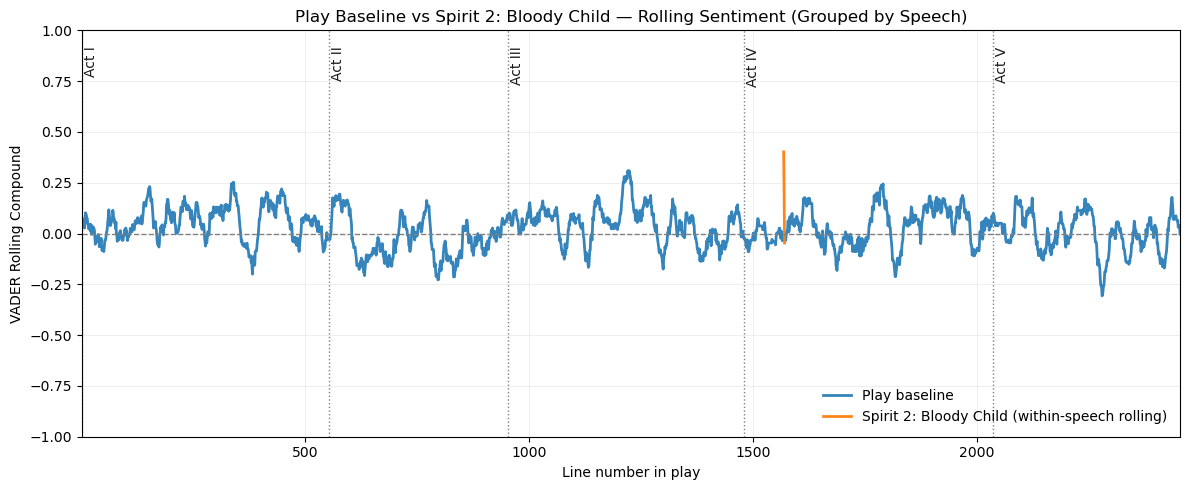

In [1004]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

first = True
for _, g in spirit_2_bloody_child_lines_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Spirit 2: Bloody Child (within-speech rolling)' if first else ""
    )
    first = False

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Spirit 2: Bloody Child — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Attendants Lines and VADER Analysis

In [1005]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_ATTENDANTS.html"

In [1006]:
response = requests.get(url)
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nThanks to your Majesty.<br/>\r\nWhat, my good lord?<br/>\r\nOur duties, and the pledge.<br/>\r\nHail, King of Scotland!<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [1007]:
attendants_soup = BS(response.text, "html.parser")
attendants_lines = attendants_soup.get_text()

In [1008]:
attendants_lines = attendants_lines.splitlines()
attendants_lines = [ln.strip() for ln in attendants_lines if ln.strip()]

In [1009]:
attendants_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(attendants_lines)].copy()
attendants_lines_df = attendants_lines_df.reset_index(drop=True)

In [1010]:
attendants_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)
attendants_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [1011]:
attendants_lines_df = attendants_lines_df.rename(columns={
    'play_neg': 'neg',
    'play_neu': 'neu',
    'play_pos': 'pos',
    'play_vader_label': 'vader_label',
    'play_compound': 'compound'
})

In [1012]:
attendants_lines_df.head()

line_number                         text  act  scene  scene_id  \
0         1213      Thanks to your Majesty.    3      4        15   
1         1270          What, my good lord?    3      4        15   
2         1322  Our duties, and the pledge.    3      4        15   
3         2435      Hail, King of Scotland!    5      8        28   
4         2436      Hail, King of Scotland!    5      8        28   

        act_scene  neg    neu    pos  compound vader_label  
0  Act 3, Scene 4  0.0  0.508  0.492    0.4404         pos  
1  Act 3, Scene 4  0.0  0.508  0.492    0.4404         pos  
2  Act 3, Scene 4  0.0  1.000  0.000    0.0000         neu  
3  Act 5, Scene 8  0.0  0.653  0.347    0.1511         pos  
4  Act 5, Scene 8  0.0  0.653  0.347    0.1511         pos

In [1013]:
attendants_lines_df['rolling_compound'] = (
    attendants_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [1014]:
attendants_lines_df['rolling_intensity'] = (
    attendants_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [1015]:
attendants_lines_df['rolling_volatility'] = (
    attendants_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [1016]:
attendants_lines_df['speech_id'] = (attendants_lines_df['line_number'].diff().gt(1)).cumsum()

In [1017]:
attendants_lines_df['weighted_compound'] = (
    attendants_lines_df['compound'] * attendants_lines_df['compound'].abs()
)

In [1018]:
attendants_lines_df['rolling_weighted'] = (
    attendants_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [1019]:
attendants_lines_df['is_pos'] = (attendants_lines_df['vader_label'] == 'pos').astype(int)
attendants_lines_df['is_neg'] = (attendants_lines_df['vader_label'] == 'neg').astype(int)

In [1020]:
attendants_lines_df['roll_pos_minus_neg'] = (
    attendants_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - attendants_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [1021]:
sentiment_difference = attendants_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [1022]:
attendants_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [1023]:
attendants_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [1024]:
attendants_lines_df['rolling_within_speech'] = (
    attendants_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [1025]:
attendants_lines_df.insert(1, 'speaker', 'Attendants')

In [1026]:
attendants_lines_df.head(1)

line_number     speaker                     text  act  scene  scene_id  \
0         1213  Attendants  Thanks to your Majesty.    3      4        15   

        act_scene  neg    neu    pos  ...  rolling_volatility speech_id  \
0  Act 3, Scene 4  0.0  0.508  0.492  ...            0.254265         0   

   weighted_compound  rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  \
0           0.193952          0.086713       1       0                 0.8   

   diff_vs_play_w21  diff_vs_play_w11  rolling_within_speech  
0          -0.01761         -0.096727                 0.4404  

[1 rows x 24 columns]

### Fleance's Lines and VADER Analysis

In [1027]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Fleance.html"

In [1028]:
response = requests.get(url)
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nThe moon is down. I have not heard the clock.<br/>\r\nI take ’t ’tis later, sir.<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [1029]:
fleance_soup = BS(response.text, "html.parser")
fleance_lines = fleance_soup.get_text()

In [1030]:
fleance_lines = fleance_lines.splitlines()
fleance_lines = [ln.strip() for ln in fleance_lines if ln.strip()]

In [1031]:
fleance_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(fleance_lines)].copy()
fleance_lines_df = fleance_lines_df.reset_index(drop=True)

In [1032]:
fleance_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)
fleance_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [1033]:
fleance_lines_df = fleance_lines_df.rename(columns={
    'play_neg': 'neg',
    'play_neu': 'neu',
    'play_pos': 'pos',
    'play_vader_label': 'vader_label',
    'play_compound': 'compound'
})

In [1034]:
fleance_lines_df.head()

line_number                                           text  act  scene  \
0          554  The moon is down. I have not heard the clock.    2      1   
1          556                     I take ’t ’tis later, sir.    2      1   

   scene_id       act_scene  neg  neu  pos  compound vader_label  
0         8  Act 2, Scene 1  0.0  1.0  0.0       0.0         neu  
1         8  Act 2, Scene 1  0.0  1.0  0.0       0.0         neu

In [1035]:
fleance_lines_df['rolling_compound'] = (
    fleance_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [1036]:
fleance_lines_df['rolling_intensity'] = (
    fleance_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [1037]:
fleance_lines_df['rolling_volatility'] = (
    fleance_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [1038]:
fleance_lines_df['speech_id'] = (fleance_lines_df['line_number'].diff().gt(1)).cumsum()

In [1039]:
fleance_lines_df['weighted_compound'] = (
    fleance_lines_df['compound'] * fleance_lines_df['compound'].abs()
)

In [1040]:
fleance_lines_df['rolling_weighted'] = (
    fleance_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [1041]:
fleance_lines_df['is_pos'] = (fleance_lines_df['vader_label'] == 'pos').astype(int)
fleance_lines_df['is_neg'] = (fleance_lines_df['vader_label'] == 'neg').astype(int)

In [1042]:
fleance_lines_df['roll_pos_minus_neg'] = (
    fleance_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - fleance_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [1043]:
sentiment_difference = fleance_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [1044]:
fleance_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [1045]:
fleance_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [1046]:
fleance_lines_df['rolling_within_speech'] = (
    fleance_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [1047]:
fleance_lines_df.insert(1, 'speaker', 'Fleance')

In [1048]:
fleance_lines_df.head(1)

line_number  speaker                                           text  act  \
0          554  Fleance  The moon is down. I have not heard the clock.    2   

   scene  scene_id       act_scene  neg  neu  pos  ...  rolling_volatility  \
0      1         8  Act 2, Scene 1  0.0  1.0  0.0  ...                 0.0   

  speech_id  weighted_compound  rolling_weighted  is_pos  is_neg  \
0         0                0.0               0.0       0       0   

   roll_pos_minus_neg  diff_vs_play_w21  diff_vs_play_w11  \
0                 0.0          0.028867           -0.0064   

   rolling_within_speech  
0                    0.0  

[1 rows x 24 columns]

### Murderer's (Those That Killed Lady Macduff and Her Son) Lines and VADER Analysis

In [1049]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_MURDERERS.0.1.html"

In [1050]:
response = requests.get(url)
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nWhere is your husband?<br/>\r\nHe’s a traitor.<br/>\r\nWhat, you egg?<br/>\r\nYoung fry of treachery!<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [1051]:
murderers_soup = BS(response.text, "html.parser")
murderers_lines = murderers_soup.get_text()

In [1052]:
murderers_lines = murderers_lines.splitlines()
murderers_lines = [ln.strip() for ln in murderers_lines if ln.strip()]

In [1053]:
murderers_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(murderers_lines)].copy()
murderers_lines_df = murderers_lines_df.reset_index(drop=True)

In [1054]:
murderers_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)
murderers_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [1055]:
murderers_lines_df = murderers_lines_df.rename(columns={
    'play_neg': 'neg',
    'play_neu': 'neu',
    'play_pos': 'pos',
    'play_vader_label': 'vader_label',
    'play_compound': 'compound'
})

In [1056]:
murderers_lines_df.head()

line_number                     text  act  scene  scene_id       act_scene  \
0         1744   Where is your husband?    4      2        19  Act 4, Scene 2   
1         1747          He’s a traitor.    4      2        19  Act 4, Scene 2   
2         1749           What, you egg?    4      2        19  Act 4, Scene 2   
3         1750  Young fry of treachery!    4      2        19  Act 4, Scene 2   

   neg  neu  pos  compound vader_label  
0  0.0  1.0  0.0       0.0         neu  
1  0.0  1.0  0.0       0.0         neu  
2  0.0  1.0  0.0       0.0         neu  
3  0.0  1.0  0.0       0.0         neu

In [1057]:
murderers_lines_df['rolling_compound'] = (
    murderers_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [1058]:
murderers_lines_df['rolling_intensity'] = (
    murderers_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [1059]:
murderers_lines_df['rolling_volatility'] = (
    murderers_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [1060]:
murderers_lines_df['speech_id'] = (murderers_lines_df['line_number'].diff().gt(1)).cumsum()

In [1061]:
murderers_lines_df['weighted_compound'] = (
    murderers_lines_df['compound'] * murderers_lines_df['compound'].abs()
)

In [1062]:
murderers_lines_df['rolling_weighted'] = (
    murderers_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [1063]:
murderers_lines_df['is_pos'] = (murderers_lines_df['vader_label'] == 'pos').astype(int)
murderers_lines_df['is_neg'] = (murderers_lines_df['vader_label'] == 'neg').astype(int)

In [1064]:
murderers_lines_df['roll_pos_minus_neg'] = (
    murderers_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - murderers_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [1065]:
sentiment_difference = murderers_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [1066]:
murderers_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [1067]:
murderers_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [1068]:
murderers_lines_df['rolling_within_speech'] = (
    murderers_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [1069]:
murderers_lines_df.insert(1, 'speaker', 'Murderers')

In [1070]:
murderers_lines_df.head(1)

line_number    speaker                    text  act  scene  scene_id  \
0         1744  Murderers  Where is your husband?    4      2        19   

        act_scene  neg  neu  pos  ...  rolling_volatility speech_id  \
0  Act 4, Scene 2  0.0  1.0  0.0  ...                 0.0         0   

   weighted_compound  rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  \
0                0.0               0.0       0       0                 0.0   

   diff_vs_play_w21  diff_vs_play_w11  rolling_within_speech  
0           0.04839          0.005264                    0.0  

[1 rows x 24 columns]

### Spirit 1: Armed Head Lines and VADER Analysis

In [1071]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_SPIRITS.1.html"

In [1072]:
response = requests.get(url)
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nMacbeth! Macbeth! Macbeth! Beware Macduff!<br/>\r\nBeware the Thane of Fife! Dismiss me. Enough.<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [1073]:
spirit_1_armed_head_soup = BS(response.text, "html.parser")
spirit_1_armed_head_lines = spirit_1_armed_head_soup.get_text()

In [1074]:
spirit_1_armed_head_lines = spirit_1_armed_head_lines.splitlines()
spirit_1_armed_head_lines = [ln.strip() for ln in spirit_1_armed_head_lines if ln.strip()]

In [1075]:
spirit_1_armed_head_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(spirit_1_armed_head_lines)].copy()
spirit_1_armed_head_lines_df = spirit_1_armed_head_lines_df.reset_index(drop=True)

In [1076]:
spirit_1_armed_head_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)
spirit_1_armed_head_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [1077]:
spirit_1_armed_head_lines_df = spirit_1_armed_head_lines_df.rename(columns={
    'play_neg': 'neg',
    'play_neu': 'neu',
    'play_pos': 'pos',
    'play_vader_label': 'vader_label',
    'play_compound': 'compound'
})

In [1078]:
spirit_1_armed_head_lines_df.head()

line_number                                           text  act  scene  \
0         1559     Macbeth! Macbeth! Macbeth! Beware Macduff!    4      1   
1         1560  Beware the Thane of Fife! Dismiss me. Enough.    4      1   

   scene_id       act_scene  neg  neu  pos  compound vader_label  
0        18  Act 4, Scene 1  0.0  1.0  0.0       0.0         neu  
1        18  Act 4, Scene 1  0.0  1.0  0.0       0.0         neu

In [1079]:
spirit_1_armed_head_lines_df['rolling_compound'] = (
    spirit_1_armed_head_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [1080]:
spirit_1_armed_head_lines_df['rolling_intensity'] = (
    spirit_1_armed_head_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)


In [1081]:
spirit_1_armed_head_lines_df['rolling_volatility'] = (
    spirit_1_armed_head_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [1082]:
spirit_1_armed_head_lines_df['speech_id'] = (spirit_1_armed_head_lines_df['line_number'].diff().gt(1)).cumsum()

In [1083]:
spirit_1_armed_head_lines_df['weighted_compound'] = (
    spirit_1_armed_head_lines_df['compound'] * spirit_1_armed_head_lines_df['compound'].abs()
)

In [1084]:
spirit_1_armed_head_lines_df['rolling_weighted'] = (
    spirit_1_armed_head_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [1085]:
spirit_1_armed_head_lines_df['is_pos'] = (spirit_1_armed_head_lines_df['vader_label'] == 'pos').astype(int)
spirit_1_armed_head_lines_df['is_neg'] = (spirit_1_armed_head_lines_df['vader_label'] == 'neg').astype(int)

In [1086]:
spirit_1_armed_head_lines_df['roll_pos_minus_neg'] = (
    spirit_1_armed_head_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - spirit_1_armed_head_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [1087]:
sentiment_difference = spirit_1_armed_head_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [1088]:
spirit_1_armed_head_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [1089]:
spirit_1_armed_head_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [1090]:
spirit_1_armed_head_lines_df['rolling_within_speech'] = (
    spirit_1_armed_head_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [1091]:
spirit_1_armed_head_lines_df.insert(1, 'speaker', 'Spirit 1: Armed Head')

In [1092]:
spirit_1_armed_head_lines_df.head(1)

line_number               speaker  \
0         1559  Spirit 1: Armed Head   

                                         text  act  scene  scene_id  \
0  Macbeth! Macbeth! Macbeth! Beware Macduff!    4      1        18   

        act_scene  neg  neu  pos  ...  rolling_volatility speech_id  \
0  Act 4, Scene 1  0.0  1.0  0.0  ...                 0.0         0   

   weighted_compound  rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  \
0                0.0               0.0       0       0                 0.0   

   diff_vs_play_w21  diff_vs_play_w11  rolling_within_speech  
0         -0.026467         -0.038827                    0.0  

[1 rows x 24 columns]

### Messenger Lines and VADER Analysis

In [1093]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_MESSENGERS.1.html"

In [1094]:
response = requests.get(url)
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nThe King comes here tonight.<br/>\r\nSo please you, it is true. Our thane is coming.<br/>\r\nOne of my fellows had the speed of him,<br/>\r\nWho, almost dead for breath, had scarcely more<br/>\r\nThan would make up his message.<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [1095]:
messengera_soup = BS(response.text, "html.parser")
messengera_lines = messengera_soup.get_text()

In [1096]:
messengera_lines = messengera_lines.splitlines()
messengera_lines = [ln.strip() for ln in messengera_lines if ln.strip()]

In [1097]:
messengera_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(messengera_lines)].copy()
messengera_lines_df = messengera_lines_df.reset_index(drop=True)

In [1098]:
messengera_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)
messengera_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [1099]:
messengera_lines_df = messengera_lines_df.rename(columns={
    'play_neg': 'neg',
    'play_neu': 'neu',
    'play_pos': 'pos',
    'play_vader_label': 'vader_label',
    'play_compound': 'compound'
})

In [1100]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_MESSENGERS.2.html"

In [1101]:
response = requests.get(url)
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nBless you, fair dame. I am not to you known,<br/>\r\nThough in your state of honor I am perfect.<br/>\r\nI doubt some danger does approach you nearly.<br/>\r\nIf you will take a homely man’s advice,<br/>\r\nBe not found here. Hence with your little ones!<br/>\r\nTo fright you thus methinks I am too savage;<br/>\r\nTo do worse to you were fell cruelty,<br/>\r\nWhich is too nigh your person. Heaven preserve you!<br/>\r\nI dare abide no longer.<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [1102]:
messengerb_soup = BS(response.text, "html.parser")
messengerb_lines = messengerb_soup.get_text()

In [1103]:
messengerb_lines = messengerb_lines.splitlines()
messengerb_lines = [ln.strip() for ln in messengerb_lines if ln.strip()]

In [1104]:
messengerb_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(messengerb_lines)].copy()
messengerb_lines_df = messengerb_lines_df.reset_index(drop=True)

In [1105]:
messengerb_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)
messengerb_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [1106]:
messengerb_lines_df = messengerb_lines_df.rename(columns={
    'play_neg': 'neg',
    'play_neu': 'neu',
    'play_pos': 'pos',
    'play_vader_label': 'vader_label',
    'play_compound': 'compound'
})

In [1107]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_MESSENGERS.3.html"

In [1108]:
response = requests.get(url)
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nGracious my lord,<br/>\r\nI should report that which I say I saw,<br/>\r\nBut know not how to do ’t.<br/>\r\nAs I did stand my watch upon the hill,<br/>\r\nI looked toward Birnam, and anon methought<br/>\r\nThe Wood began to move.<br/>\r\nLet me endure your wrath if ’t be not so.<br/>\r\nWithin this three mile may you see it coming.<br/>\r\nI say, a moving grove.<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [1109]:
messengerc_soup = BS(response.text, "html.parser")
messengerc_lines = messengerc_soup.get_text()

In [1110]:
messengerc_lines = messengerc_lines.splitlines()
messengerc_lines = [ln.strip() for ln in messengerc_lines if ln.strip()]

In [1111]:
messengerc_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(messengerc_lines)].copy()
messengerc_lines_df = messengerc_lines_df.reset_index(drop=True)

In [1112]:
messengerc_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)
messengerc_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [1113]:
messengerc_lines_df = messengerc_lines_df.rename(columns={
    'play_neg': 'neg',
    'play_neu': 'neu',
    'play_pos': 'pos',
    'play_vader_label': 'vader_label',
    'play_compound': 'compound'
})

In [1114]:
messenger_lines_df = pd.concat(
    [messengera_lines_df, messengerb_lines_df, messengerc_lines_df],
    ignore_index=True
)

In [1115]:
messenger_lines_df.head()

line_number                                             text  act  scene  \
0          366                     The King comes here tonight.    1      5   
1          370  So please you, it is true. Our thane is coming.    1      5   
2          371          One of my fellows had the speed of him,    1      5   
3          372   Who, almost dead for breath, had scarcely more    1      5   
4          373                  Than would make up his message.    1      5   

   scene_id       act_scene    neg    neu    pos  compound vader_label  
0         5  Act 1, Scene 5  0.000  1.000  0.000    0.0000         neu  
1         5  Act 1, Scene 5  0.000  0.597  0.403    0.6590         pos  
2         5  Act 1, Scene 5  0.000  1.000  0.000    0.0000         neu  
3         5  Act 1, Scene 5  0.364  0.636  0.000   -0.6133         neg  
4         5  Act 1, Scene 5  0.000  1.000  0.000    0.0000         neu

In [1116]:
messenger_lines_df['rolling_compound'] = (
    messenger_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [1117]:
messenger_lines_df['rolling_intensity'] = (
    messenger_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [1118]:
messenger_lines_df['rolling_volatility'] = (
    messenger_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [1119]:
messenger_lines_df['speech_id'] = (messenger_lines_df['line_number'].diff().gt(1)).cumsum()

In [1120]:
messenger_lines_df['weighted_compound'] = (
    messenger_lines_df['compound'] * messenger_lines_df['compound'].abs()
)

In [1121]:
messenger_lines_df['rolling_weighted'] = (
    messenger_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [1122]:
messenger_lines_df['is_pos'] = (messenger_lines_df['vader_label'] == 'pos').astype(int)
messenger_lines_df['is_neg'] = (messenger_lines_df['vader_label'] == 'neg').astype(int)

In [1123]:
messenger_lines_df['roll_pos_minus_neg'] = (
    messenger_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - messenger_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [1124]:
sentiment_difference = messenger_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [1125]:
messenger_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [1126]:
messenger_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [1127]:
messenger_lines_df['rolling_within_speech'] = (
    messenger_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [1128]:
messenger_lines_df.insert(1, 'speaker', 'Messenger')

In [1129]:
messenger_lines_df.head(1)

line_number    speaker                          text  act  scene  scene_id  \
0          366  Messenger  The King comes here tonight.    1      5         5   

        act_scene  neg  neu  pos  ...  rolling_volatility speech_id  \
0  Act 1, Scene 5  0.0  1.0  0.0  ...            0.380474         0   

   weighted_compound  rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  \
0                0.0          0.074774       0       0            0.166667   

   diff_vs_play_w21  diff_vs_play_w11  rolling_within_speech  
0          0.171833          0.146058                    0.0  

[1 rows x 24 columns]

### Servants Lines and VADER Analysis

In [1130]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_SERVANTS.X.2.html"

In [1131]:
response = requests.get(url)
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nThey are, my lord, without the palace gate.<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [1132]:
servanta_soup = BS(response.text, "html.parser")
servanta_lines = servanta_soup.get_text()

In [1133]:
servanta_lines = servanta_lines.splitlines()
servanta_lines = [ln.strip() for ln in servanta_lines if ln.strip()]

In [1134]:
servanta_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(servanta_lines)].copy()
servanta_lines_df = servanta_lines_df.reset_index(drop=True)

In [1135]:
servanta_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)
servanta_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [1136]:
servanta_lines_df = servanta_lines_df.rename(columns={
    'play_neg': 'neg',
    'play_neu': 'neu',
    'play_pos': 'pos',
    'play_vader_label': 'vader_label',
    'play_compound': 'compound'
})

In [1137]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_SERVANTS.X.3.html"

In [1138]:
response = requests.get(url)
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nAy, madam, but returns again tonight.<br/>\r\nMadam, I will.<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [1139]:
servantb_soup = BS(response.text, "html.parser")
servantb_lines = servantb_soup.get_text()

In [1140]:
servantb_lines = servantb_lines.splitlines()
servantb_lines = [ln.strip() for ln in servantb_lines if ln.strip()]

In [1141]:
servantb_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(servantb_lines)].copy()
servantb_lines_df = servantb_lines_df.reset_index(drop=True)

In [1142]:
servantb_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)
servantb_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [1143]:
servantb_lines_df = servantb_lines_df.rename(columns={
    'play_neg': 'neg',
    'play_neu': 'neu',
    'play_pos': 'pos',
    'play_vader_label': 'vader_label',
    'play_compound': 'compound'
})

In [1144]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_SERVANTS.X.4.html"

In [1145]:
response = requests.get(url)
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nThere is ten thousand—<br/>\r\nSoldiers, sir.<br/>\r\nThe English force, so please you.<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [1146]:
servantc_soup = BS(response.text, "html.parser")
servantc_lines = servantc_soup.get_text()

In [1147]:
servantc_lines = servantc_lines.splitlines()
servantc_lines = [ln.strip() for ln in servantc_lines if ln.strip()]

In [1148]:
servantc_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(servantc_lines)].copy()
servantc_lines_df = servantc_lines_df.reset_index(drop=True)

In [1149]:
servantc_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)
servantc_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [1150]:
servantc_lines_df = servantc_lines_df.rename(columns={
    'play_neg': 'neg',
    'play_neu': 'neu',
    'play_pos': 'pos',
    'play_vader_label': 'vader_label',
    'play_compound': 'compound'
})

In [1151]:
servants_lines_df = pd.concat(
    [servanta_lines_df, servantb_lines_df, servantc_lines_df],
    ignore_index=True
)

In [1152]:
servants_lines_df

line_number                                         text  act  scene  \
0         1002  They are, my lord, without the palace gate.    3      1   
1         1116        Ay, madam, but returns again tonight.    3      2   
2         1119                               Madam, I will.    3      2   
3         2170                       There is ten thousand—    5      3   
4         2172                               Soldiers, sir.    5      3   
5         2177            The English force, so please you.    5      3   

   scene_id       act_scene  neg    neu    pos  compound vader_label  
0        12  Act 3, Scene 1  0.0  1.000  0.000    0.0000         neu  
1        13  Act 3, Scene 2  0.0  1.000  0.000    0.0000         neu  
2        13  Act 3, Scene 2  0.0  1.000  0.000    0.0000         neu  
3        23  Act 5, Scene 3  0.0  1.000  0.000    0.0000         neu  
4        23  Act 5, Scene 3  0.0  1.000  0.000    0.0000         neu  
5        23  Act 5, Scene 3  0.0  0.626  0.374    0.4572         pos

In [1153]:
servants_lines_df['rolling_compound'] = (
    servants_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [1154]:
servants_lines_df['rolling_intensity'] = (
    servants_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [1155]:
servants_lines_df['rolling_volatility'] = (
    servants_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [1156]:
servants_lines_df['speech_id'] = (servants_lines_df['line_number'].diff().gt(1)).cumsum()

In [1157]:
servants_lines_df['weighted_compound'] = (
    servants_lines_df['compound'] * servants_lines_df['compound'].abs()
)

In [1158]:
servants_lines_df['rolling_weighted'] = (
    servants_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [1159]:
servants_lines_df['is_pos'] = (servants_lines_df['vader_label'] == 'pos').astype(int)
servants_lines_df['is_neg'] = (servants_lines_df['vader_label'] == 'neg').astype(int)

In [1160]:
servants_lines_df['roll_pos_minus_neg'] = (
    servants_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - servants_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [1161]:
sentiment_difference = servants_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [1162]:
servants_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [1163]:
servants_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [1164]:
servants_lines_df['rolling_within_speech'] = (
    servants_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [1165]:
servants_lines_df.insert(1, 'speaker', 'Servant')

In [1166]:
servants_lines_df

line_number  speaker                                         text  act  \
0         1002  Servant  They are, my lord, without the palace gate.    3   
1         1116  Servant        Ay, madam, but returns again tonight.    3   
2         1119  Servant                               Madam, I will.    3   
3         2170  Servant                       There is ten thousand—    5   
4         2172  Servant                               Soldiers, sir.    5   
5         2177  Servant            The English force, so please you.    5   

   scene  scene_id       act_scene  neg    neu    pos  ...  \
0      1        12  Act 3, Scene 1  0.0  1.000  0.000  ...   
1      2        13  Act 3, Scene 2  0.0  1.000  0.000  ...   
2      2        13  Act 3, Scene 2  0.0  1.000  0.000  ...   
3      3        23  Act 5, Scene 3  0.0  1.000  0.000  ...   
4      3        23  Act 5, Scene 3  0.0  1.000  0.000  ...   
5      3        23  Act 5, Scene 3  0.0  0.626  0.374  ...   

   rolling_volatility speech_id  weighted_compound  rolling_weighted  is_pos  \
0            0.000000         0           0.000000          0.034839       0   
1            0.000000         1           0.000000          0.034839       0   
2            0.000000         2           0.000000          0.034839       0   
3            0.204466         3           0.000000          0.034839       0   
4            0.228600         4           0.000000          0.034839       0   
5            0.263965         5           0.209032          0.034839       1   

   is_neg  roll_pos_minus_neg  diff_vs_play_w21  diff_vs_play_w11  \
0       0            0.166667         -0.052167          0.011136   
1       0            0.166667          0.050814         -0.043500   
2       0            0.166667          0.025400          0.050536   
3       0            0.166667          0.146167          0.204018   
4       0            0.166667          0.121852          0.265255   
5       0            0.166667          0.094595          0.126082   

   rolling_within_speech  
0                 0.0000  
1                 0.0000  
2                 0.0000  
3                 0.0000  
4                 0.0000  
5                 0.4572  

[6 rows x 24 columns]

### Soldier Lines and VADAR Lines

In [1167]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_SOLDIERS.MALCOLM.0.1.html"

In [1168]:
response = requests.get(url)
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\nIt shall be done.<br/>\r\nHail, King of Scotland!<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [1169]:
soldiera_soup = BS(response.text, "html.parser")
soldiera_lines = soldiera_soup.get_text()

In [1170]:
soldiera_lines = soldiera_lines.splitlines()
soldiera_lines = [ln.strip() for ln in soldiera_lines if ln.strip()]

In [1171]:
soldiera_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(soldiera_lines)].copy()
soldiera_lines_df = soldiera_lines_df.reset_index(drop=True)

In [1172]:
soldiera_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)
soldiera_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [1173]:
soldiera_lines_df = soldiera_lines_df.rename(columns={
    'play_neg': 'neg',
    'play_neu': 'neu',
    'play_pos': 'pos',
    'play_vader_label': 'vader_label',
    'play_compound': 'compound'
})

In [1174]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_SOLDIERS.MALCOLM.html"

In [1175]:
response = requests.get(url)
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nHail, King of Scotland!<br/>\r\n\r\n</body>\r\n</html>\r\n"

In [1176]:
soldierb_soup = BS(response.text, "html.parser")
soldierb_lines = soldierb_soup.get_text()

In [1177]:
soldierb_lines = soldierb_lines.splitlines()
soldierb_lines = [ln.strip() for ln in soldierb_lines if ln.strip()]

In [1178]:
soldierb_lines_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(soldierb_lines)].copy()
soldierb_lines_df = soldierb_lines_df.reset_index(drop=True)

In [1179]:
soldierb_lines_df.drop(columns='play_rolling_compound_wide', inplace=True)
soldierb_lines_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [1180]:
soldierb_lines_df = soldierb_lines_df.rename(columns={
    'play_neg': 'neg',
    'play_neu': 'neu',
    'play_pos': 'pos',
    'play_vader_label': 'vader_label',
    'play_compound': 'compound'
})

In [1181]:
soldiers_lines_df = pd.concat(
    [soldiera_lines_df, soldierb_lines_df],
    ignore_index=True
)

In [1182]:
soldiers_lines_df = (
    pd.concat([soldiera_lines_df, soldierb_lines_df], ignore_index=True)
      .sort_values('line_number')
      .drop_duplicates(subset=['line_number', 'text'], keep='first')
      .reset_index(drop=True)
)

In [1183]:
soldiers_lines_df

line_number                     text  act  scene  scene_id       act_scene  \
0         2242        It shall be done.    5      4        24  Act 5, Scene 4   
1         2435  Hail, King of Scotland!    5      8        28  Act 5, Scene 8   
2         2436  Hail, King of Scotland!    5      8        28  Act 5, Scene 8   

   neg    neu    pos  compound vader_label  
0  0.0  1.000  0.000    0.0000         neu  
1  0.0  0.653  0.347    0.1511         pos  
2  0.0  0.653  0.347    0.1511         pos

In [1184]:
soldiers_lines_df['rolling_compound'] = (
    soldiers_lines_df['compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [1185]:
soldiers_lines_df['rolling_intensity'] = (
    soldiers_lines_df['compound'].abs().rolling(window=5, center=True, min_periods=1).mean()
)

In [1186]:
soldiers_lines_df['rolling_volatility'] = (
    soldiers_lines_df['compound'].rolling(window=5, center=True, min_periods=1).std()
)

In [1187]:
soldiers_lines_df['speech_id'] = (soldiers_lines_df['line_number'].diff().gt(1)).cumsum()

In [1188]:
soldiers_lines_df['weighted_compound'] = (
    soldiers_lines_df['compound'] * soldiers_lines_df['compound'].abs()
)

In [1189]:
soldiers_lines_df['rolling_weighted'] = (
    soldiers_lines_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [1190]:
soldiers_lines_df['is_pos'] = (soldiers_lines_df['vader_label'] == 'pos').astype(int)
soldiers_lines_df['is_neg'] = (soldiers_lines_df['vader_label'] == 'neg').astype(int)

In [1191]:
soldiers_lines_df['roll_pos_minus_neg'] = (
    soldiers_lines_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - soldiers_lines_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [1192]:
sentiment_difference = soldiers_lines_df[['line_number', 'rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [1193]:
soldiers_lines_df['diff_vs_play_w21'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [1194]:
soldiers_lines_df['diff_vs_play_w11'] = (
    sentiment_difference['rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [1195]:
soldiers_lines_df['rolling_within_speech'] = (
    soldiers_lines_df
    .groupby('speech_id')['compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [1196]:
soldiers_lines_df.insert(1, 'speaker', 'Soldier(s)')

In [1197]:
soldiers_lines_df

line_number     speaker                     text  act  scene  scene_id  \
0         2242  Soldier(s)        It shall be done.    5      4        24   
1         2435  Soldier(s)  Hail, King of Scotland!    5      8        28   
2         2436  Soldier(s)  Hail, King of Scotland!    5      8        28   

        act_scene  neg    neu    pos  ...  rolling_volatility speech_id  \
0  Act 5, Scene 4  0.0  1.000  0.000  ...            0.087238         0   
1  Act 5, Scene 8  0.0  0.653  0.347  ...            0.087238         1   
2  Act 5, Scene 8  0.0  0.653  0.347  ...            0.087238         1   

   weighted_compound  rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  \
0           0.000000          0.015221       0       0            0.666667   
1           0.022831          0.015221       1       0            0.666667   
2           0.022831          0.015221       1       0            0.666667   

   diff_vs_play_w21  diff_vs_play_w11  rolling_within_speech  
0          -0.06969         -0.014021                 0.0000  
1          -0.07730         -0.075421                 0.1511  
2          -0.04940         -0.061685                 0.1511  

[3 rows x 24 columns]

In [1198]:
del g

In [1199]:
%whos DataFrame

Variable                          Type         Data/Info
--------------------------------------------------------
angus_lines_df                    DataFrame        line_number speaker  <...>n\n[20 rows x 24 columns]
attendants_lines_df               DataFrame       line_number     speake<...>\n\n[5 rows x 24 columns]
banquo_only_df                    DataFrame         line_number speaker <...>\n[110 rows x 24 columns]
caithness_lines_df                DataFrame        line_number    speake<...>n\n[11 rows x 24 columns]
captain_lines_df                  DataFrame        line_number  speaker <...>n\n[33 rows x 24 columns]
doctor_lines_df                   DataFrame        line_number speaker  <...>n\n[51 rows x 24 columns]
doctora_lines_df                  DataFrame       line_number           <...>0    0.0000         neu  
doctorb_lines_df                  DataFrame        line_number          <...>6    0.4404         pos  
donalbain_lines_df                DataFrame       line_number 

In [1200]:
all_character_VADER_in_play_order_df = pd.concat(
    [angus_lines_df, 
     attendants_lines_df, 
     banquo_only_df, 
     caithness_lines_df, 
     captain_lines_df, 
     doctor_lines_df, 
     donalbain_lines_df, 
     duncan_only_df, 
     first_murderer_lines_df, 
     first_witch_lines_df, 
     fleance_lines_df, 
     gentlewoman_lines_df, 
     hecate_lines_df, 
     lady_macbeth_only_df, 
     lady_macduff_lines_df, 
     lennox_only_df,
     lord_lines_df, 
     macbeth_only_df, 
     macduff_only_df, 
     macduff_son_lines_df, 
     malcolm_only_df, 
     menteith_lines_df, 
     messenger_lines_df, 
     murderers_lines_df, 
     old_man_lines_df, 
     porter_lines_df, 
     ross_only_df,
     second_murderer_lines_df, 
     second_witch_lines_df, 
     servants_lines_df, 
     seyton_lines_df, 
     siward_lines_df, 
     soldiers_lines_df, 
     spirit_1_armed_head_lines_df, 
     spirit_2_bloody_child_lines_df, 
     spirit_3_crowned_child_lines_df, 
     third_murderer_lines_df, 
     third_witch_lines_df, 
     young_siward_lines_df],
    ignore_index=True
)

In [1201]:
all_character_VADER_in_play_order_df

line_number       speaker  \
0             196         Angus   
1             197         Angus   
2             198         Angus   
3             199         Angus   
4             207         Angus   
...           ...           ...   
2288         2337  Young Siward   
2289         2339  Young Siward   
2290         2340  Young Siward   
2291         2342  Young Siward   
2292         2343  Young Siward   

                                               text  act  scene  scene_id  \
0                                       We are sent    1      3         3   
1        To give thee from our royal master thanks,    1      3         3   
2               Only to herald thee into his sight,    1      3         3   
3                                     Not pay thee.    1      3         3   
4                      Who was the Thane lives yet,    1      3         3   
...                                             ...  ...    ...       ...   
2288                           Than any is in hell.    5      7        27   
2289  The devil himself could not pronounce a title    5      7        27   
2290                      More hateful to mine ear.    5      7        27   
2291     Thou liest, abhorrèd tyrant. With my sword    5      7        27   
2292              I’ll prove the lie thou speak’st.    5      7        27   

           act_scene    neg    neu    pos  ...  speech_id weighted_compound  \
0     Act 1, Scene 3  0.000  1.000  0.000  ...          0          0.000000   
1     Act 1, Scene 3  0.000  0.707  0.293  ...          0          0.193952   
2     Act 1, Scene 3  0.000  1.000  0.000  ...          0          0.000000   
3     Act 1, Scene 3  0.000  0.607  0.393  ...          0          0.005806   
4     Act 1, Scene 3  0.000  1.000  0.000  ...          1          0.000000   
...              ...    ...    ...    ...  ...        ...               ...   
2288  Act 5, Scene 7  0.535  0.465  0.000  ...          1         -0.463489   
2289  Act 5, Scene 7  0.386  0.614  0.000  ...          2         -0.435204   
2290  Act 5, Scene 7  0.466  0.534  0.000  ...          2         -0.293006   
2291  Act 5, Scene 7  0.000  1.000  0.000  ...          3          0.000000   
2292  Act 5, Scene 7  0.000  1.000  0.000  ...          3          0.000000   

      rolling_weighted  is_pos  is_neg  roll_pos_minus_neg  diff_vs_play_w21  \
0             0.033293       0       0            0.333333         -0.010052   
1             0.025188       1       0            0.142857         -0.062405   
2             0.042230       0       0            0.250000          0.007885   
3             0.037538       1       0            0.222222          0.016392   
4             0.033784       0       0            0.200000         -0.026298   
...                ...     ...     ...                 ...               ...   
2288         -0.170243       0       1           -0.428571         -0.124124   
2289         -0.170243       0       1           -0.428571         -0.117510   
2290         -0.170243       0       1           -0.428571         -0.126914   
2291         -0.170243       0       0           -0.428571         -0.156524   
2292         -0.198616       0       0           -0.500000         -0.201329   

      diff_vs_play_w11  rolling_within_speech  volatility  
0            -0.050827               0.000000         NaN  
1            -0.134208              -0.340400         NaN  
2            -0.153261              -0.226933         NaN  
3            -0.129183              -0.226933         NaN  
4             0.075958               0.000000         NaN  
...                ...                    ...         ...  
2288         -0.091947              -0.340400         NaN  
2289         -0.136847              -0.659700         NaN  
2290         -0.136847              -0.600500         NaN  
2291         -0.154129               0.000000         NaN  
2292         -0.260824               0.000000         NaN  

[2293 rows x 25 columns]

In [1202]:
all_character_VADER_in_play_order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   line_number            2293 non-null   int64  
 1   speaker                2293 non-null   object 
 2   text                   2293 non-null   object 
 3   act                    2293 non-null   int64  
 4   scene                  2293 non-null   int64  
 5   scene_id               2293 non-null   int64  
 6   act_scene              2293 non-null   object 
 7   neg                    2293 non-null   float64
 8   neu                    2293 non-null   float64
 9   pos                    2293 non-null   float64
 10  compound               2293 non-null   float64
 11  vader_label            2293 non-null   object 
 12  rolling_compound       2293 non-null   float64
 13  rolling_intensity      2293 non-null   float64
 14  rolling_volatility     2161 non-null   float64
 15  spee

In [1203]:
all_character_VADER_in_play_order_df.drop(columns=['speech_id', 'rolling_within_speech'], inplace=True)

In [1204]:
all_character_VADER_in_play_order_df.sort_values('line_number', inplace=True, ignore_index=True)

In [1205]:
all_character_VADER_in_play_order_df

line_number       speaker  \
0               1   First Witch   
1               2   First Witch   
2               3  Second Witch   
3               4  Second Witch   
4               5   Third Witch   
...           ...           ...   
2288         2449       Malcolm   
2289         2450       Malcolm   
2290         2451       Malcolm   
2291         2452       Malcolm   
2292         2453       Malcolm   

                                                text  act  scene  scene_id  \
0                    When shall we three meet again?    1      1         1   
1                 In thunder, lightning, or in rain?    1      1         1   
2                       When the hurly-burly’s done,    1      1         1   
3                    When the battle’s lost and won.    1      1         1   
4                   That will be ere the set of sun.    1      1         1   
...                                              ...  ...    ...       ...   
2288  Took off her life)—this, and what needful else    5      8        28   
2289      That calls upon us, by the grace of grace,    5      8        28   
2290    We will perform in measure, time, and place.    5      8        28   
2291       So thanks to all at once and to each one,    5      8        28   
2292      Whom we invite to see us crowned at Scone.    5      8        28   

           act_scene   neg    neu    pos  ...  rolling_intensity  \
0     Act 1, Scene 1  0.00  1.000  0.000  ...           0.000000   
1     Act 1, Scene 1  0.00  1.000  0.000  ...           0.000000   
2     Act 1, Scene 1  0.00  1.000  0.000  ...           0.113333   
3     Act 1, Scene 1  0.23  0.400  0.370  ...           0.085000   
4     Act 1, Scene 1  0.00  1.000  0.000  ...           0.000000   
...              ...   ...    ...    ...  ...                ...   
2288  Act 5, Scene 8  0.00  1.000  0.000  ...           0.385760   
2289  Act 5, Scene 8  0.00  0.556  0.444  ...           0.354580   
2290  Act 5, Scene 8  0.00  1.000  0.000  ...           0.265320   
2291  Act 5, Scene 8  0.00  0.738  0.262  ...           0.331650   
2292  Act 5, Scene 8  0.00  0.833  0.167  ...           0.215267   

     rolling_volatility  weighted_compound  rolling_weighted  is_pos  is_neg  \
0              0.000000           0.000000          0.051782       0       0   
1              0.000000           0.000000          0.044385       0       0   
2              0.196299           0.000000          0.071049       0       0   
3              0.170000           0.115600         -0.001273       1       0   
4              0.000000           0.000000          0.051782       0       0   
...                 ...                ...               ...     ...     ...   
2288           0.542934           0.000000         -0.016632       0       0   
2289           0.499901           0.463489         -0.043729       1       0   
2290           0.307290           0.000000         -0.049195       0       0   
2291           0.310760           0.242753         -0.007183       1       0   
2292           0.252164           0.023440          0.061734       1       0   

      roll_pos_minus_neg  diff_vs_play_w21  diff_vs_play_w11  volatility  
0               0.166667          0.061991      3.623333e-02         NaN  
1               0.142857          0.004845      3.105714e-02         NaN  
2               0.333333          0.080536      1.070667e-01         NaN  
3               0.142857          0.001314     -3.820635e-03         NaN  
4               0.166667          0.062433      5.890000e-02         NaN  
...                  ...               ...               ...         ...  
2288            0.100000         -0.033947      3.295975e-17         NaN  
2289            0.000000         -0.089460      3.469447e-17         NaN  
2290            0.000000         -0.099051      4.163336e-17         NaN  
2291            0.142857         -0.027380      4.683753e-17         NaN  
2292            0.333333          0.123982   

In [1206]:
df = all_character_VADER_in_play_order_df

print("rows:", len(df))
print("unique line_numbers:", df['line_number'].nunique())
print("min/max line_number:", df['line_number'].min(), df['line_number'].max())

# Which line_numbers are missing vs the master full text?
expected = set(macbeth_full_text_df['line_number'])
actual   = set(df['line_number'])
missing  = sorted(expected - actual)
print("missing count:", len(missing))
print("first 10 missing:", missing[:10])
print("last 10 missing:", missing[-10:])

rows: 2293
unique line_numbers: 2176
min/max line_number: 1 2453
missing count: 277
first 10 missing: [42, 43, 50, 51, 65, 66, 87, 88, 96, 97]
last 10 missing: [2316, 2344, 2345, 2396, 2404, 2424, 2428, 2429, 2439, 2440]
